In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [8]:
warnings.filterwarnings("ignore")

In [9]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

In [10]:
_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])


id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

In [11]:
irrel = [
    'automoderator',        '[deleted]',            'HCE_Replacement_Bot',  'Rangers_Bot', 
    'dropbox_bot',          'Website_Mirror_Bot',   'Metric_System_Bot',    'Fedora-Tip-Bot',
    'some_bot',             'Brigade_Bot',          'Link_Correction_Bot',  'Porygon-Bot',
    'karmaconspiracy_Bot',  'SWTOR_Helper_Bot',     'annoying_yes_bot',     'Antiracism_Bot',
    'qznc_bot',             'mma_gif_bot',          'QUICHE-BOT',           'bRMT_Bot',
    'hockey_gif_bot',       'nba_gif_bot',          'gifster_bot',          'imirror_bot',
    'okc_rating_bot',       'tennis_gif_bot',       'nfl_gif_bot',          'CPTModBot',
    'LocationBot',          'CreepySmileBot',       'FriendSafariBot',      'WritingPromptsBot',
    'CreepierSmileBot',     'Cakeday-Bot',          'Meta_Bot',             'soccer_gif_bot',
    'gunners_gif_bot',      'xkcd_number_bot',      'PokemonFlairBot',      'ChristianityBot',
    'cRedditBot',           'StreetFightMirrorBot', 'FedoraTipAutoBot',     'UnobtaniumTipBot',
    'astro-bot',            'TipMoonBot',           'PlaylisterBot',        'Wiki_Bot',
    'fedora_tip_bot',       'GunnersGifsBot',       'PGN-Bot',              'GunnitBot',
    'havoc_bot',            'Relevant_News_Bot',    'gfy_bot',              'RealtechPostBot',
    'imgurHostBot',         'Gatherer_bot',         'JumpToBot',            'DeltaBot',
    'Nazeem_Bot',           'PhoenixBot',           'AtheismModBot',        'IsItDownBot',
    'RFootballBot',         'KSPortBot',            'CompileBot',           'SakuraiBot',
    'asmrspambot',          'SurveyOfRedditBot',    'rule_bot',             'xkcdcomic_bot',
    'PloungeMafiaVoteBot',  'PoliticBot',           'Dickish_Bot_Bot',      'SuchModBot',
    'MultiFunctionBot',     'CasualMetricBot',      'xkcd_bot',             'VerseBot',
    'BeetusBot',            'GameDealsBot',         'BadLinguisticsBot',    'rhiever-bot',
    'gfycat-bot-sucksdick', 'chromabot',            'Readdit_Bot',          'disapprovalbot',
    'request_bot',          'define_bot',           'dogetipbot',           'techobot',
    'CaptionBot',           'rightsbot',            'colorcodebot',         'roger_bot',
    'ADHDbot',              'hearing-aid_bot',      'WikipediaCitationBot', 'PonyTipBot',
    'fact_check_bot',       'rusetipbot',           'classybot',            'NFLVideoBot',
    'MAGNIFIER_BOT',        'WordCloudBot2',        'JotBot',               'WeeaBot',
    'raddit-bot',           'tipmoonbot2',          'haiku_robot',          'ttumblrbots',
    'givesafuckbot',        'gabentipbot',          'serendipitybot',       'autowikibot',
    'topredditbot',         'ddlbot',               'bitofnewsbot',         'conspirobot',
    'bot',                  'Definition_Bot',       'redditbots',           'autourbanbot',
    'randnumbot',           'VideoLinkBot',         'transcribot',          'vertpornpostbot',
    'vpbot14',              'verticalgifbot',       'animemod',             'nfl_mod',
    'groupbot',             'jobautomator',         'cricketmatchbot',      'ukpolbot',
    'politicsmoderatorbot', 'usi-bot',              'fplmoderator',         'commentorofposts',
    'nba_mod',              '2soccer2bot',          'ffbot',                'wishlistbot',
    'bodybuildingbot',      'latherbot',            'kickopenthedoorbot',   'fantasymod',
    'steroidsbot',          'darnbot',              'cfb_referee',          'cbbbot',
    'sbpotdbot',            'twitterinfo_bot',      'nfcaaofficialrefbot',  'rlcd-bot',
    'hw2-bot',              'hwsbot',               'feetpicsbot',          'nfl_gamethread',
    'cursedrobot',          'sexstatsbot',          'judgement_bot_aita',   'repostsleuthbot',
    'savevideo',            'mytoppost',            'transcribersofreddit', 'keepingdankmemesdank',
    'virtualautumn',        'muchmuchkarma',        'gdt_bot',              'nfl_gdt_bot',
    'rnews_mod',            'goodbotautomod',
    ]

irrel = [i.lower() for i in irrel]

In [12]:
def subtlie(sub):
    sub_mask = trimmed_df['Subreddit'] == sub
    sub_auths[sub] = trimmed_df[sub_mask]['Source'].append(trimmed_df[sub_mask]['Target']).unique()
    sub_size[sub] = sub_size.get(sub, []) + [len(sub_auths[sub])]
    sub_posts[sub] = sub_posts.get(sub, []) + [trimmed_df[sub_mask]['Count'].sum()]
    source_mask = trimmed_df['Source'].isin(sub_auths[sub])
    target_mask = trimmed_df['Target'].isin(sub_auths[sub])
    total_links = trimmed_df[source_mask | target_mask]['Count'].sum()
    sub_mask2 = trimmed_df[source_mask | target_mask]['Subreddit'] == sub
    internal_links = trimmed_df[source_mask | target_mask][sub_mask2]['Count'].sum()
    sub_i[sub] = sub_i.get(sub, []) + [internal_links]
    external_links = total_links - internal_links
    sub_e[sub] = sub_e.get(sub, []) + [external_links]
    sub_ei[sub] = sub_ei.get(sub, []) + [(external_links - internal_links) / total_links]
    return sub_ei[sub]

sub_auths = {}
sub_size = {}
sub_posts = {}
sub_i = {}
sub_e = {}
sub_ei = {}

for date in _center_dates:
    df = pd.read_pickle((id_l + date + ('/EDGE_LIST_RAW_{}_{}.pkl'.format(2,20))))
    source_mask = df['Source'].isin(irrel)
    target_mask = df['Target'].isin(irrel)
    trimmed_df = df[(~source_mask) & (~target_mask)]
    
    subtlie('conspiracy')
    subtlie('worldnews')
    subtlie('news')
    subtlie('worldpolitics')
    subtlie('worldevents')
    subtlie('business')
    subtlie('economics')
    subtlie('law')
    subtlie('government')
    subtlie('history')
    subtlie('politics')
    subtlie('politics2')
    subtlie('americanpolitics')
    subtlie('ukpolitics')
    subtlie('socialism')
    subtlie('conservative')
    subtlie('anarchism')
    subtlie('progressive')
    subtlie('liberal')
    subtlie('conservatives')
    subtlie('republicanism')
    subtlie('anarchist')
    subtlie('marxism')
    subtlie('objectivism')
    subtlie('communist')
    subtlie('libertarian')
    subtlie('egalitarianism')
    subtlie('freethought')
    subtlie('stateoftheunion')
    subtlie('politicaldiscussion')
    subtlie('politicalhumor')
    subtlie('culture')
    subtlie('corruption')
    subtlie('propaganda')
    subtlie('debate')
    subtlie('votingtheory')
    subtlie('racism')
    subtlie('moderatepolitics')
    subtlie('foodforthought')
    subtlie('democrats')
    subtlie('intelligence')
    subtlie('campaigns')
    subtlie('privacy')
    subtlie('collapse')
    subtlie('activism')
    subtlie('electionreform')
    subtlie('republican')

In [13]:
ei_data = pd.DataFrame(sub_ei, index=_center_dates)
e_data = pd.DataFrame(sub_e, index=_center_dates)
i_data = pd.DataFrame(sub_i, index=_center_dates)
size_data = pd.DataFrame(sub_size, index=_center_dates) 
post_data = pd.DataFrame(sub_posts, index=_center_dates)

In [14]:
subbert = [
    'conspiracy',
    'worldnews',
    'news',
    'worldpolitics',
    # 'worldevents',
    'business',
    'economics',
    'law',
    # 'government',
    'history',
    'politics',
    # 'politics2',
    # 'americanpolitics',
    'ukpolitics',
    'socialism',
    'conservative',
    'anarchism',
    # 'progressive',
    # 'liberal',
    'conservatives',
    # 'republicanism',
    # 'anarchist',
    # 'marxism',
    # 'objectivism',
    # 'communist',
    'libertarian',
    # 'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    'politicaldiscussion',
    'politicalhumor',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    # 'debate',
    # 'votingtheory',
    # 'racism',
    'moderatepolitics',
    # 'foodforthought',
    'democrats',
    # 'intelligence',
    # 'campaigns',
    'privacy',
    'collapse',
    # 'activism',
    # 'electionreform',
    'republican'
    ]

In [15]:
ei_data[subbert]

conspiracy  worldnews      news  worldpolitics  business  \
2020-10-04    0.384780   0.756447  0.711714       0.707676  0.949388   
2020-10-05    0.406615   0.756462  0.716601       0.713607  0.944226   
2020-10-06    0.402507   0.750312  0.727191       0.702181  0.932322   
2020-10-07    0.399015   0.748701  0.720587       0.795239  0.912685   
2020-10-08    0.411541   0.748611  0.712116       0.721759  0.878939   
2020-10-09    0.428377   0.748678  0.717329       0.703938  0.873477   
2020-10-10    0.437466   0.727269  0.719100       0.675542  0.843025   
2020-10-11    0.431639   0.727334  0.722159       0.673264  0.835975   
2020-10-12    0.430536   0.727957  0.720749       0.662756  0.814908   
2020-10-13    0.483831   0.725589  0.717873       0.731135  0.861665   
2020-10-14    0.482383   0.720215  0.715690       0.730807  0.858942   
2020-10-15    0.468980   0.718429  0.719618       0.741485  0.863059   
2020-10-16    0.408263   0.719748  0.713975       0.752036  0.843348   
2020-10-17    0.408151   0.728608  0.716766       0.746927  0.872201   
2020-10-18    0.405734   0.724465  0.711068       0.756555  0.874643   
2020-10-19    0.392103   0.713443  0.708087       0.739342  0.900886   
2020-10-20    0.407248   0.718182  0.711282       0.718387  0.908228   
2020-10-21    0.414438   0.720740  0.711066       0.737661  0.906186   
2020-10-22    0.399411   0.715698  0.705469       0.745876  0.909732   
2020-10-23    0.396739   0.719262  0.696796       0.753217  0.908712   
2020-10-24    0.381162   0.717376  0.693221       0.723519  0.905587   
2020-10-25    0.379514   0.721792  0.700404       0.705237  0.889779   
2020-10-26    0.384087   0.707058  0.704543       0.689771  0.886305   
2020-10-27    0.382809   0.705716  0.708972       0.726567  0.882839   
2020-10-28    0.383781   0.708298  0.705028       0.707912  0.854492   
2020-10-29    0.382613   0.704078  0.721160       0.700425  0.872237   
2020-10-30    0.395645   0.709141  0.732760       0.689887  0.872673   
2020-10-31    0.407934   0.705361  0.726668       0.697719  0.882276   
2020-11-01    0.408852   0.712945  0.724891       0.689713  0.952111   
2020-11-02    0.388145   0.738351  0.717354       0.687211  0.948463   
2020-11-03    0.355236   0.741908  0.726793       0.796911  0.953938   
2020-11-04    0.344693   0.746226  0.726884       0.803451  0.947807   
2020-11-05    0.310762   0.756455  0.723686       0.817520  0.932032   
2020-11-06    0.293077   0.749904  0.731835       0.831425  0.929047   
2020-11-07    0.240655   0.750912  0.723264       0.831868  0.941723   
2020-11-08    0.208417   0.761804  0.727643       0.814262  0.959591   
2020-11-09    0.195847   0.748866  0.721363       0.814110  0.844863   
2020-11-10    0.194906   0.740592  0.716860       0.824930  0.957634   
2020-11-11    0.188764   0.738431  0.713914       0.811088  0.961868   
2020-11-12    0.181369   0.726652  0.707601       0.812944  0.955159   
2020-11-13    0.204153   0.721965  0.714513       0.806587  0.953136   
2020-11-14    0.235217   0.727342  0.721246       0.812222  0.952778   
2020-11-15    0.241579   0.725378  0.725579       0.783342  0.949042   
2020-11-16    0.257331   0.733996  0.728969       0.698685  0.953203   
2020-11-17    0.277196   0.729269  0.728656       0.658753  0.945569   
2020-11-18    0.277426   0.730382  0.732122       0.649897  0.905030   
2020-11-19    0.281961   0.743119  0.734188       0.656400  0.886751   
2020-11-20    0.294596   0.734087  0.730708       0.678973  0.892989   
2020-11-21    0.308078   0.725446  0.735693       0.677022  0.880275   
2020-11-22    0.300117   0.730221  0.730235       0.719369  0.872088   
2020-11-23    0.303488   0.729084  0.731886       0.727150  0.860135   
2020-11-24    0.296625   0.721209  0.724165       0.748115  0.868835   
2020-11-25    0.309571   0.715530  0.712414       0.778024  0.864466   
2020-11-26    0.310285   0.717015  0.712093       0.796291  0.874059   
2020-11-27    0.343976   0.713675  0.699909       0.

<AxesSubplot:>

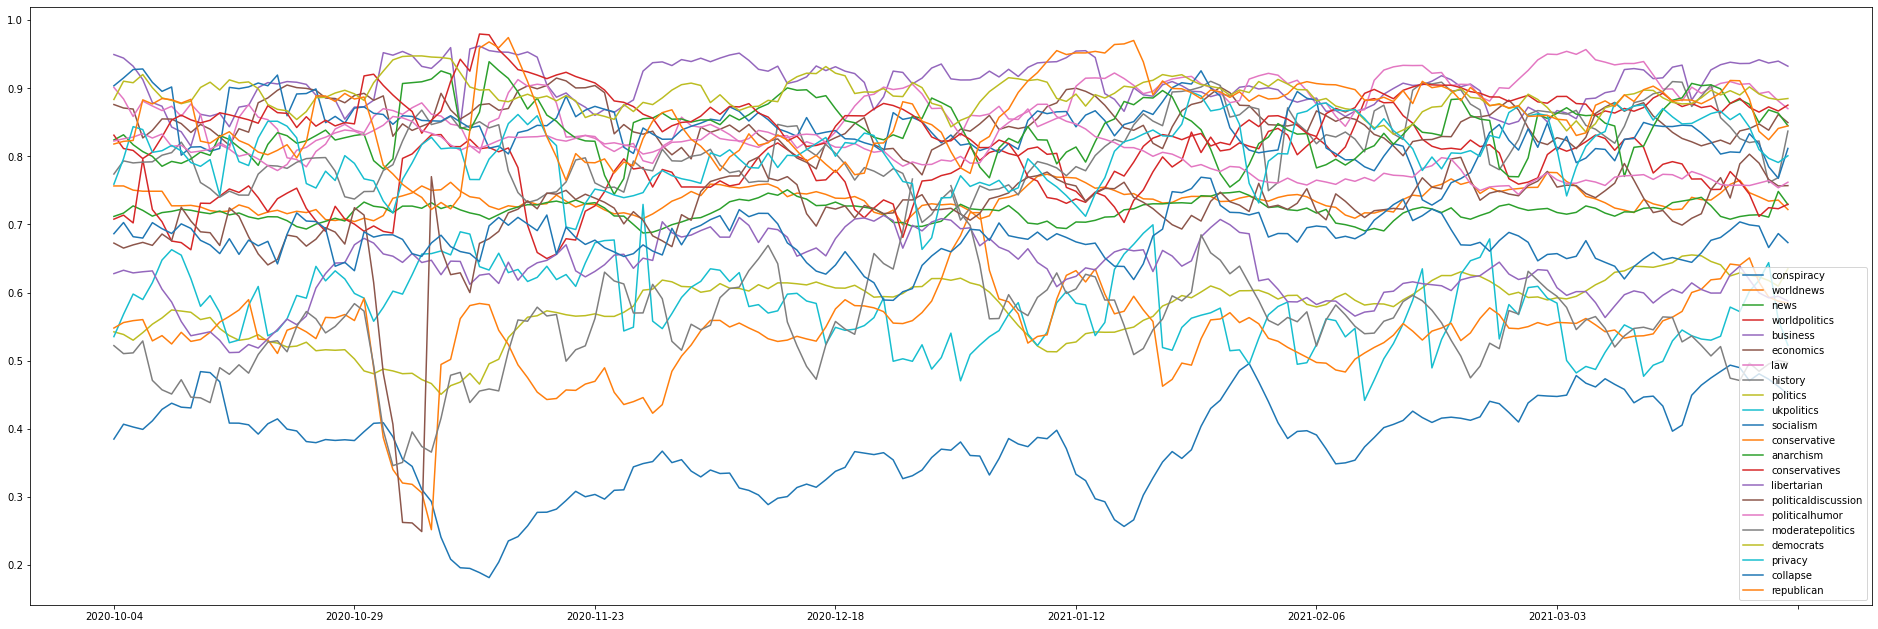

In [16]:
ei_data[subbert].plot(figsize=(33,11))

In [17]:
plt.style.use('dark_background')

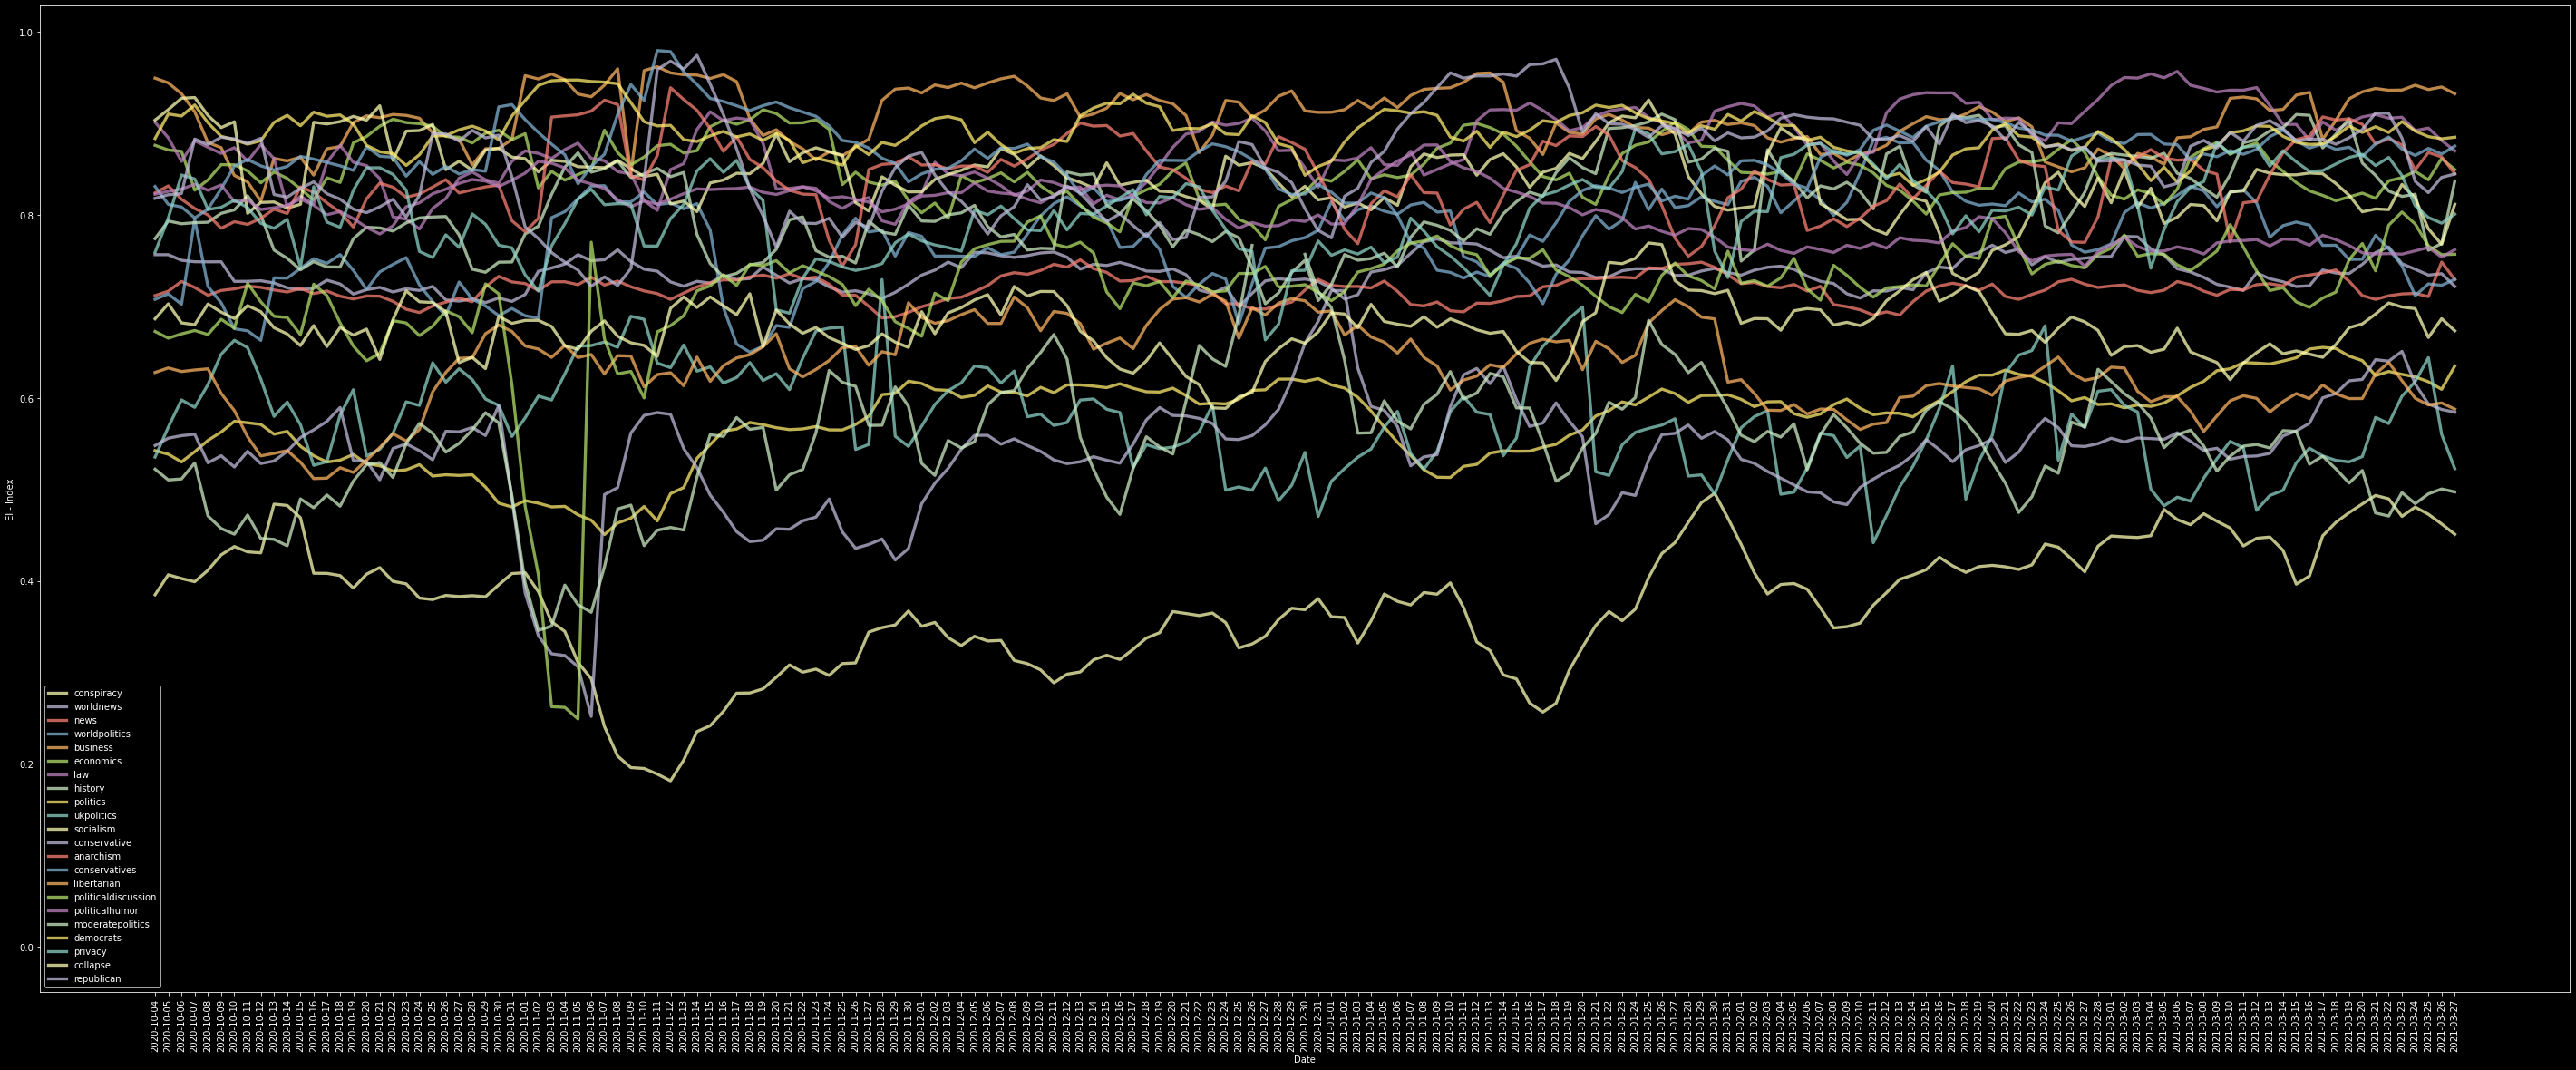

In [18]:
fig = plt.figure(figsize=(50,20))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
for sub in ei_data[subbert].columns:
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, alpha=0.75, label=sub)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

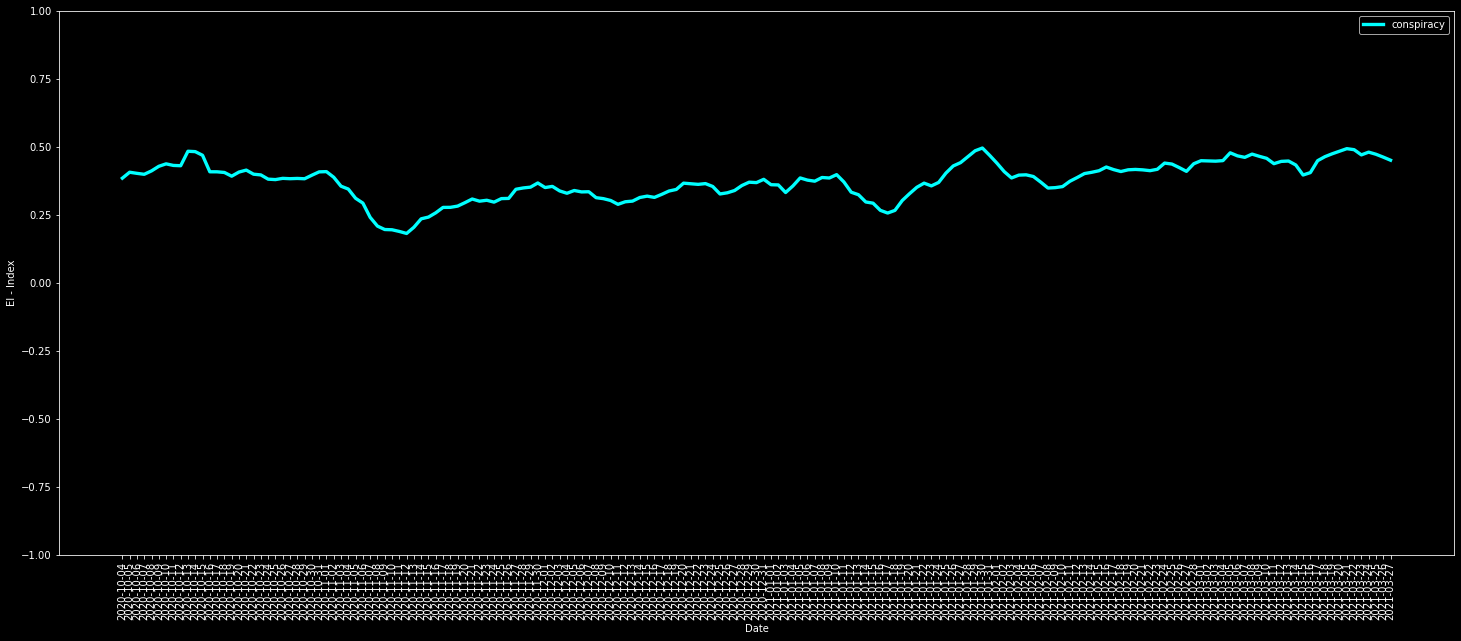

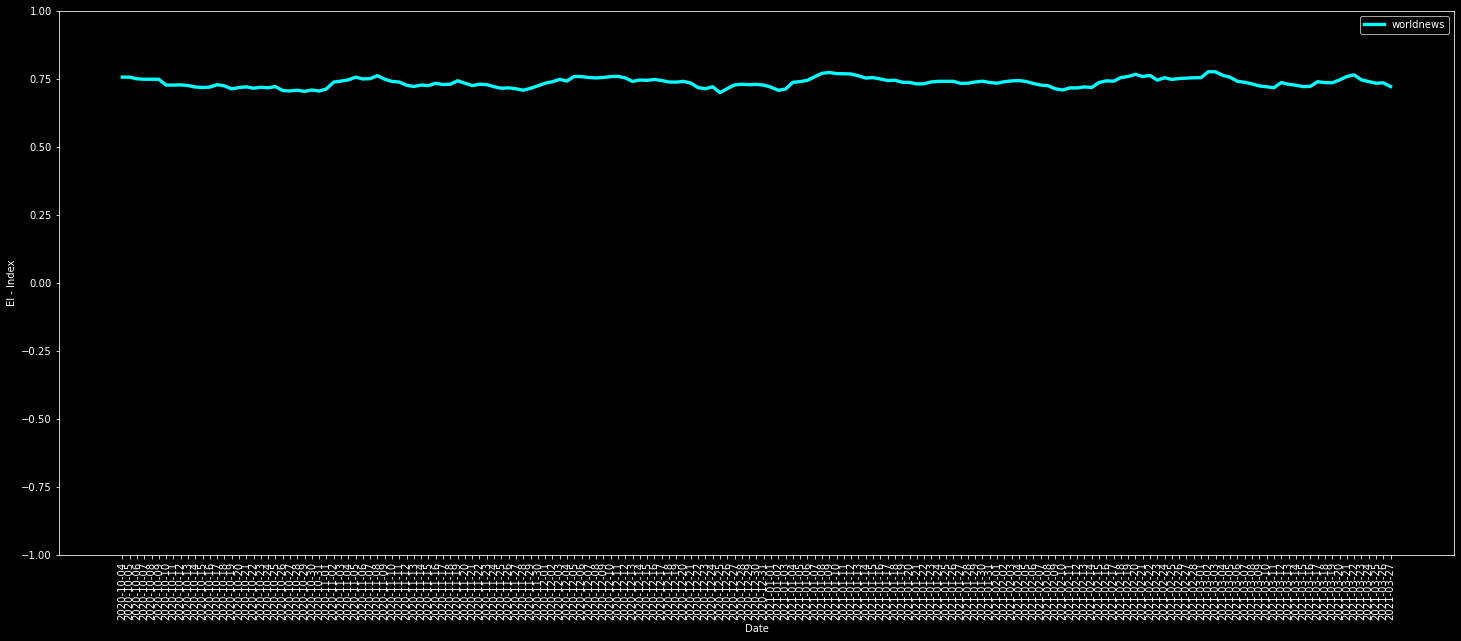

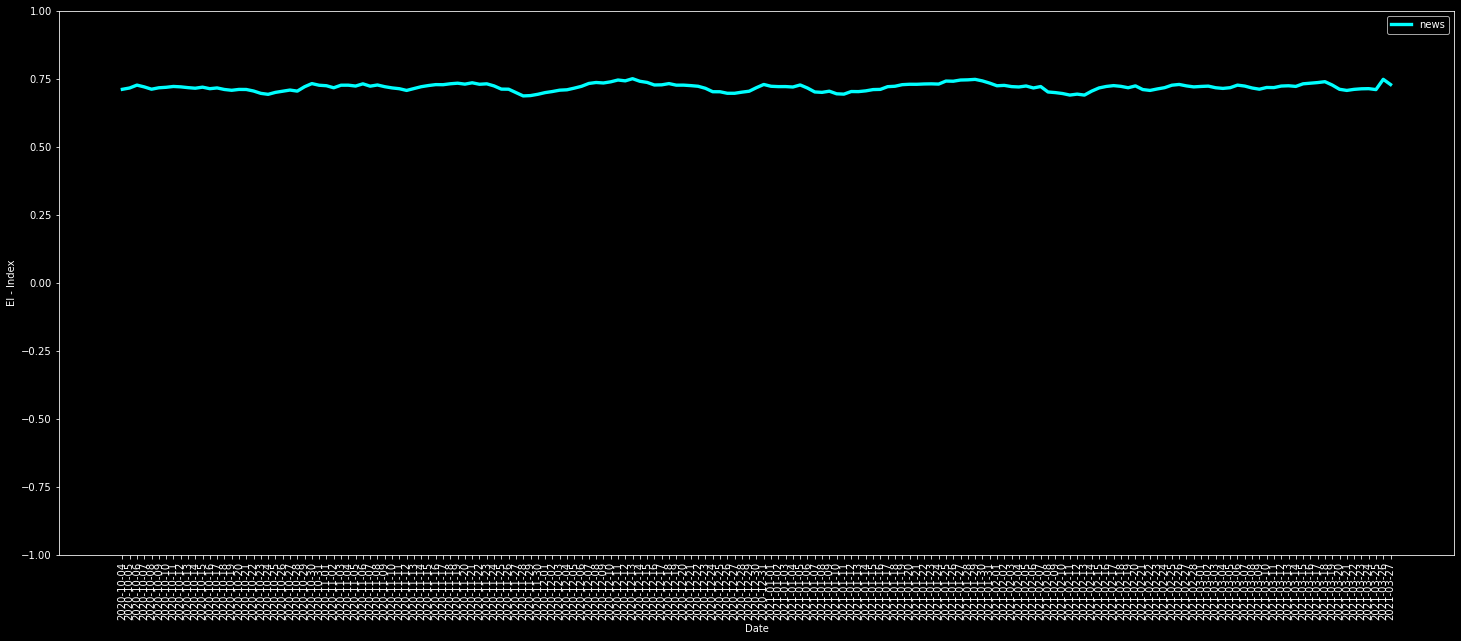

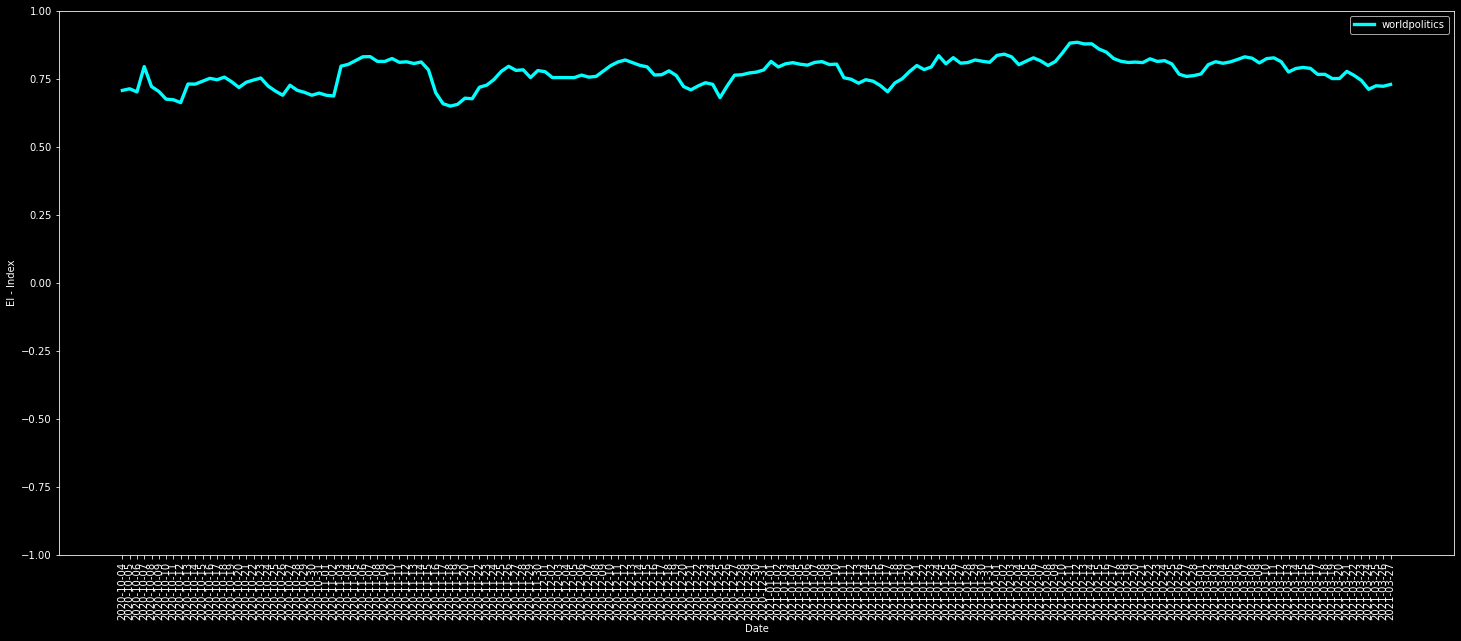

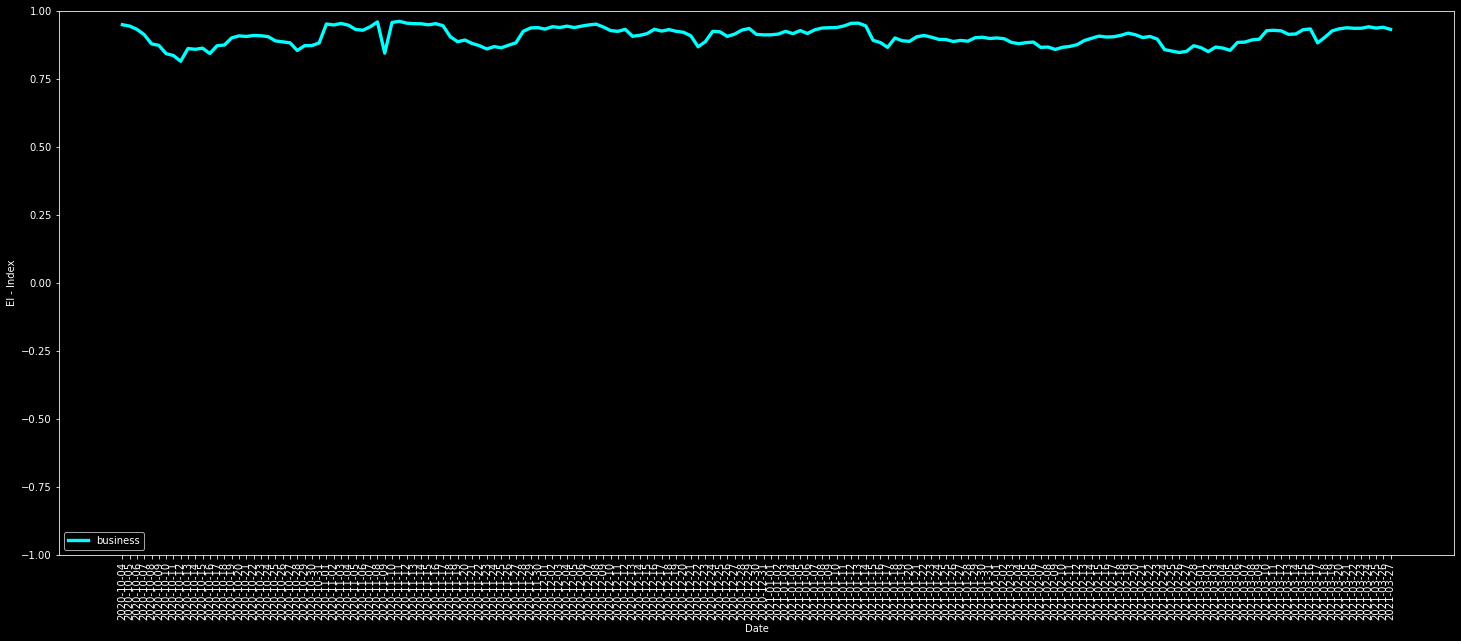

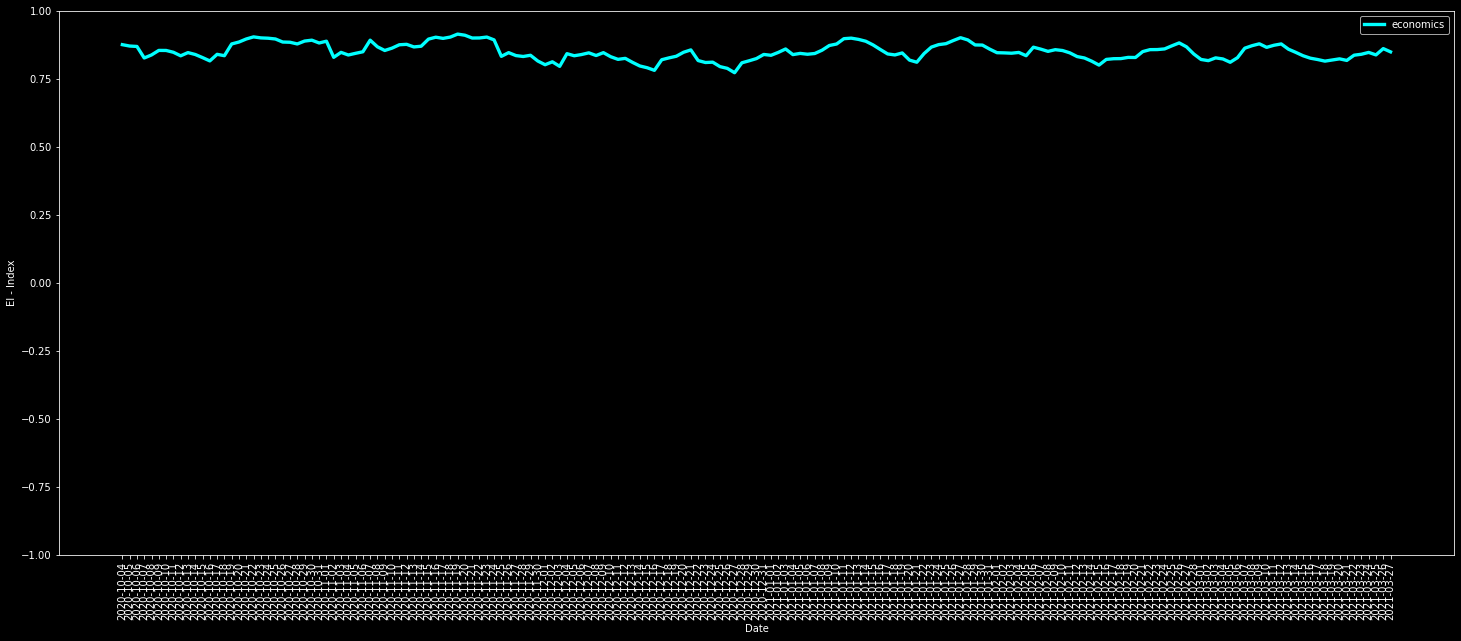

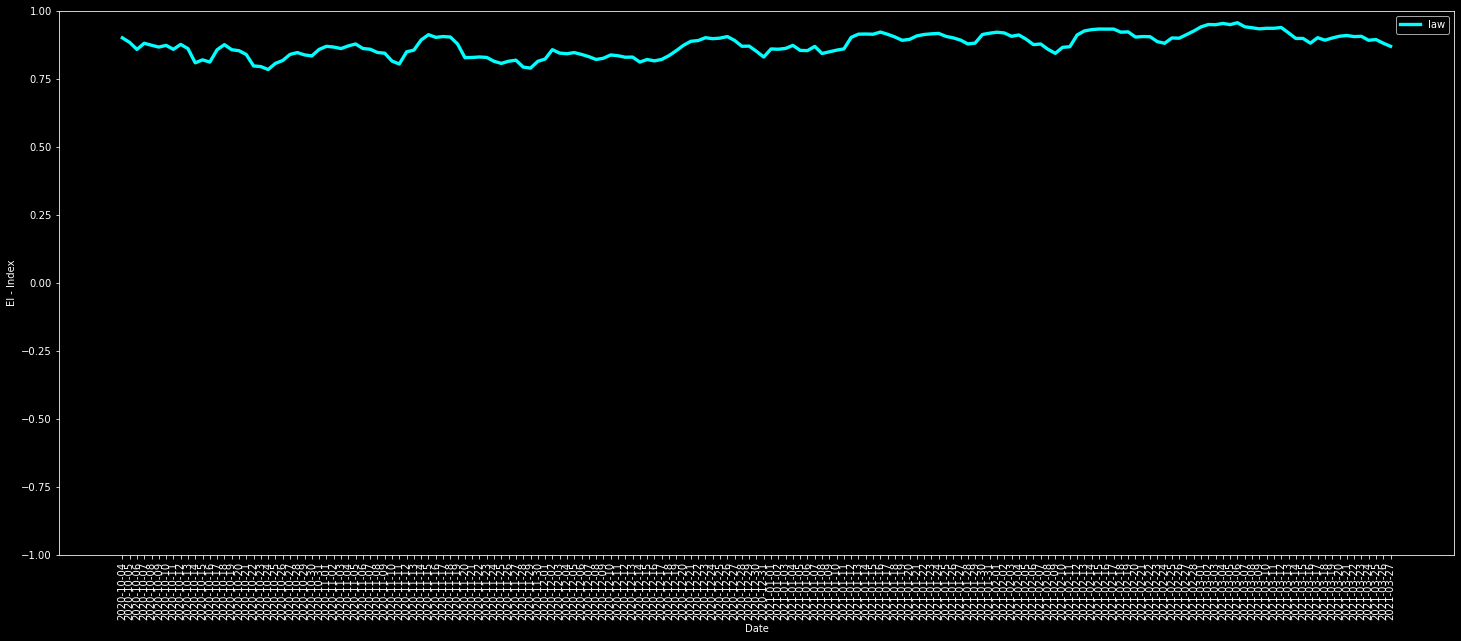

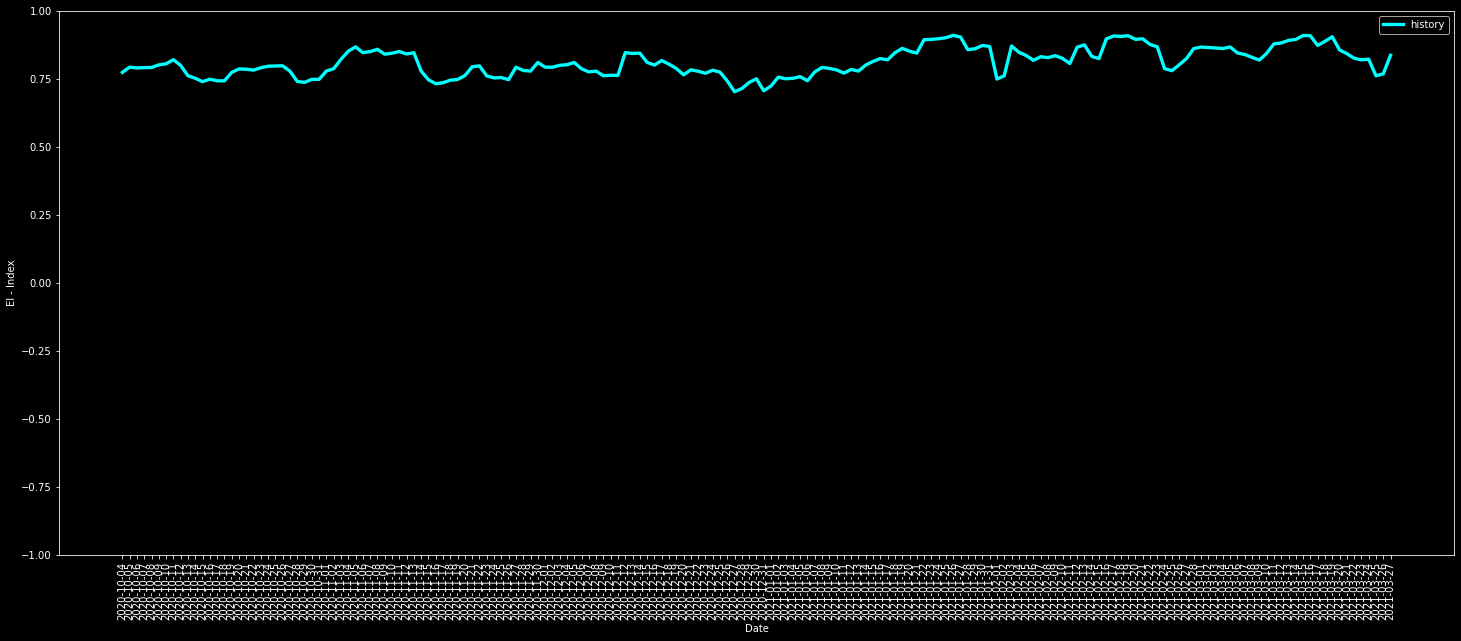

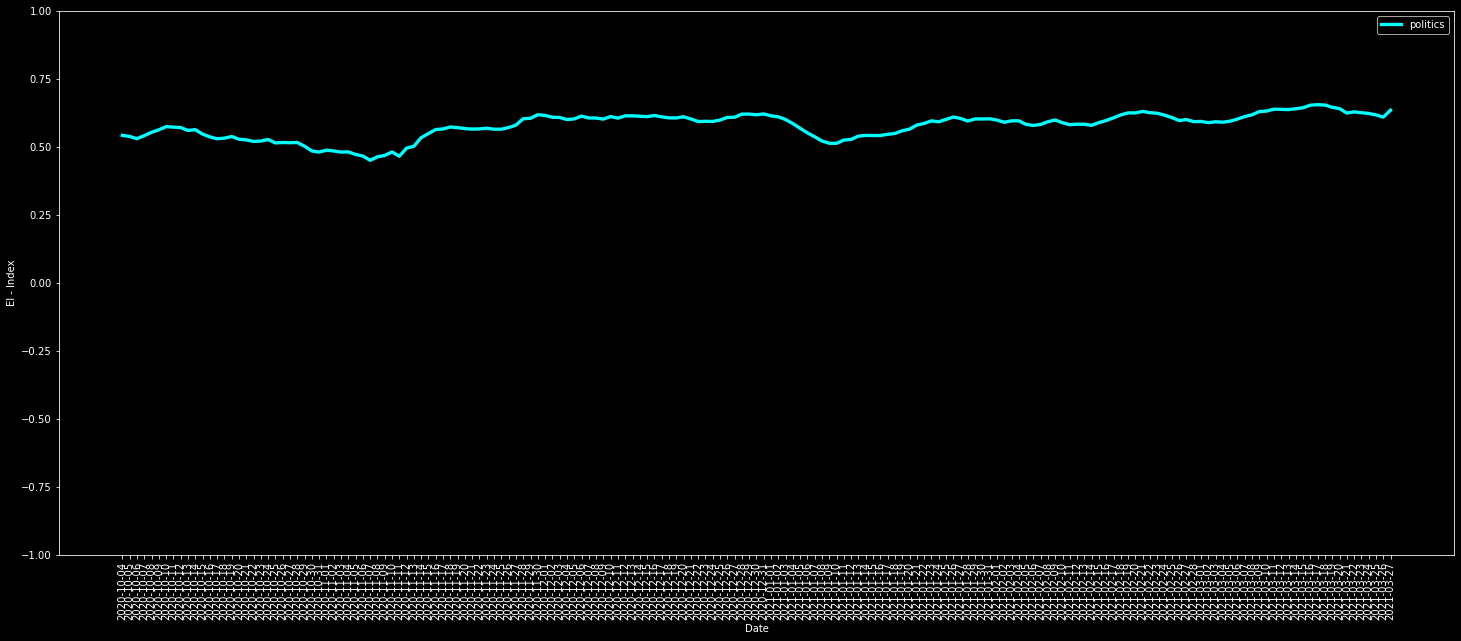

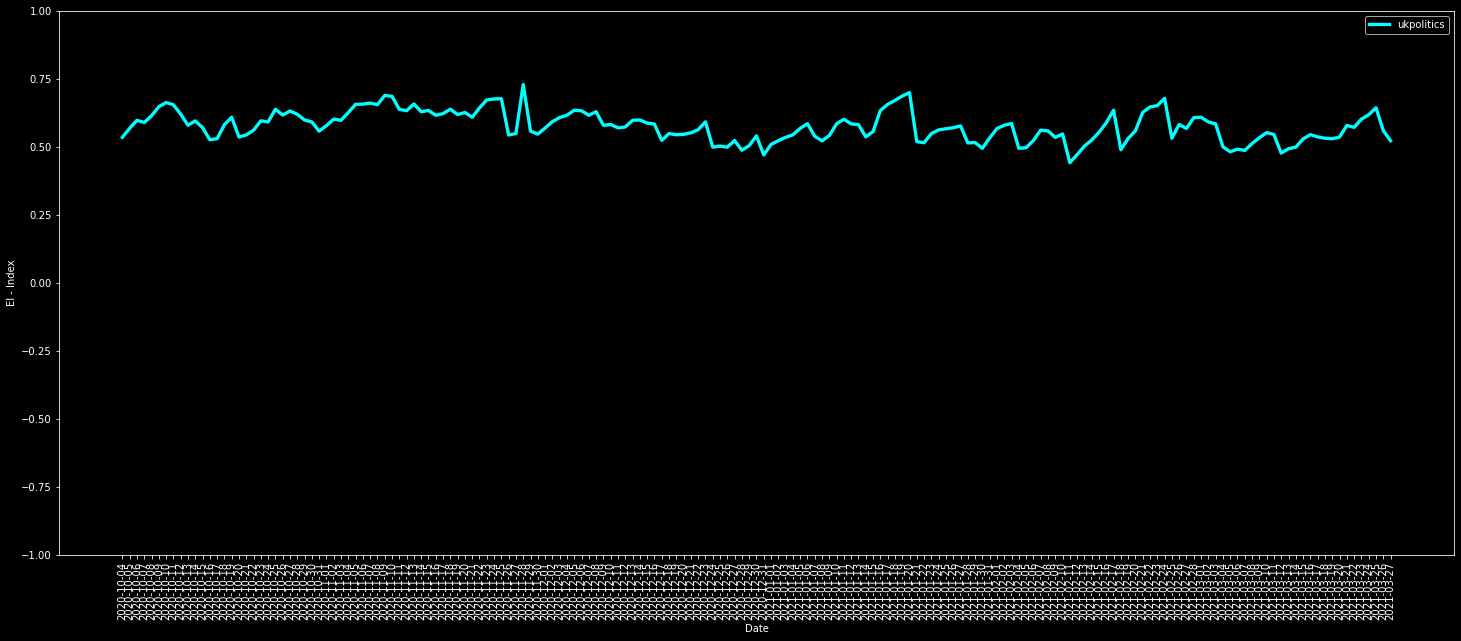

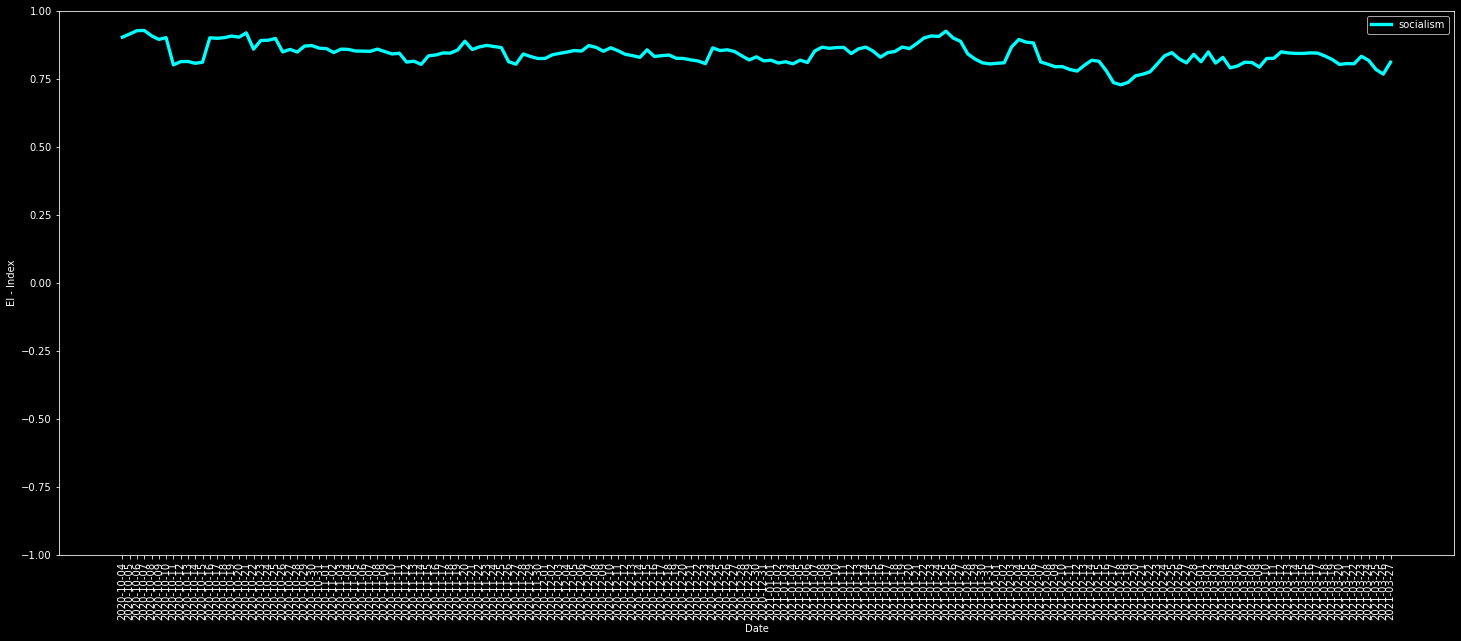

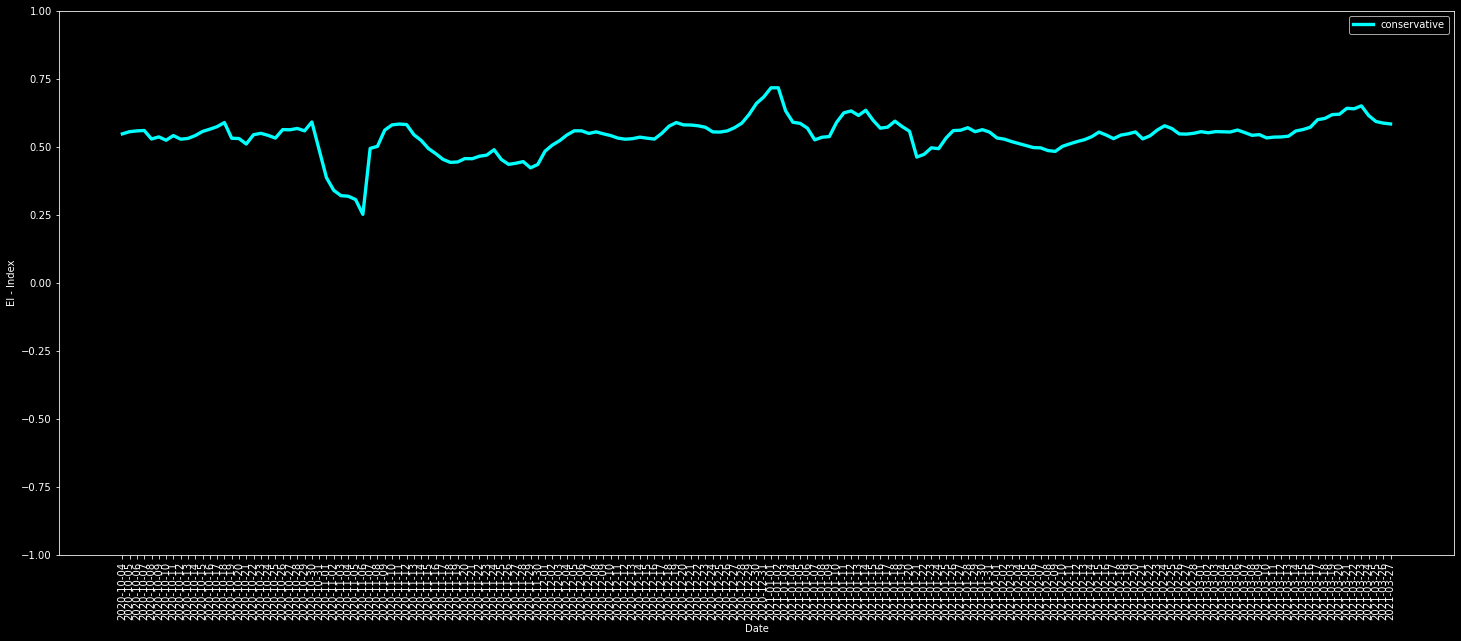

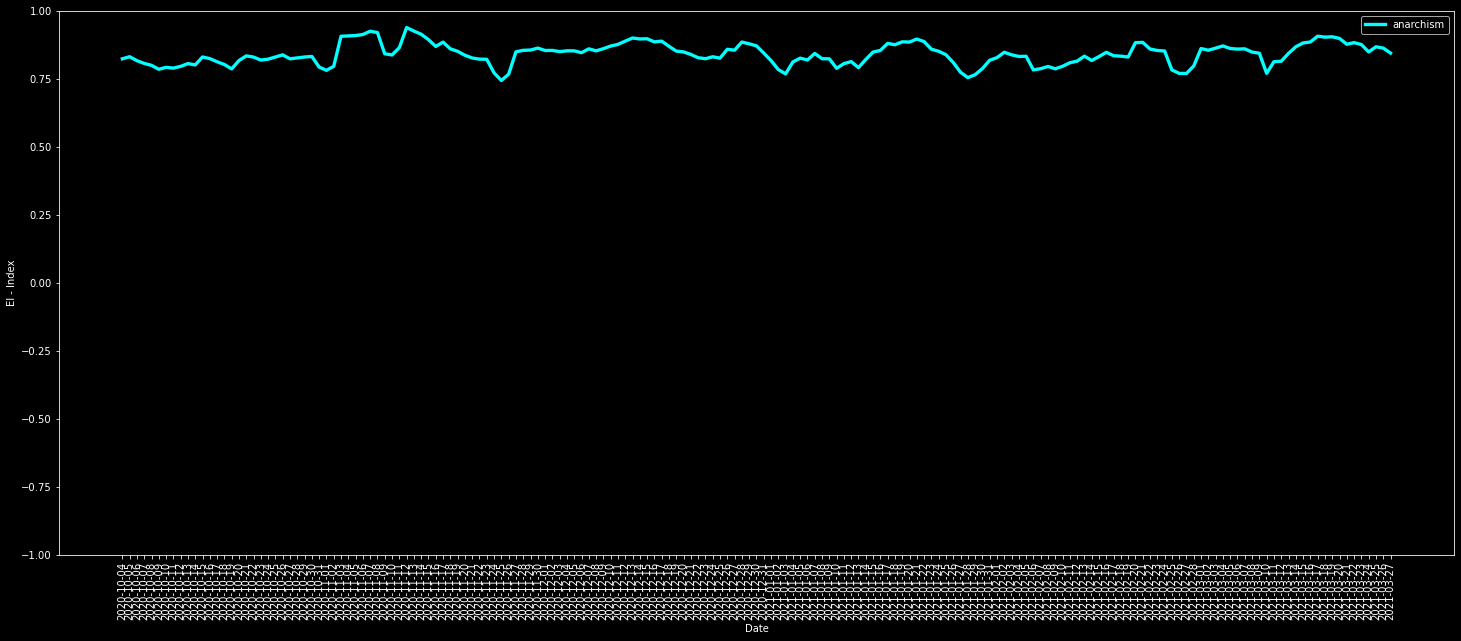

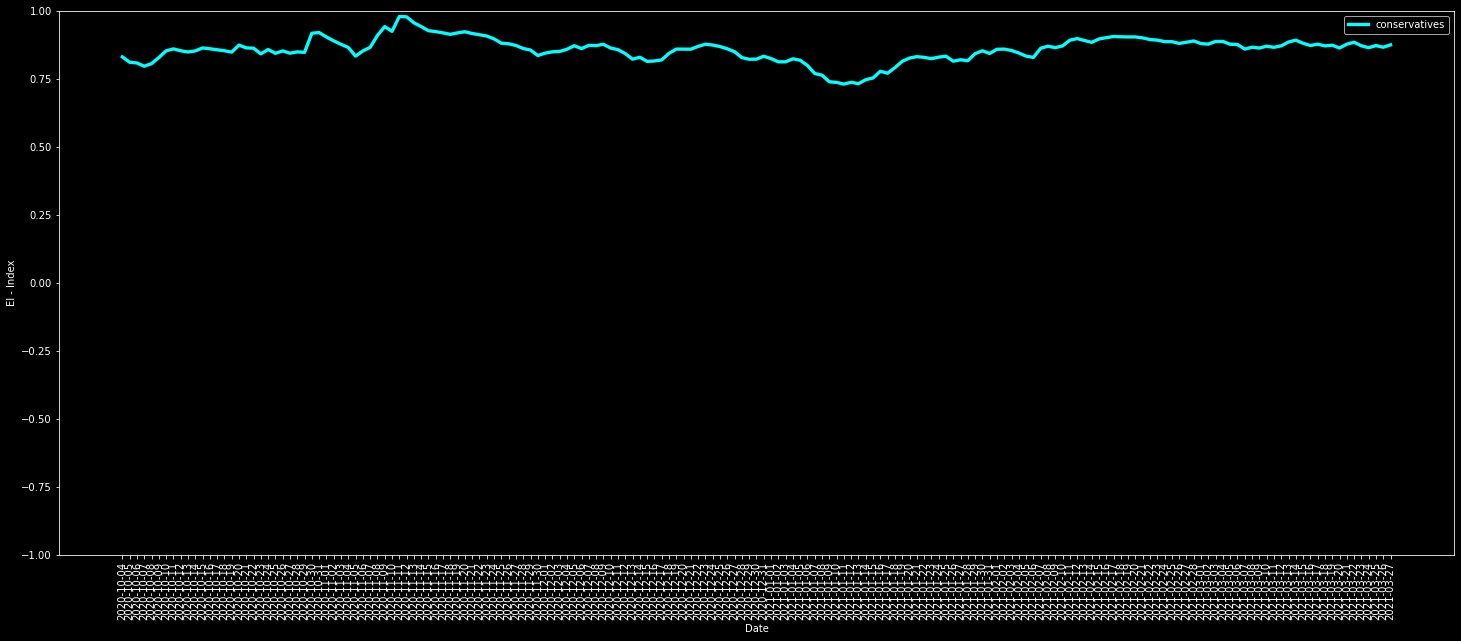

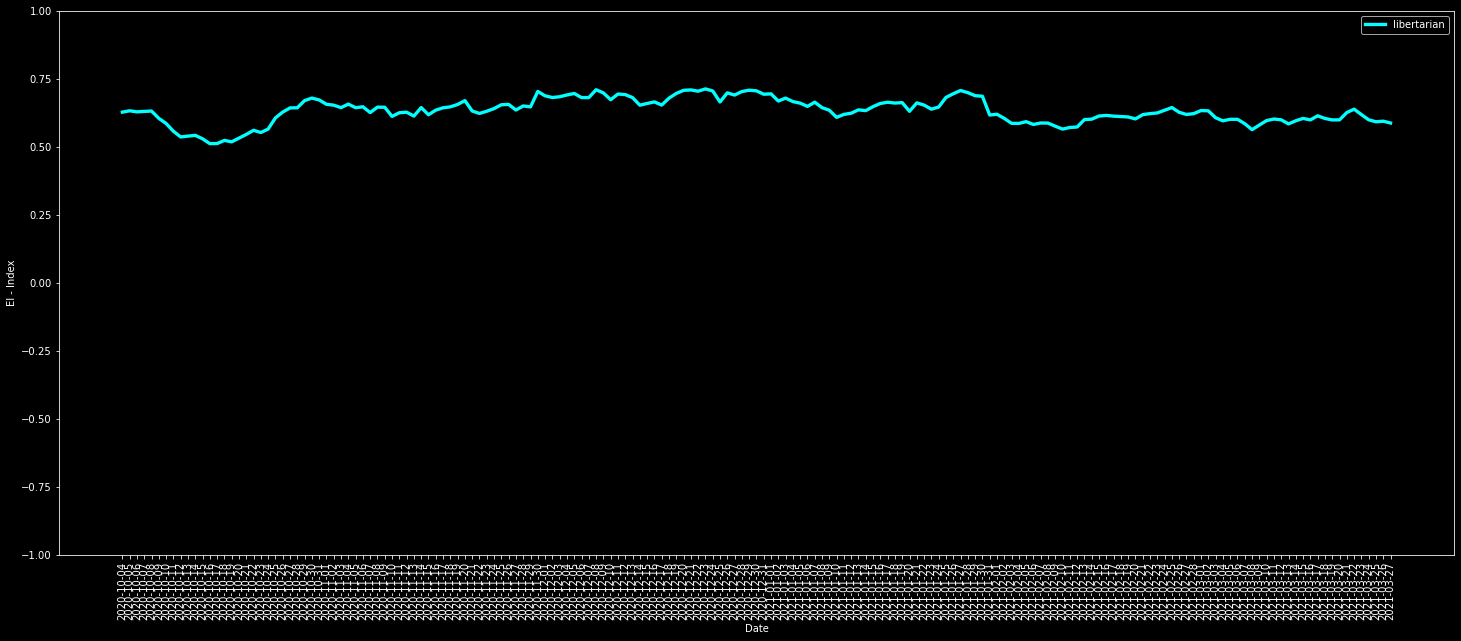

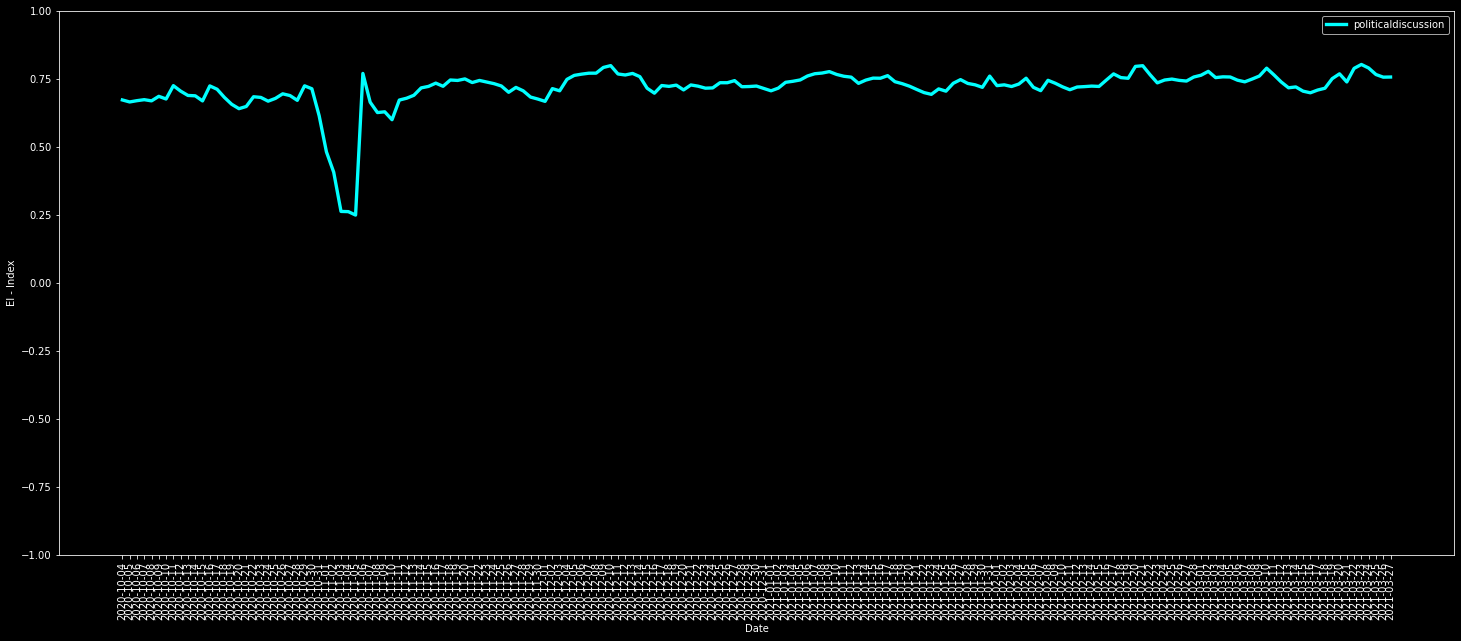

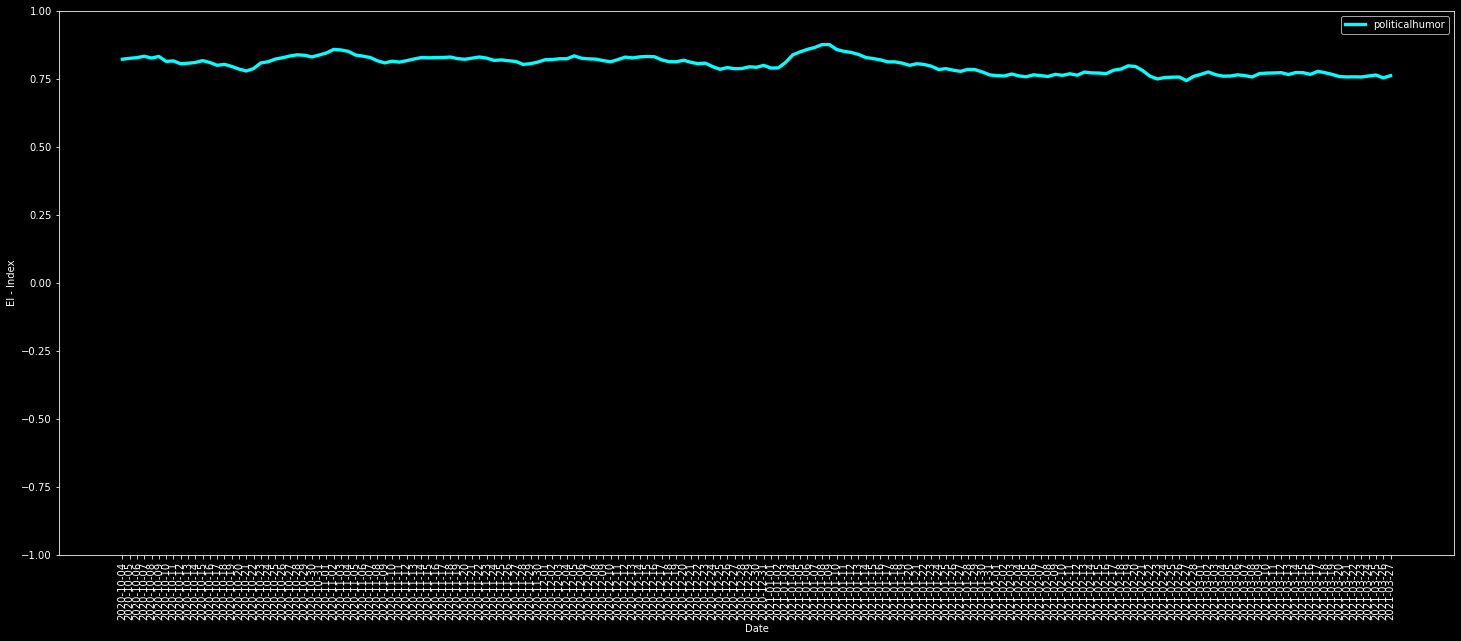

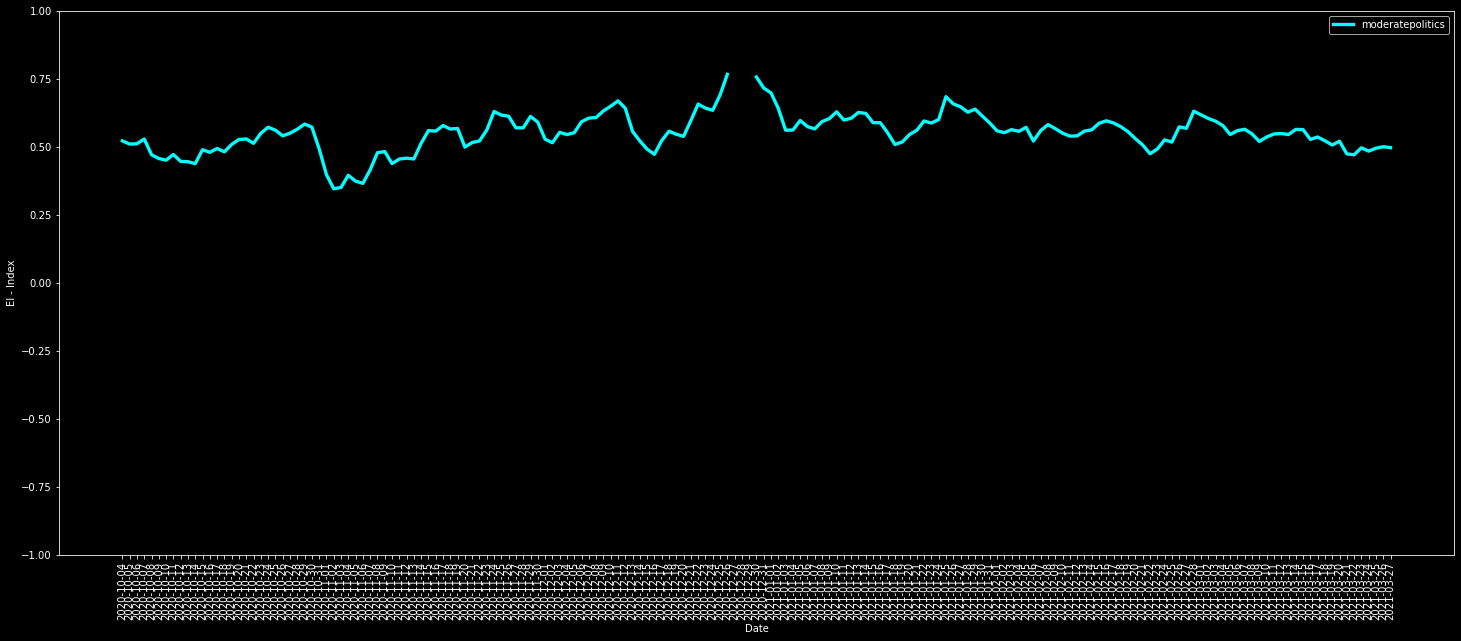

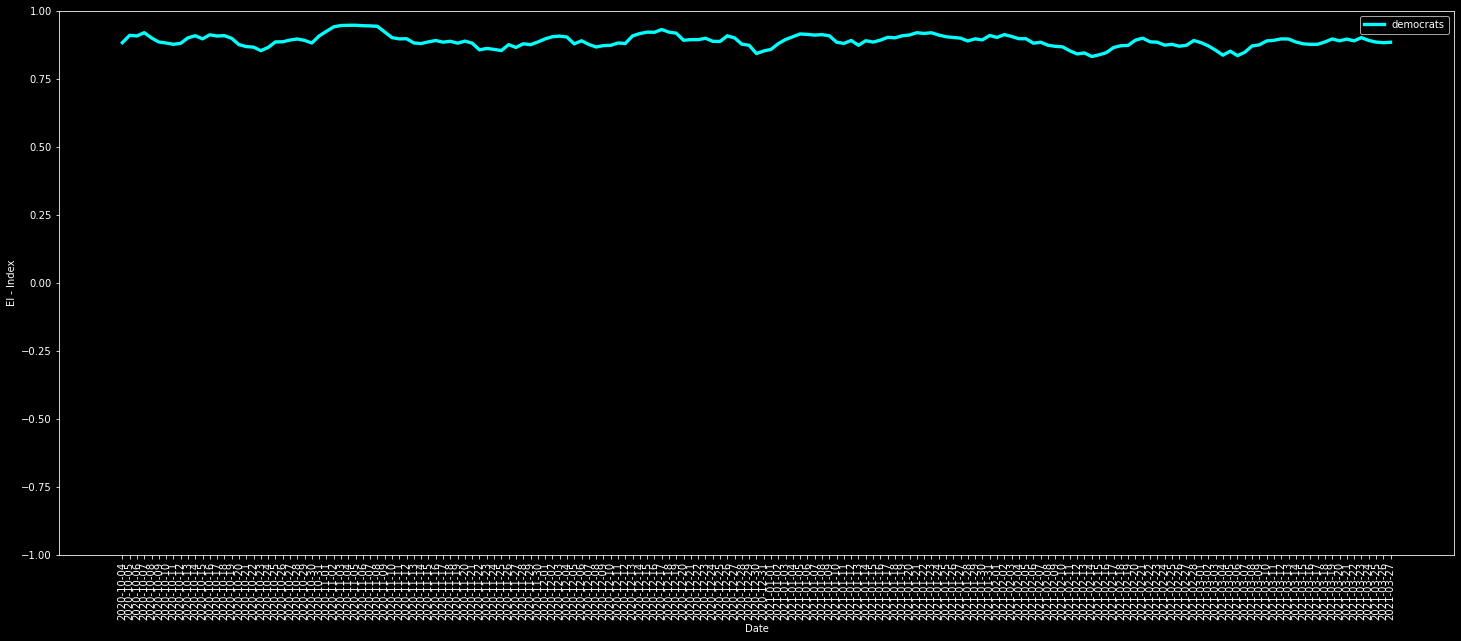

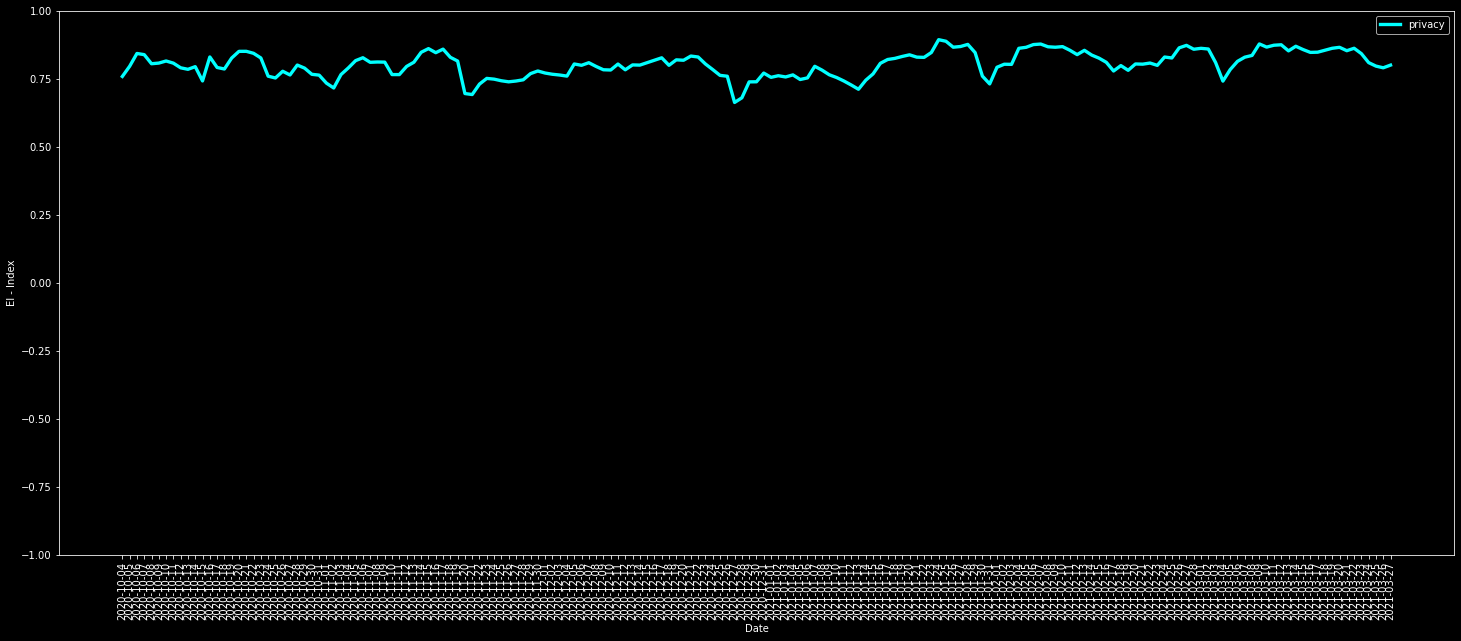

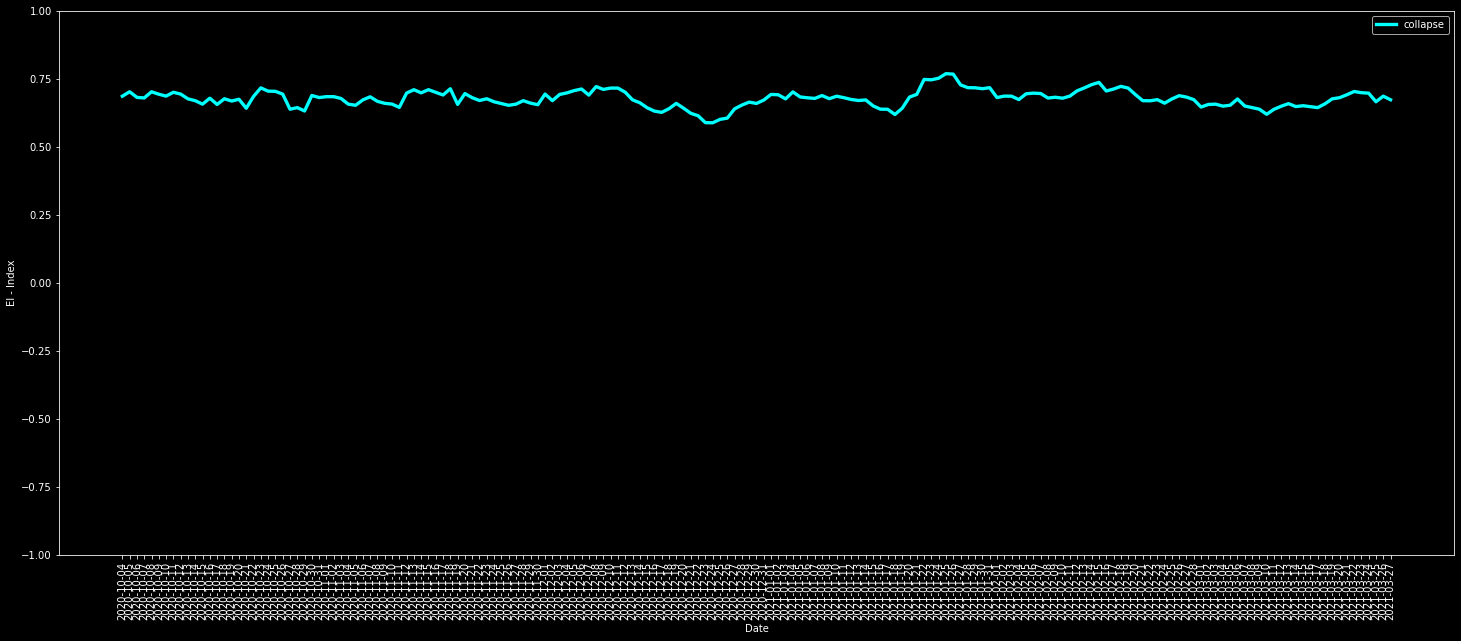

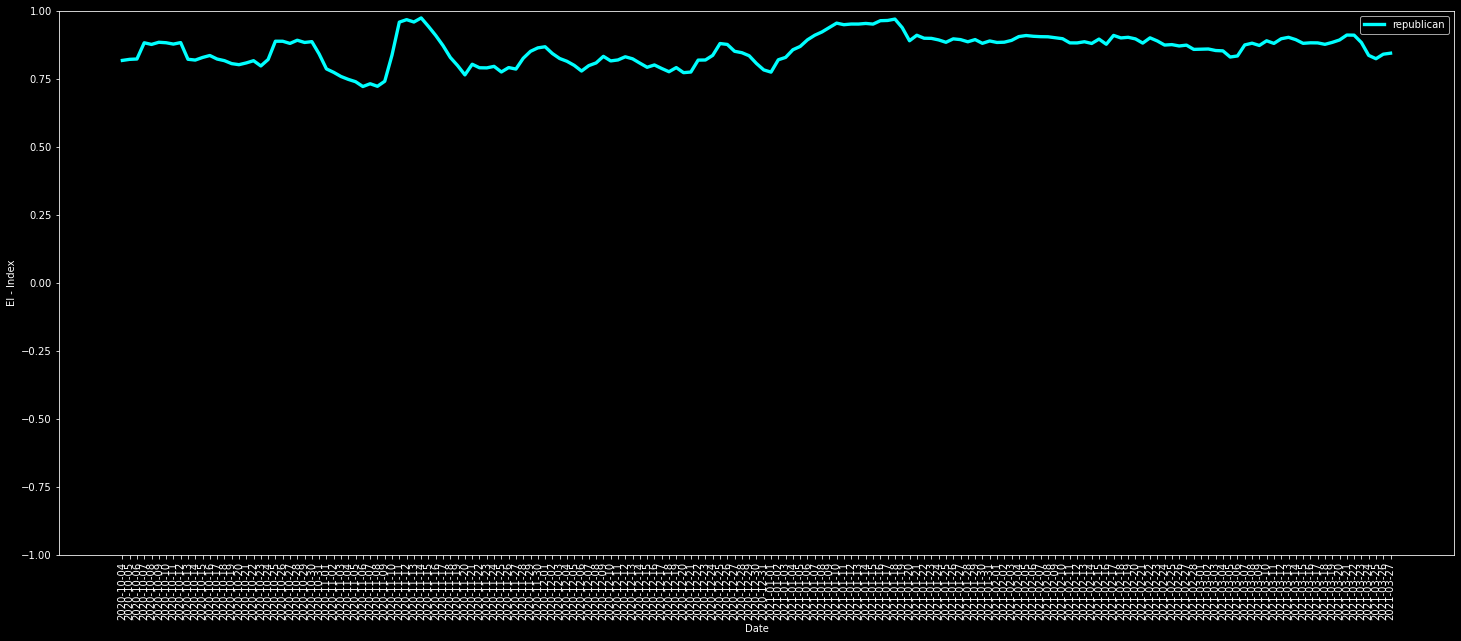

In [19]:
for sub in ei_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('EI - Index')
    plt.ylim(-1,1)
    plt.legend()

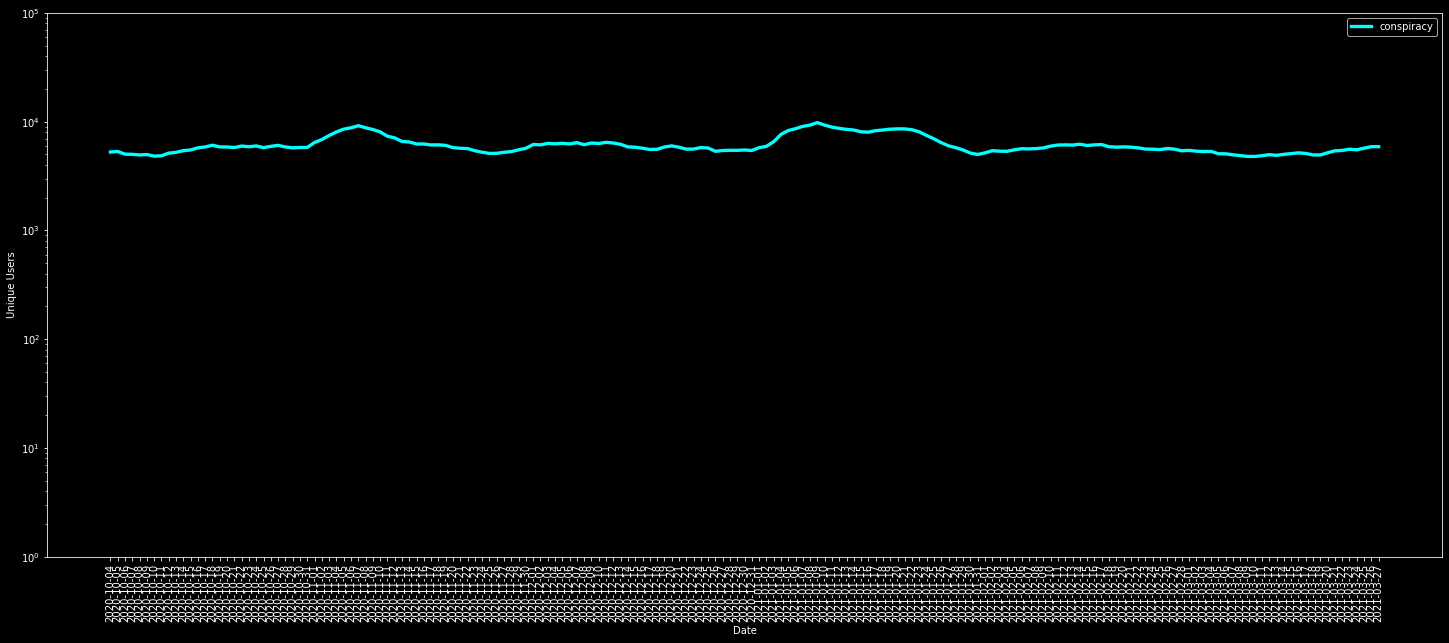

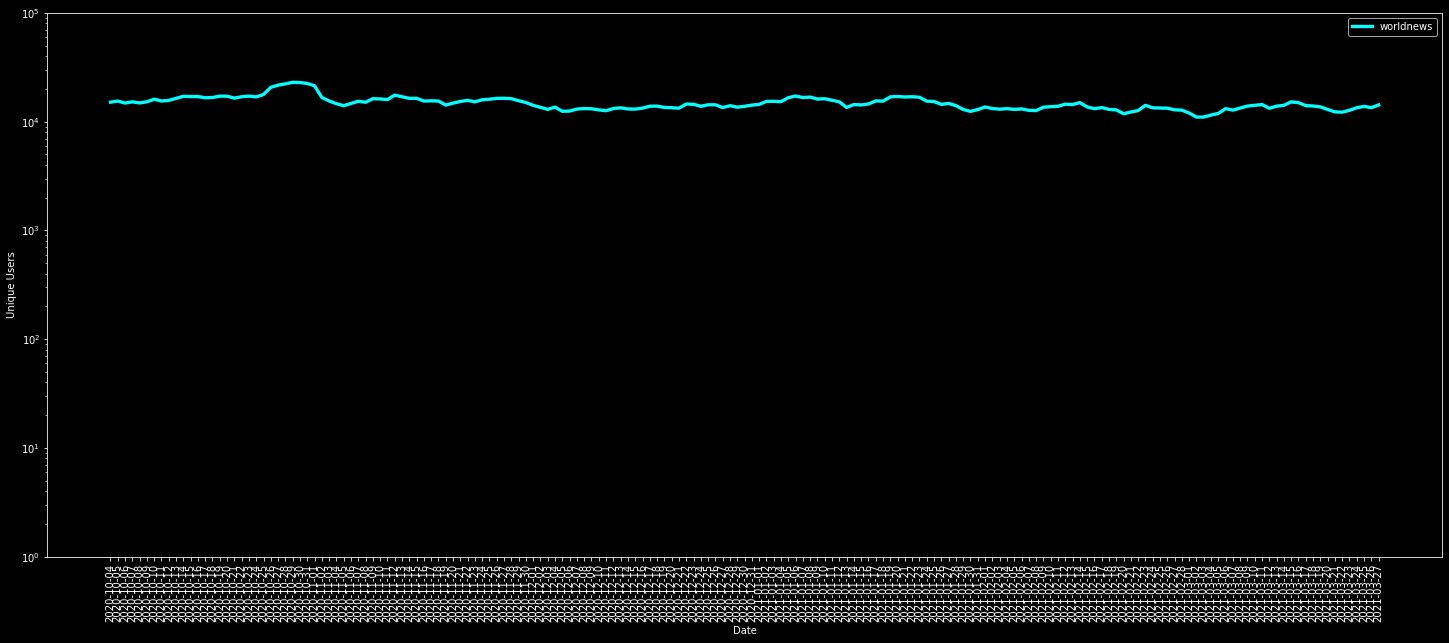

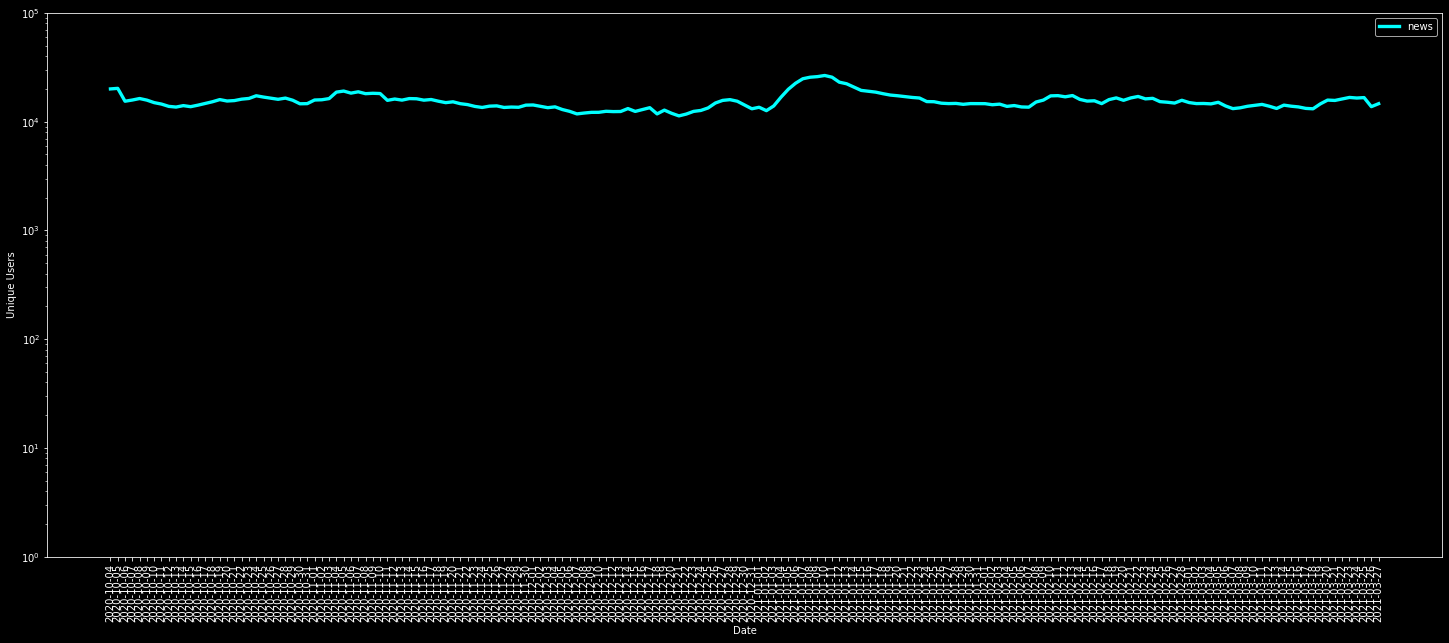

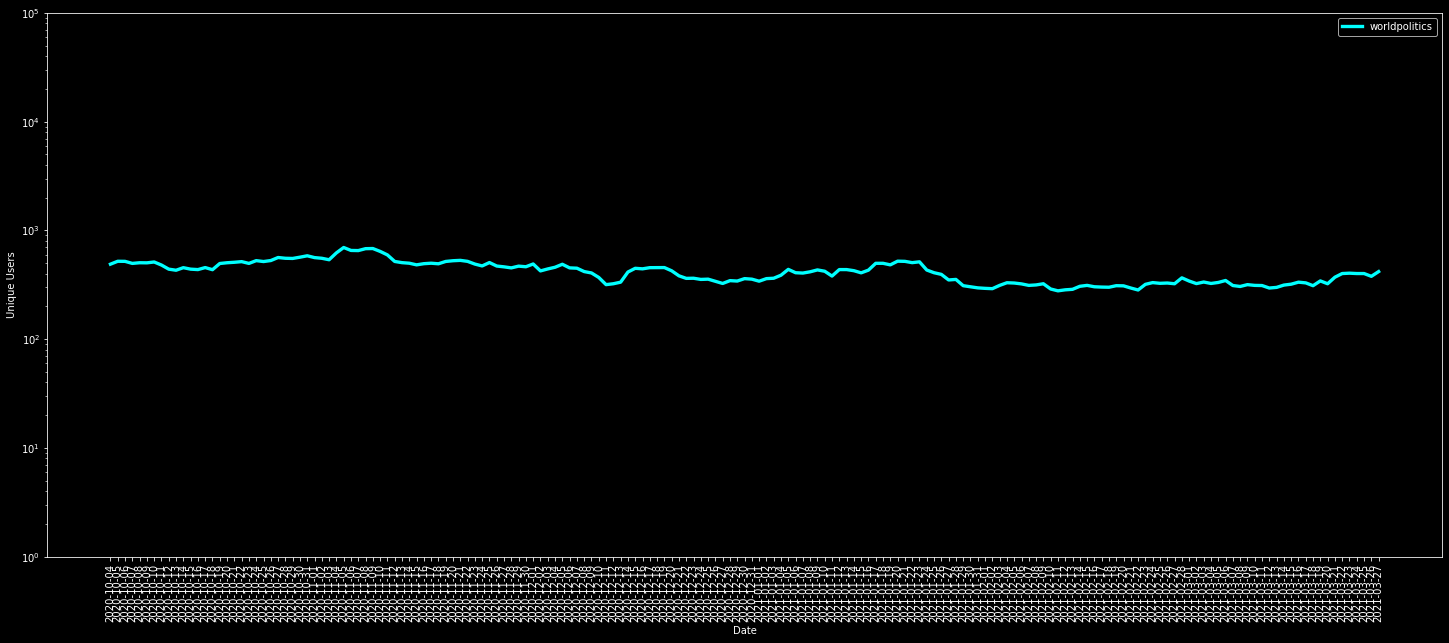

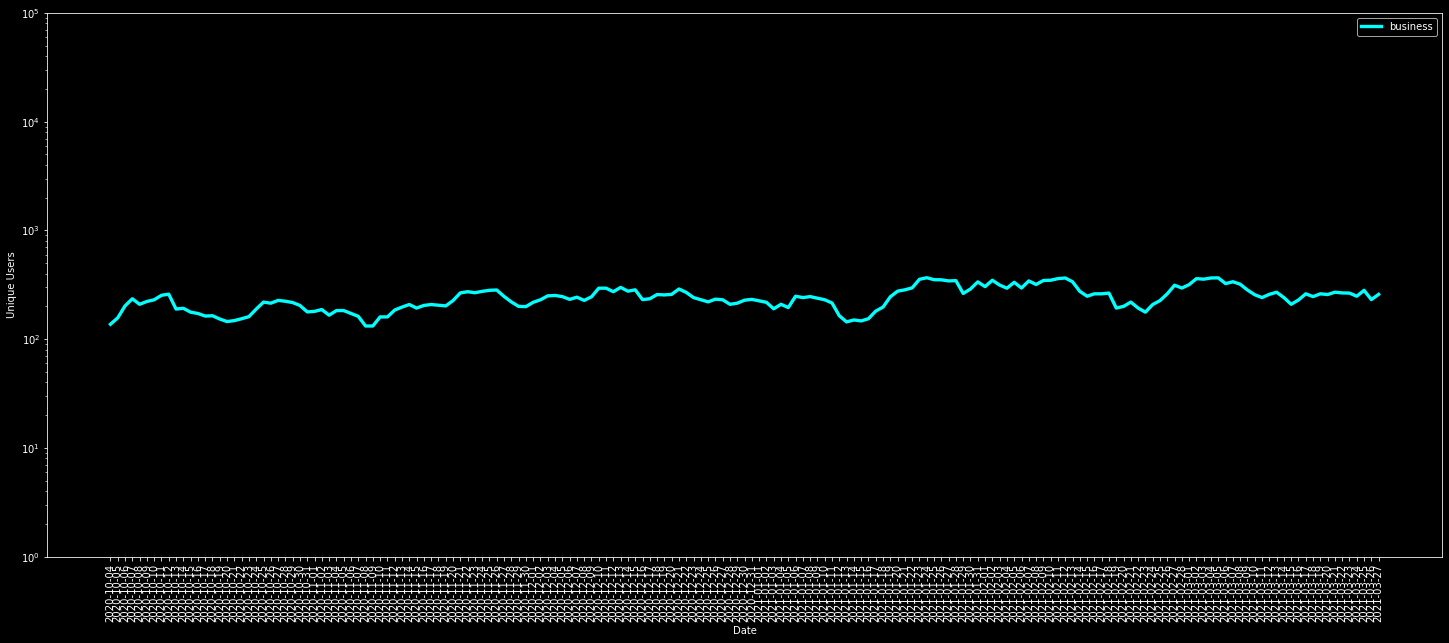

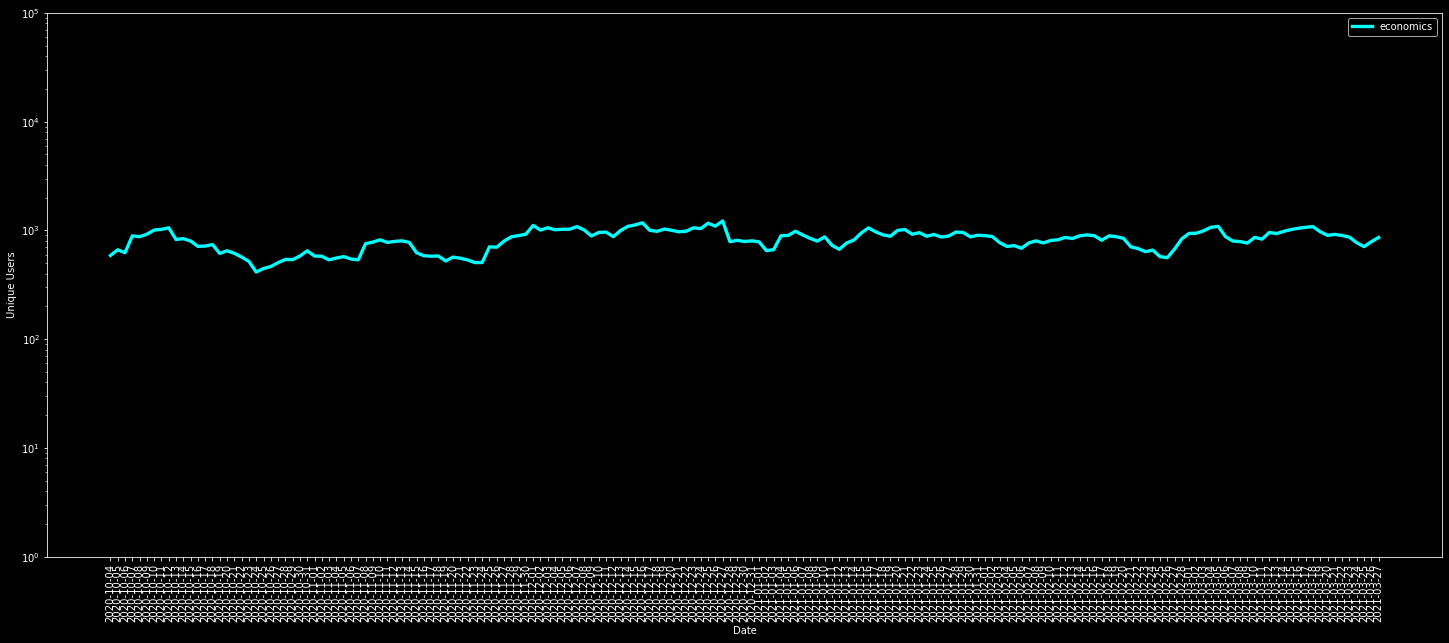

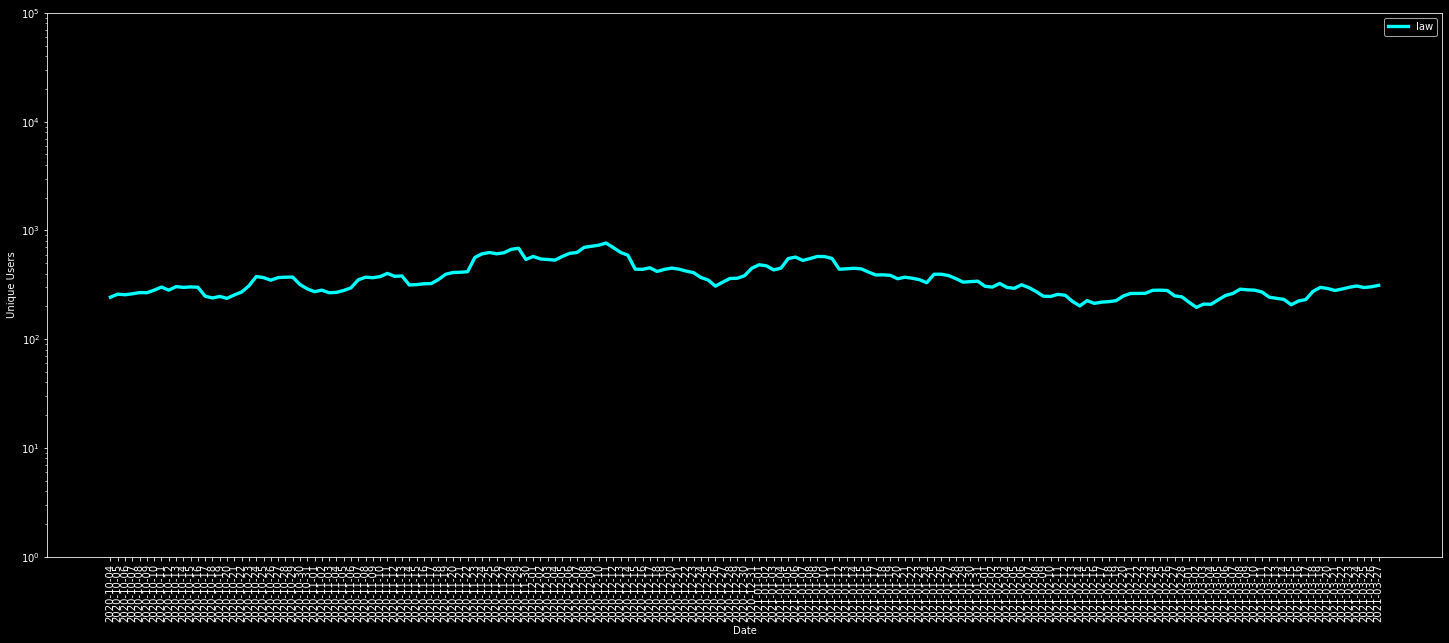

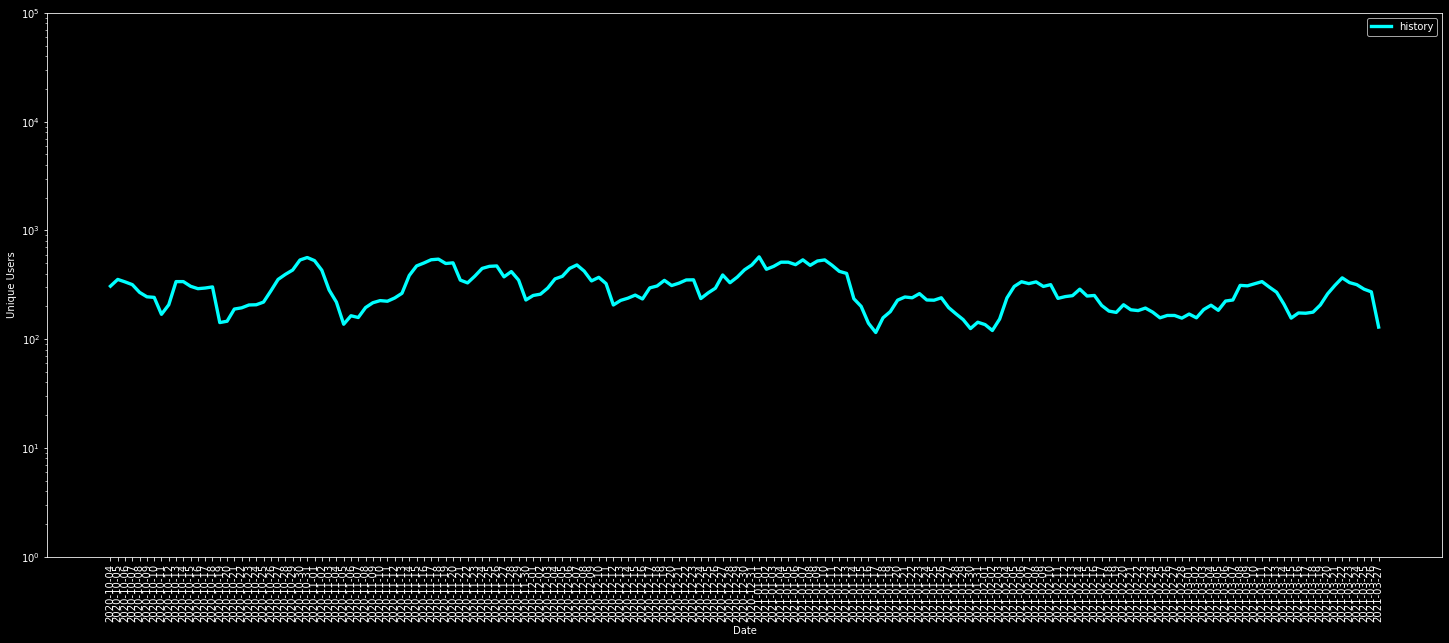

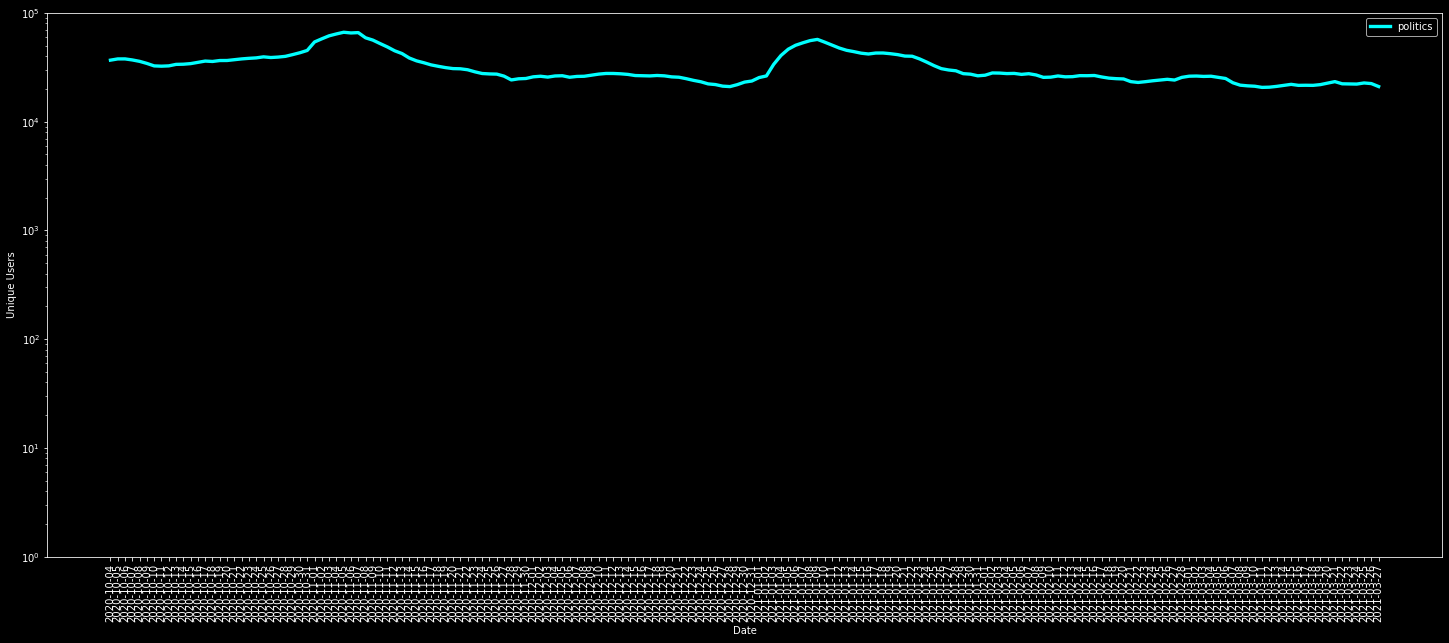

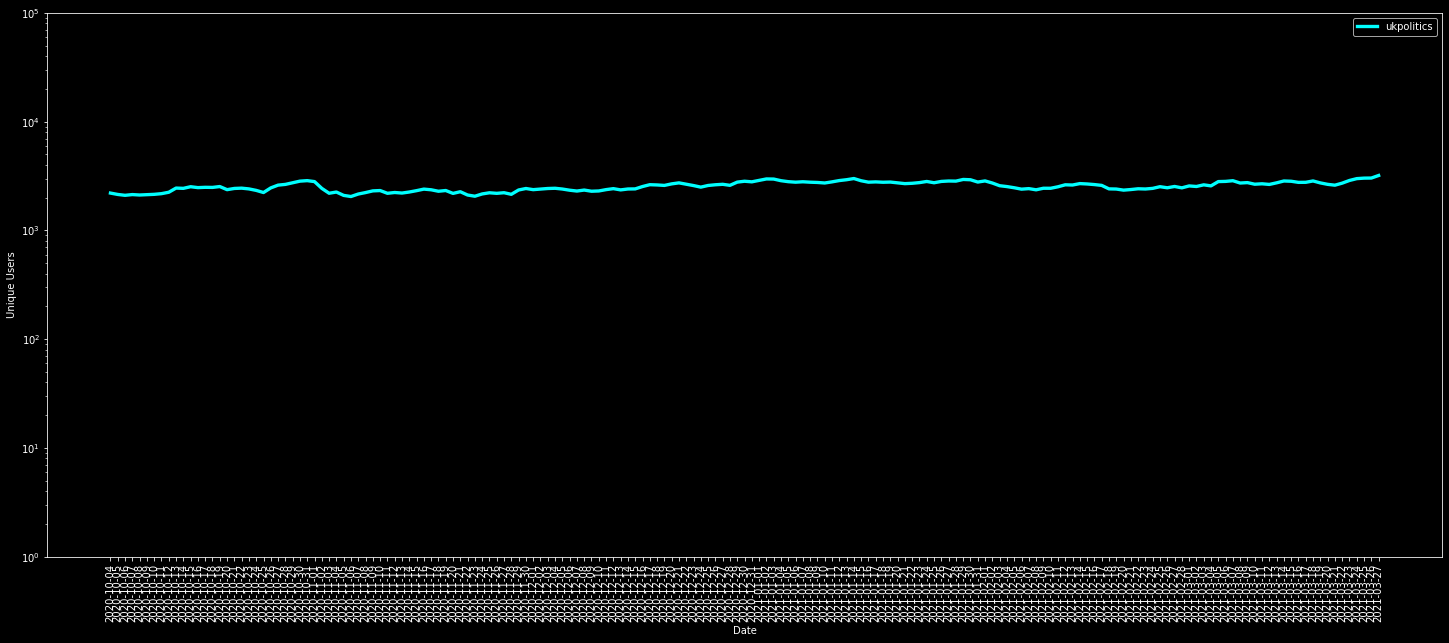

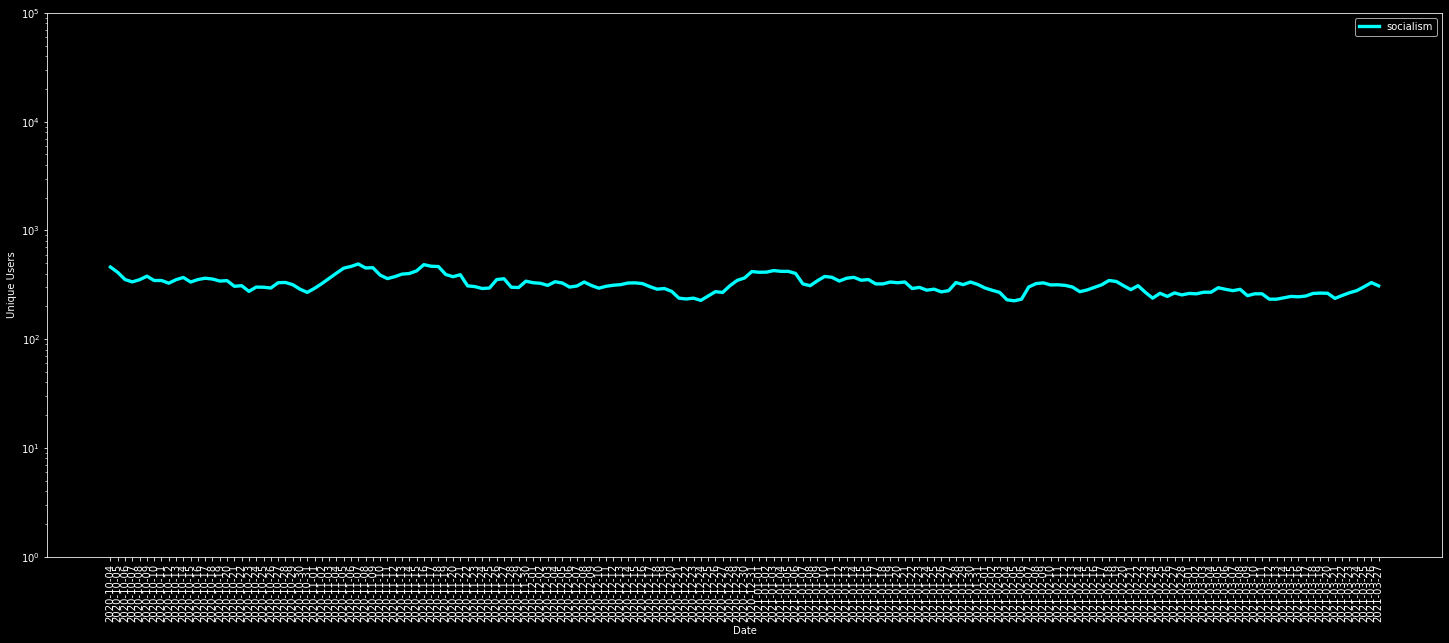

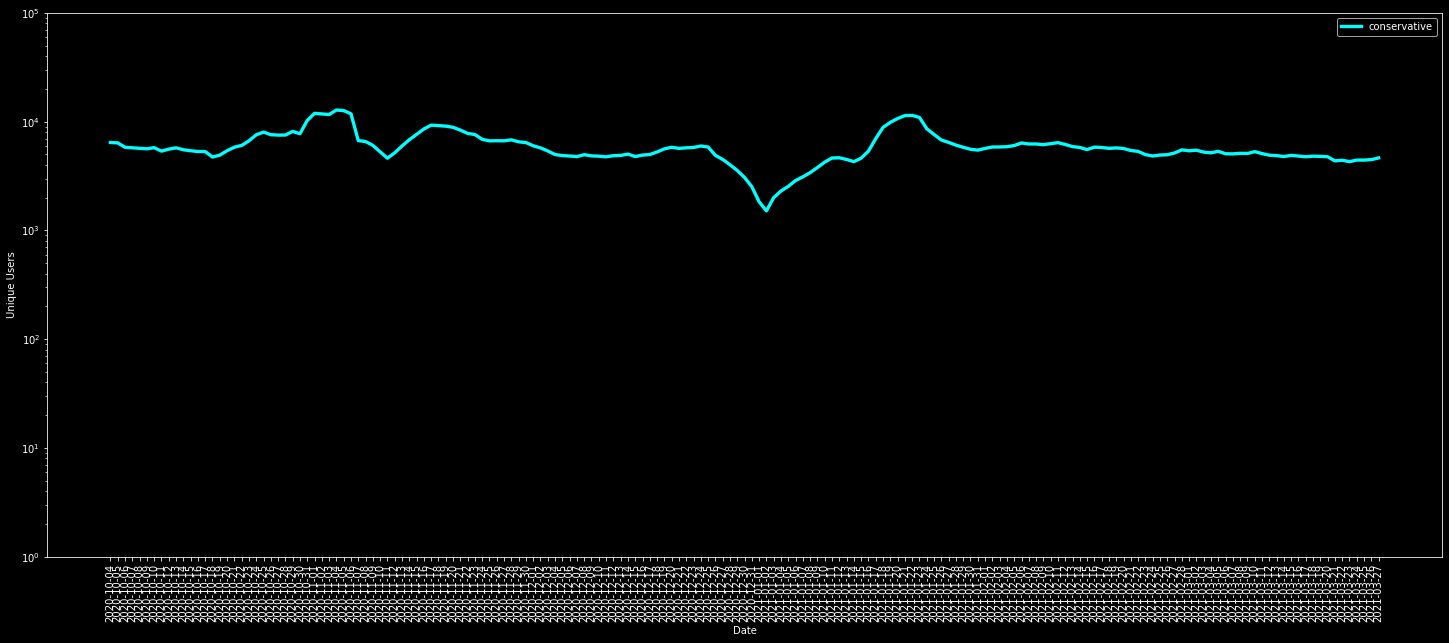

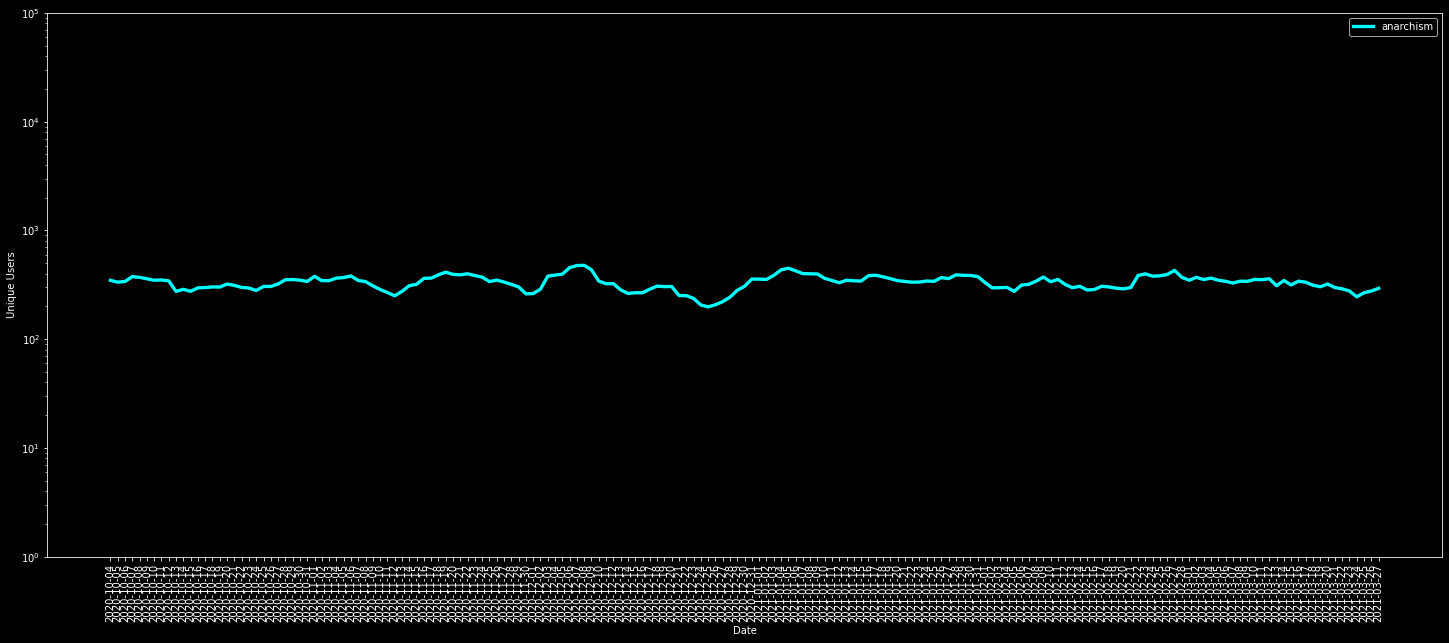

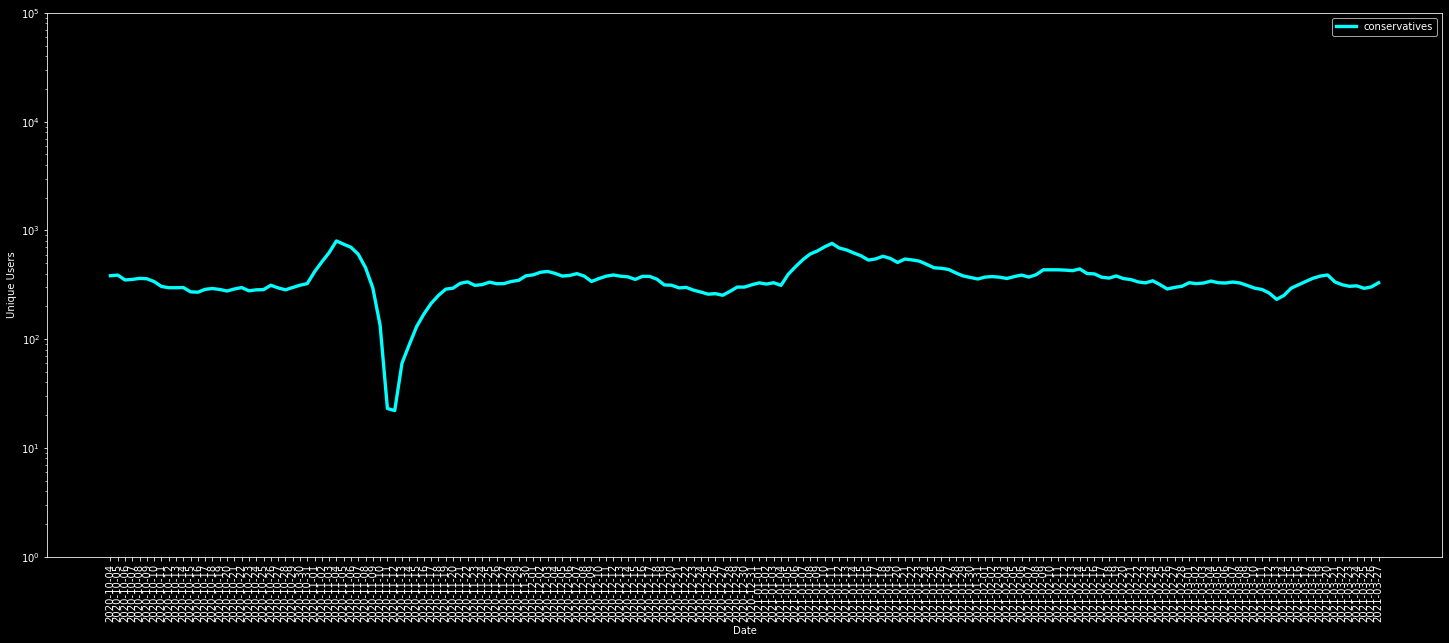

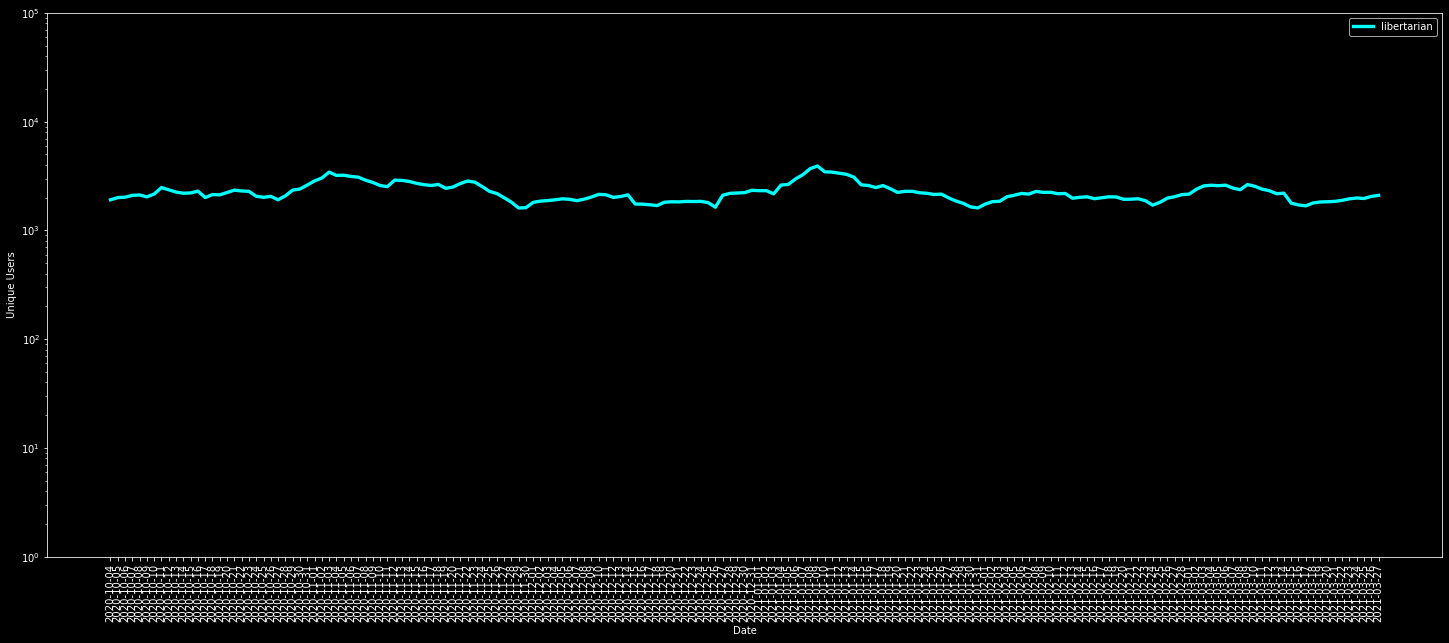

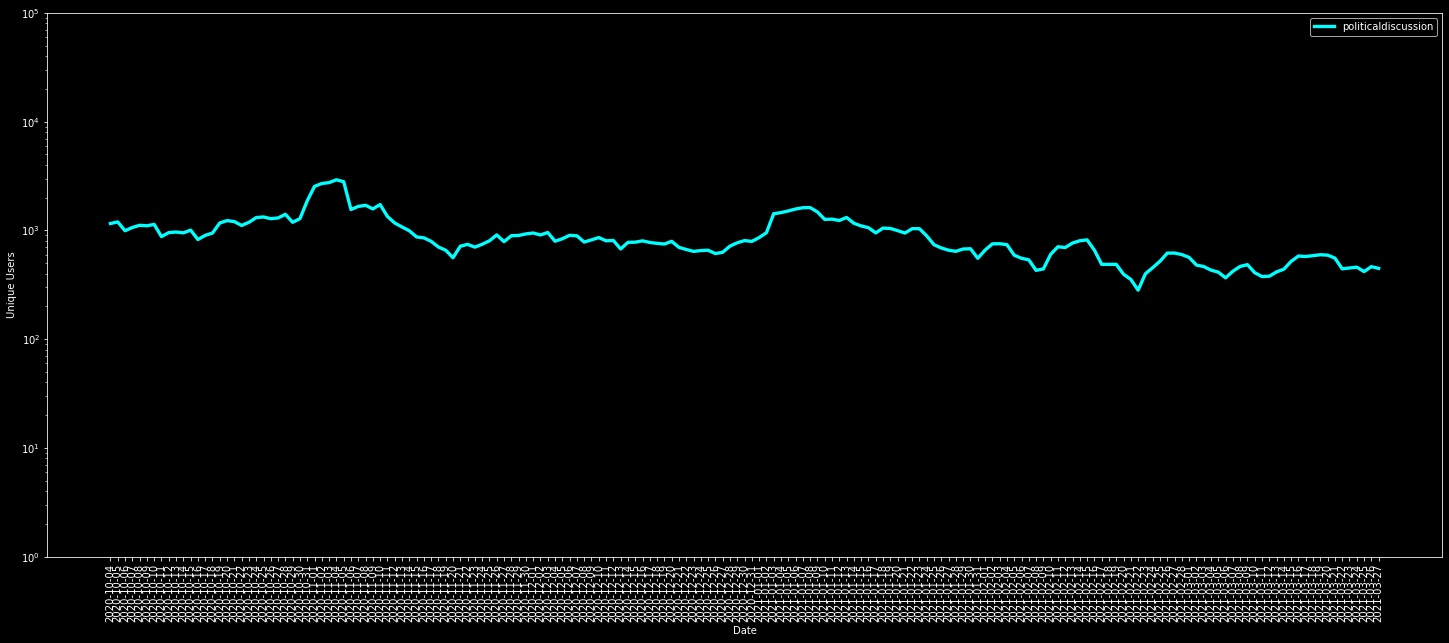

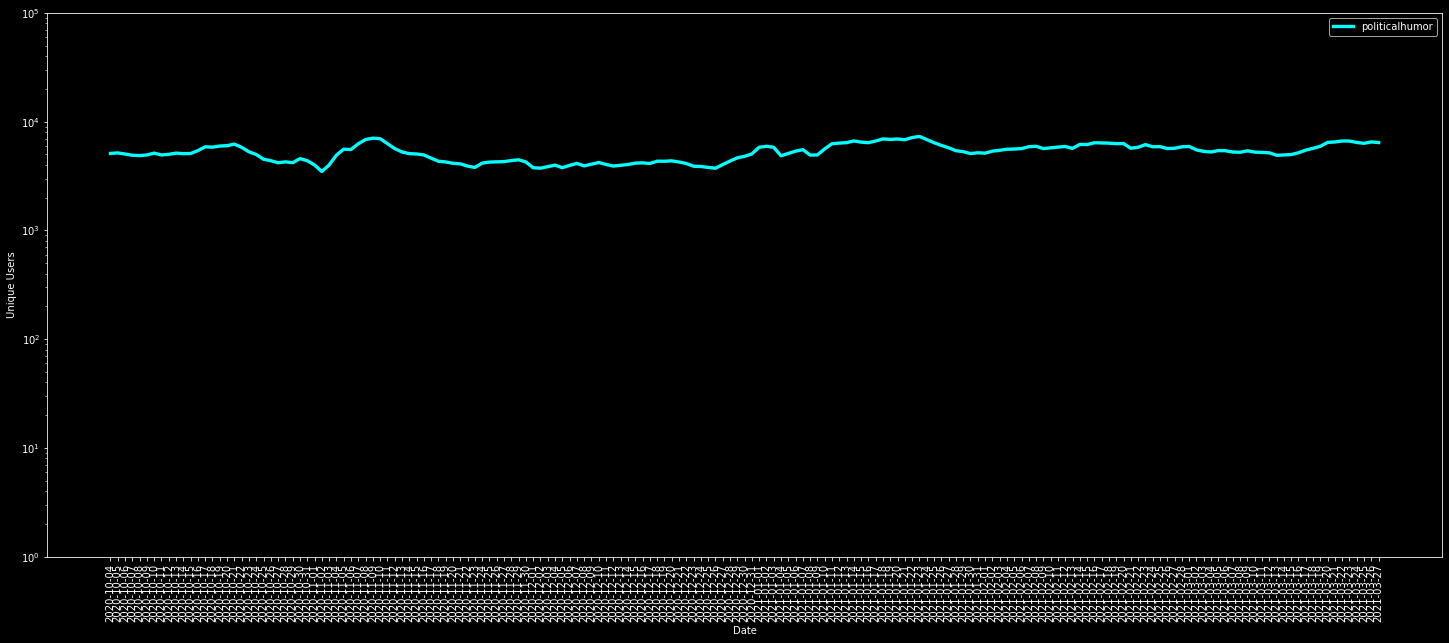

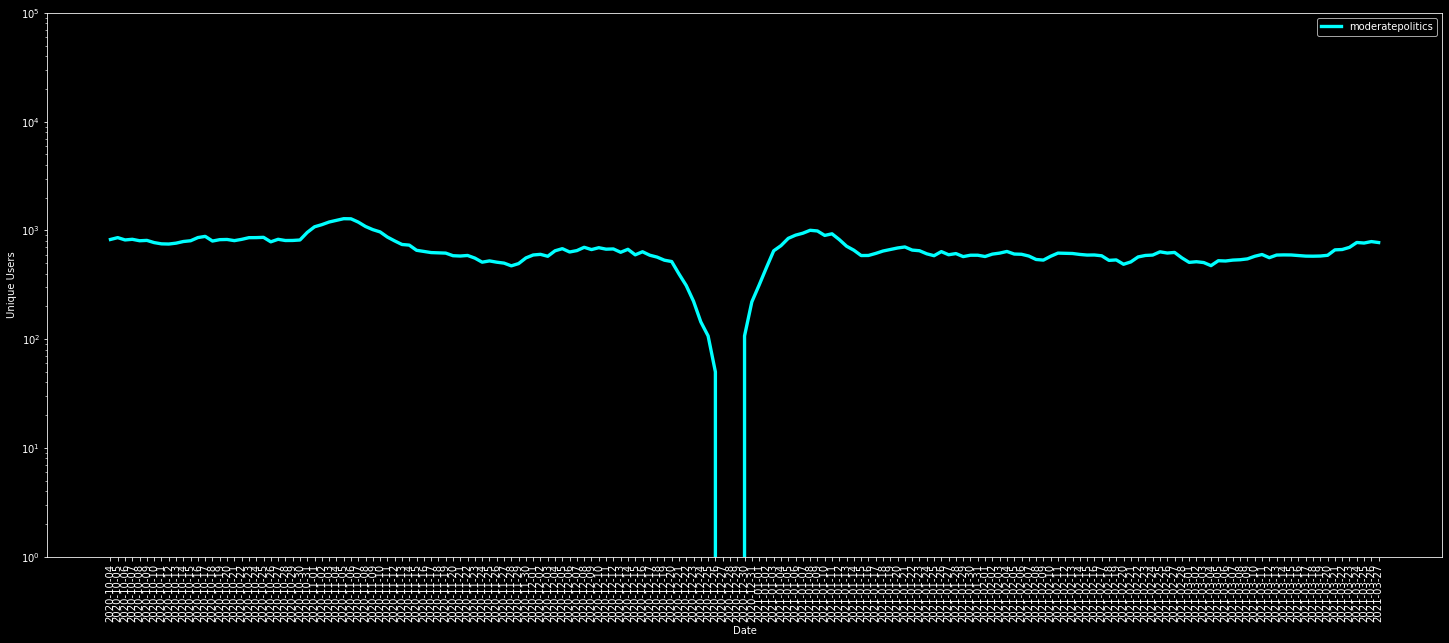

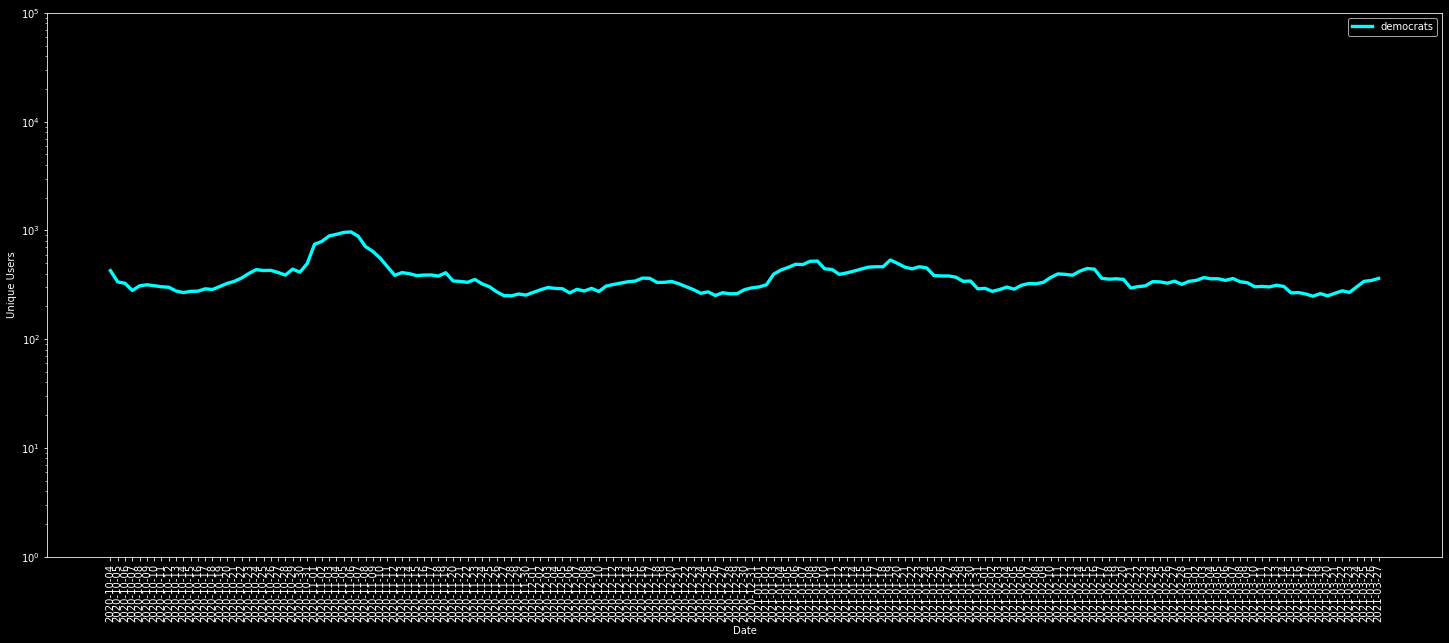

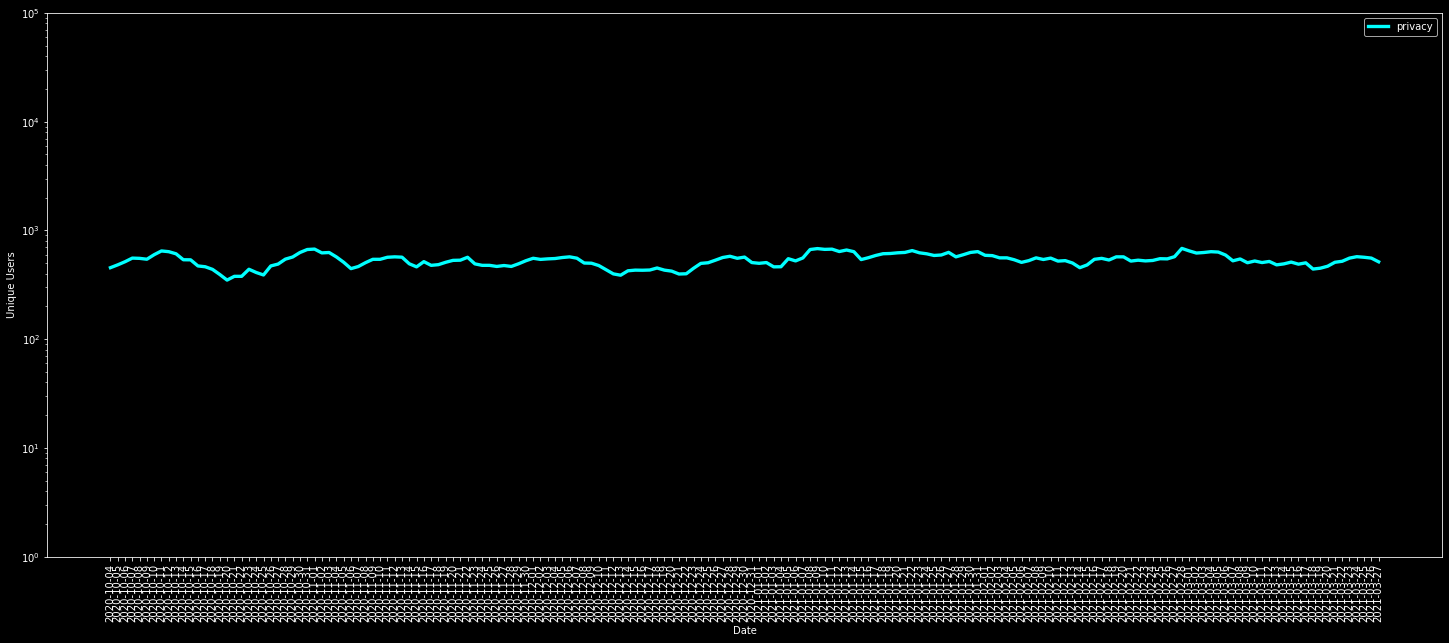

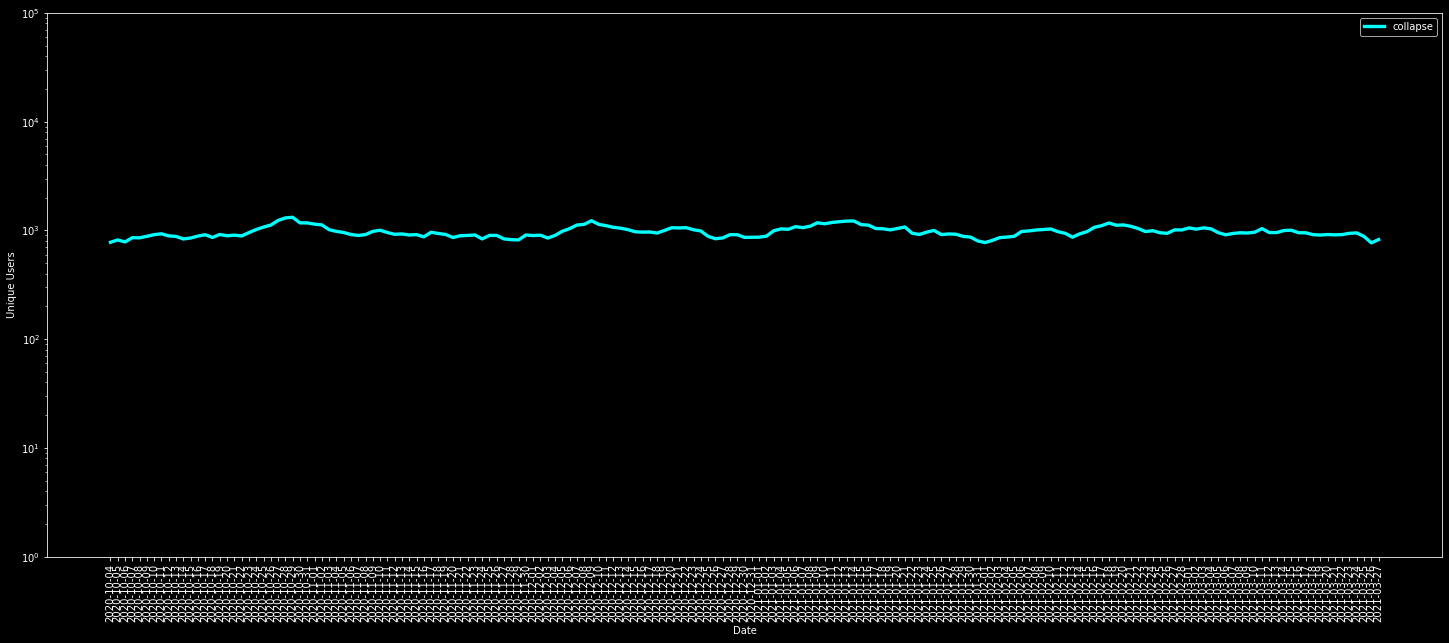

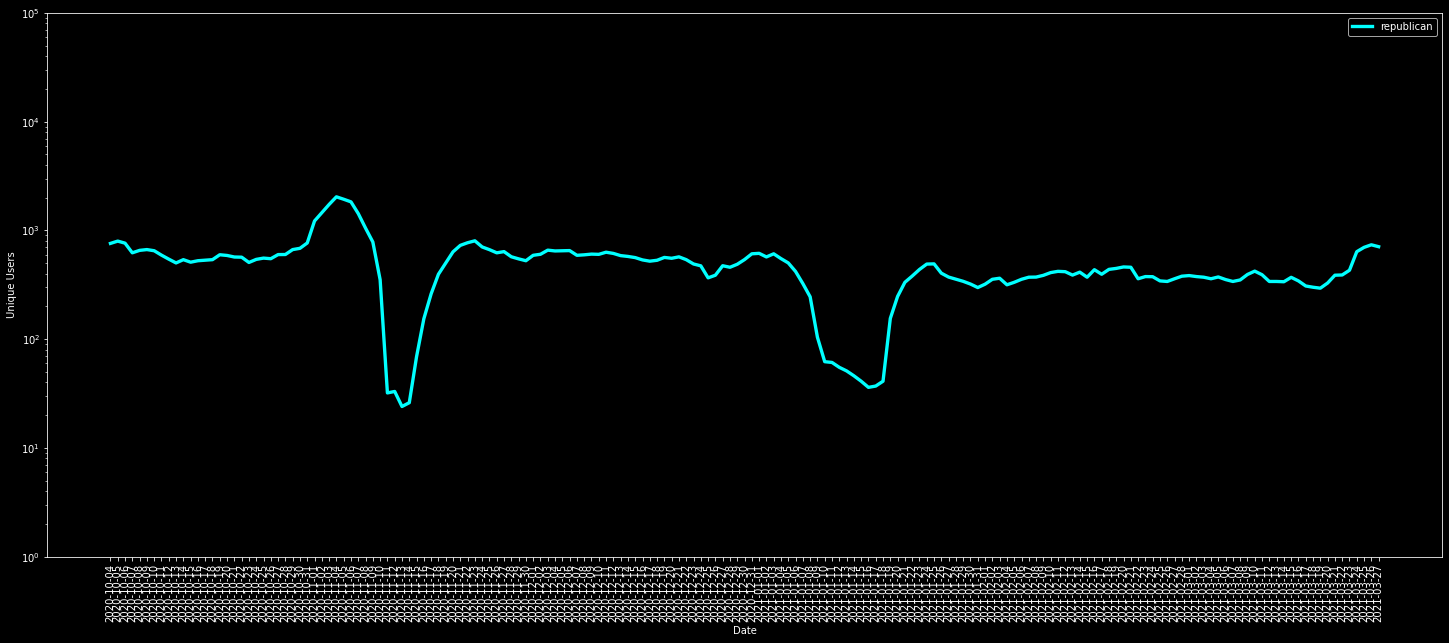

In [22]:
for sub in size_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(size_data.index, size_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.ylim(1,100000)  
    plt.yscale('log')
    plt.legend()

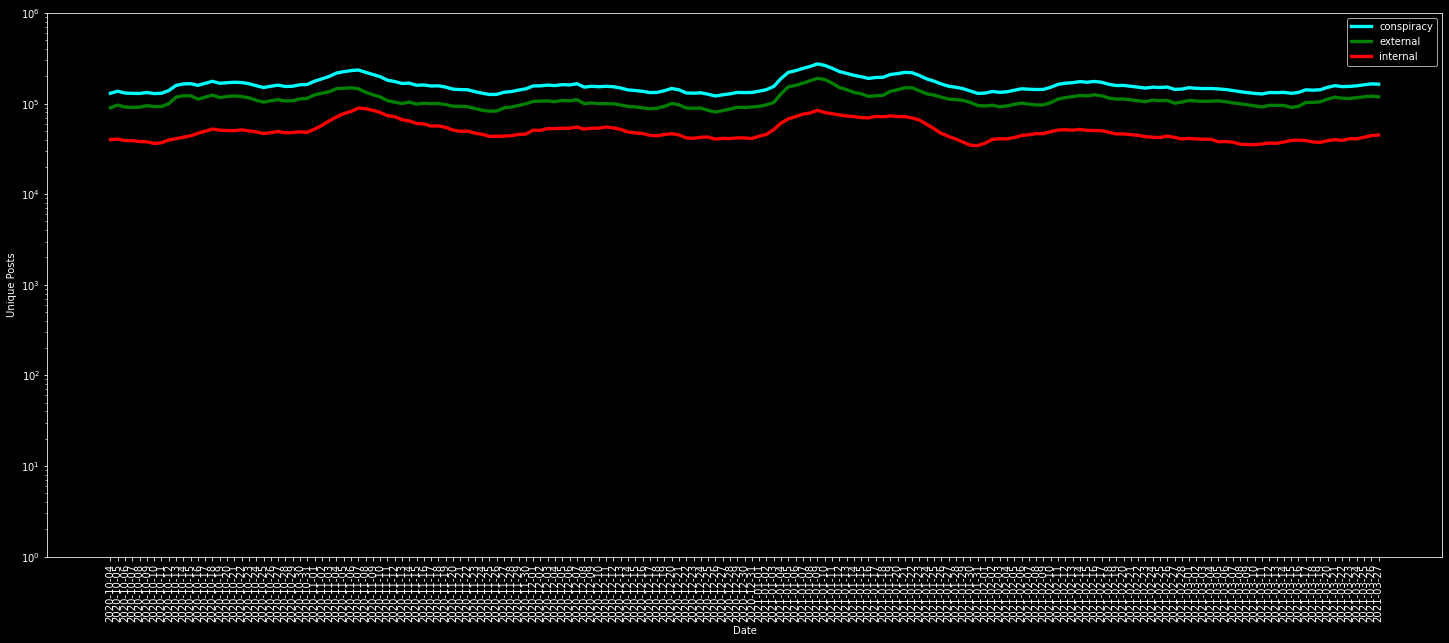

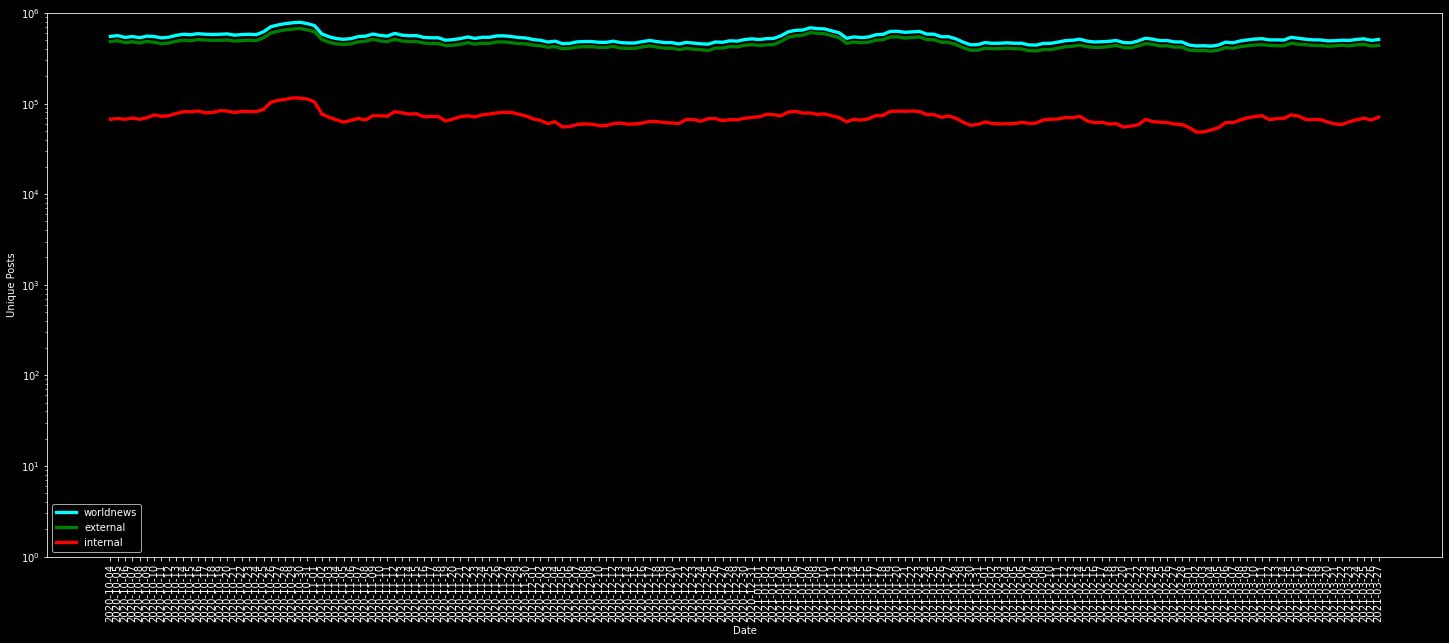

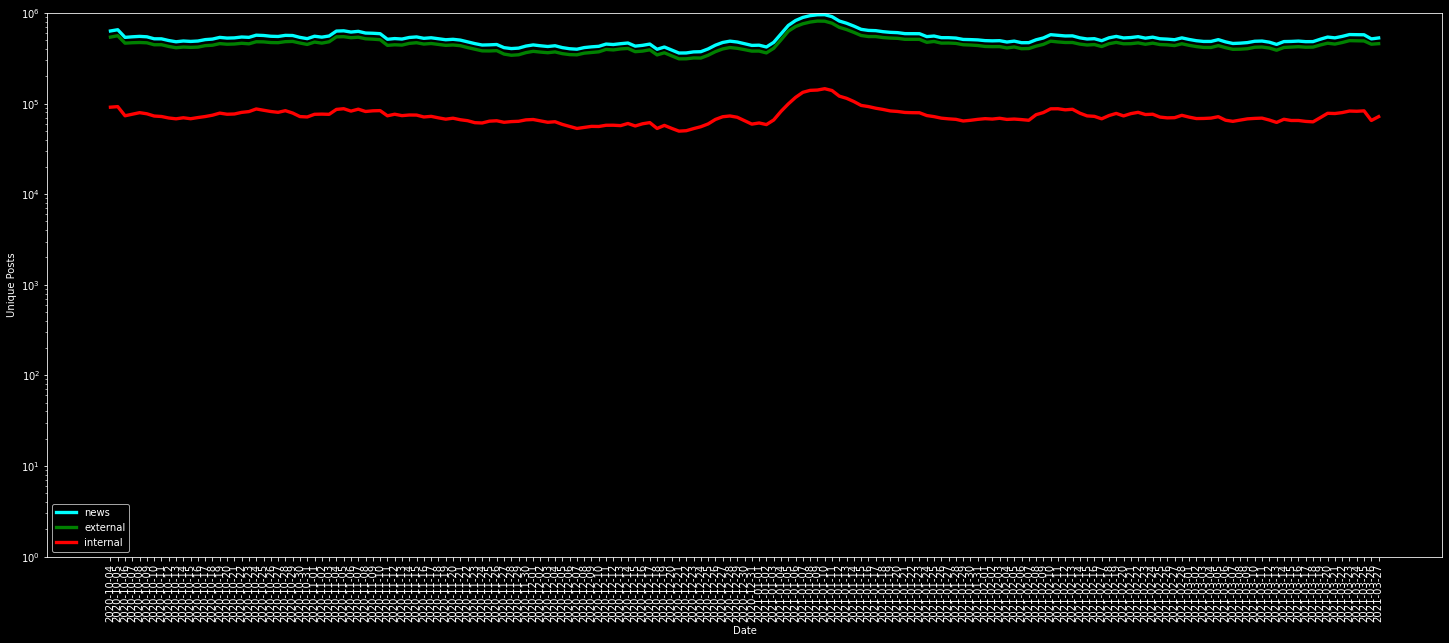

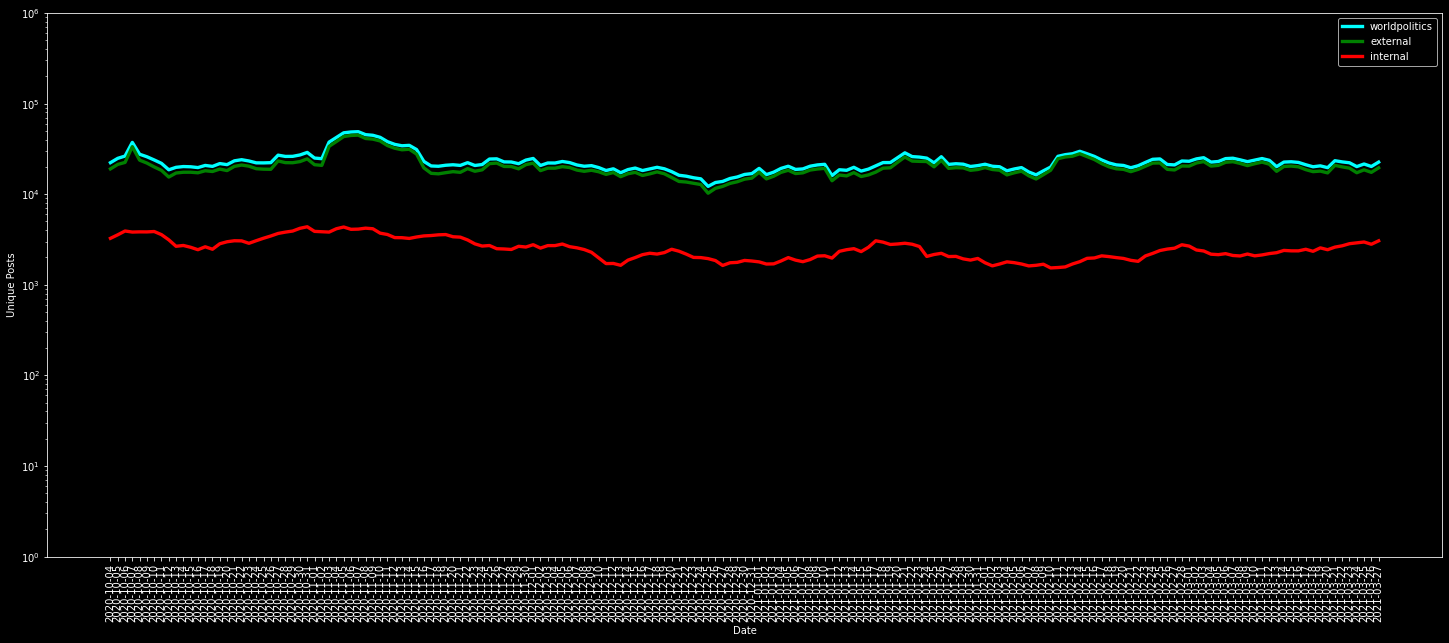

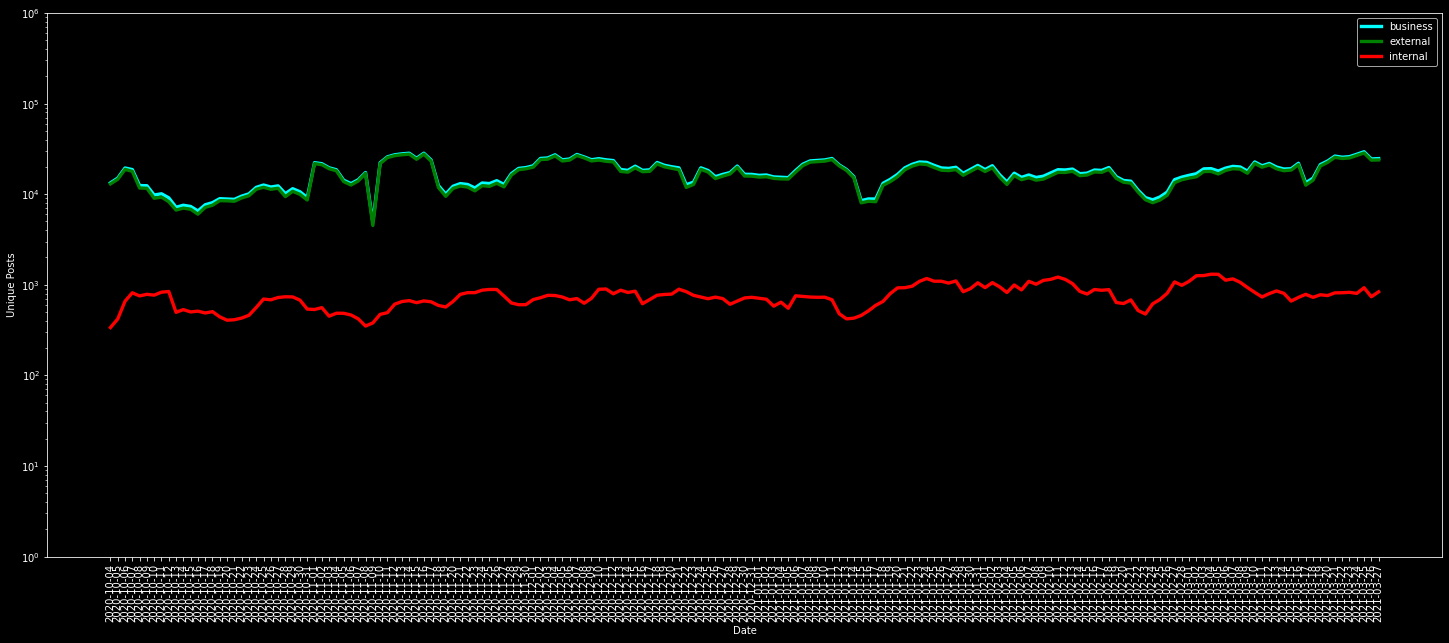

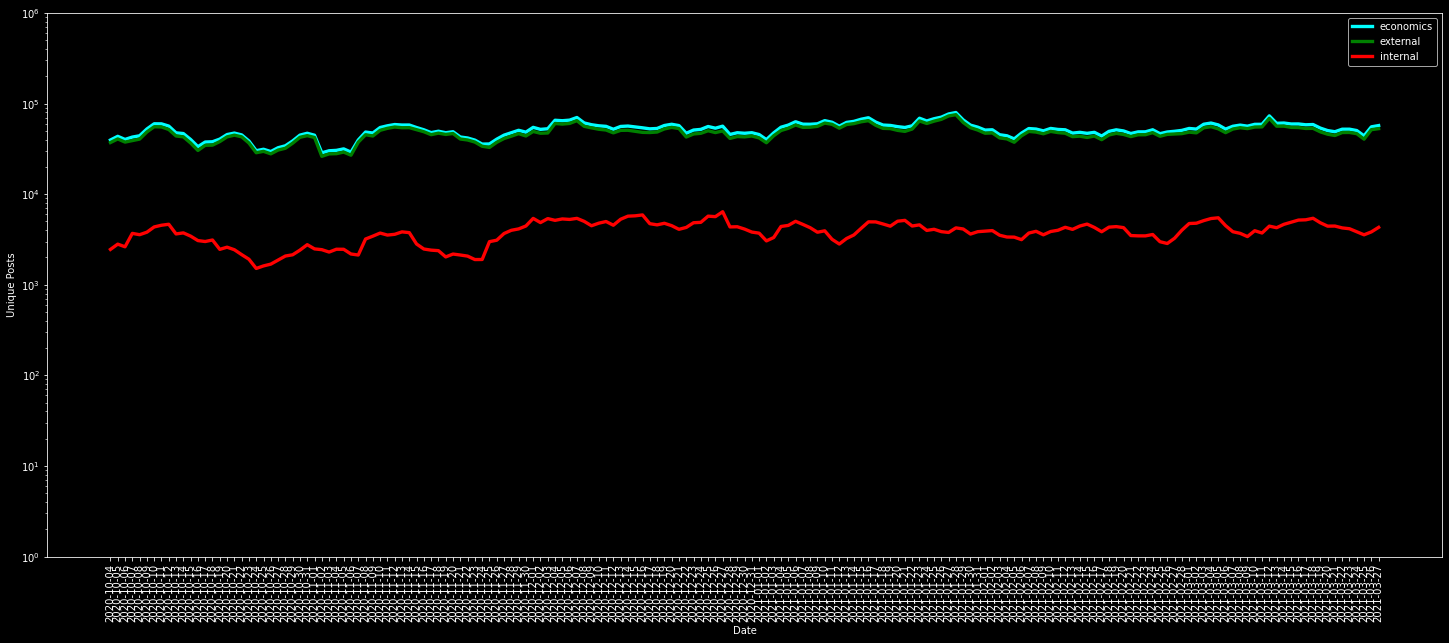

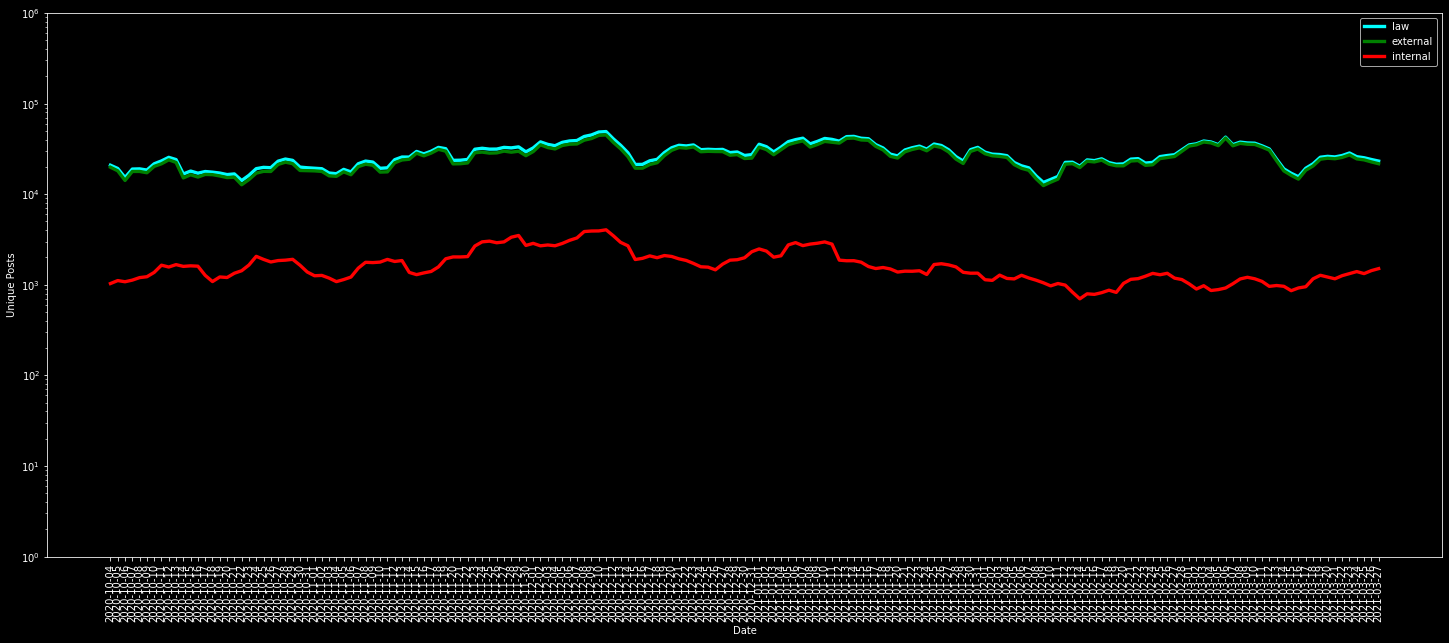

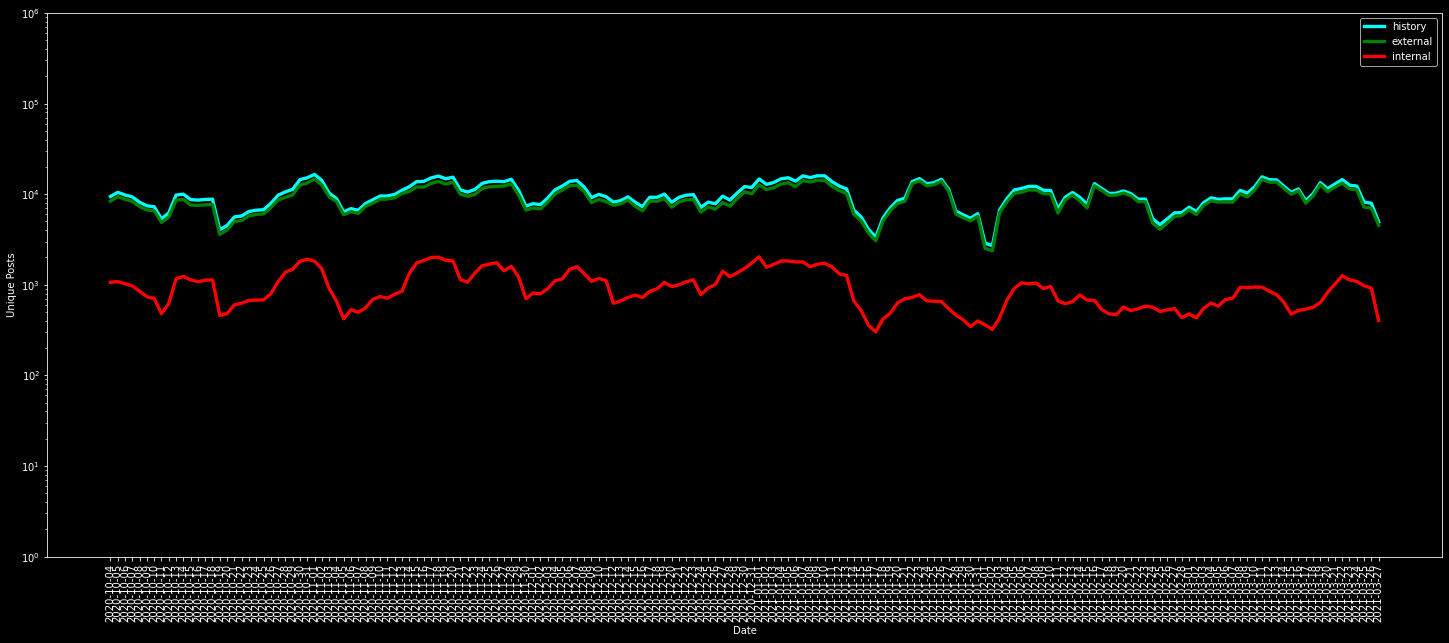

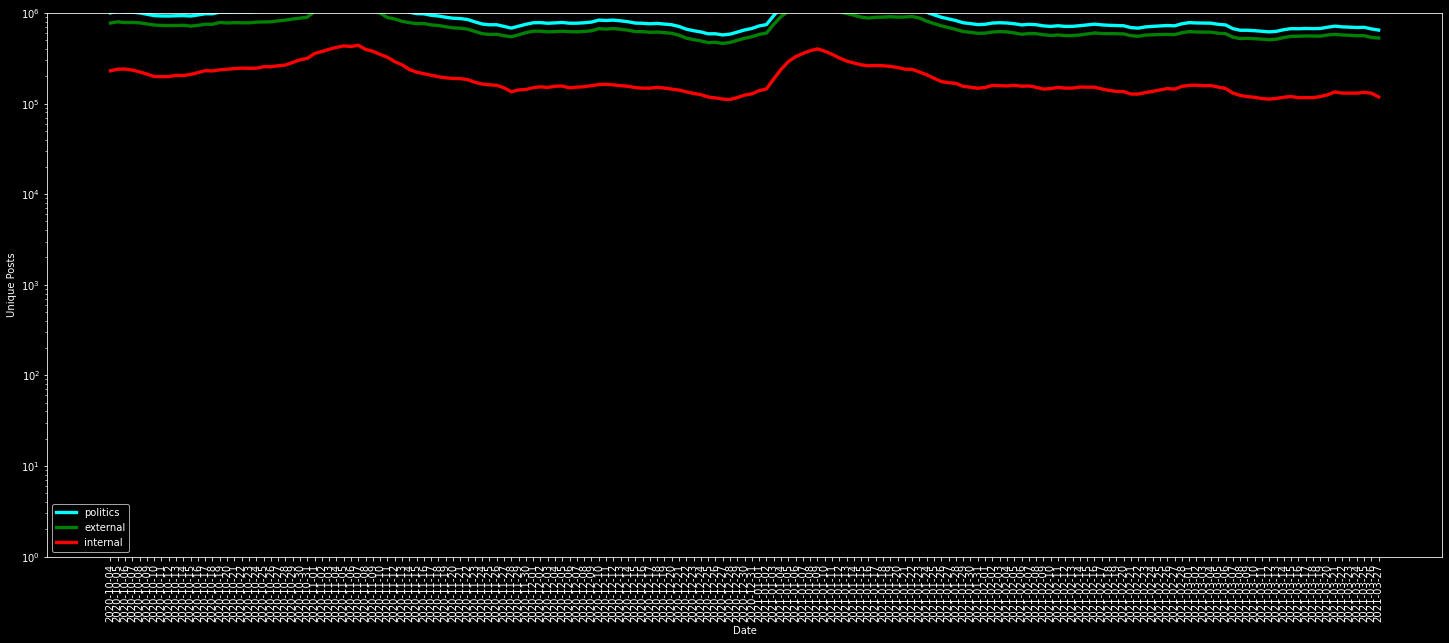

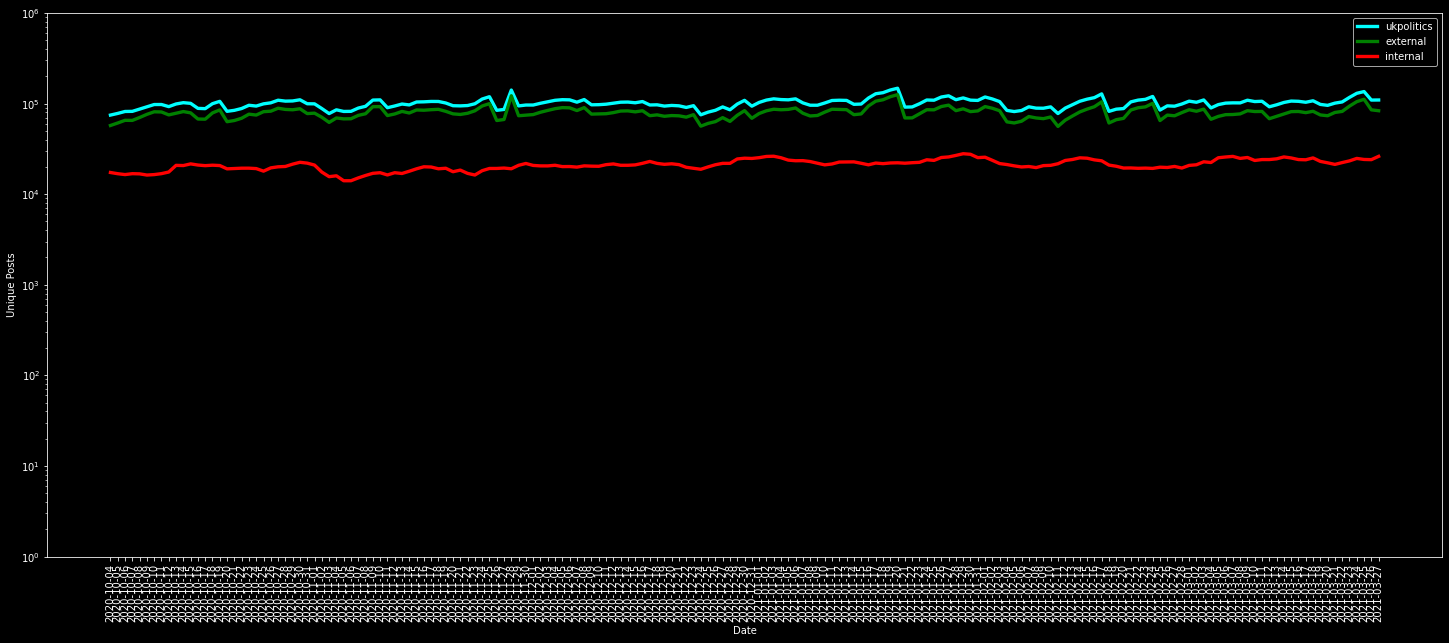

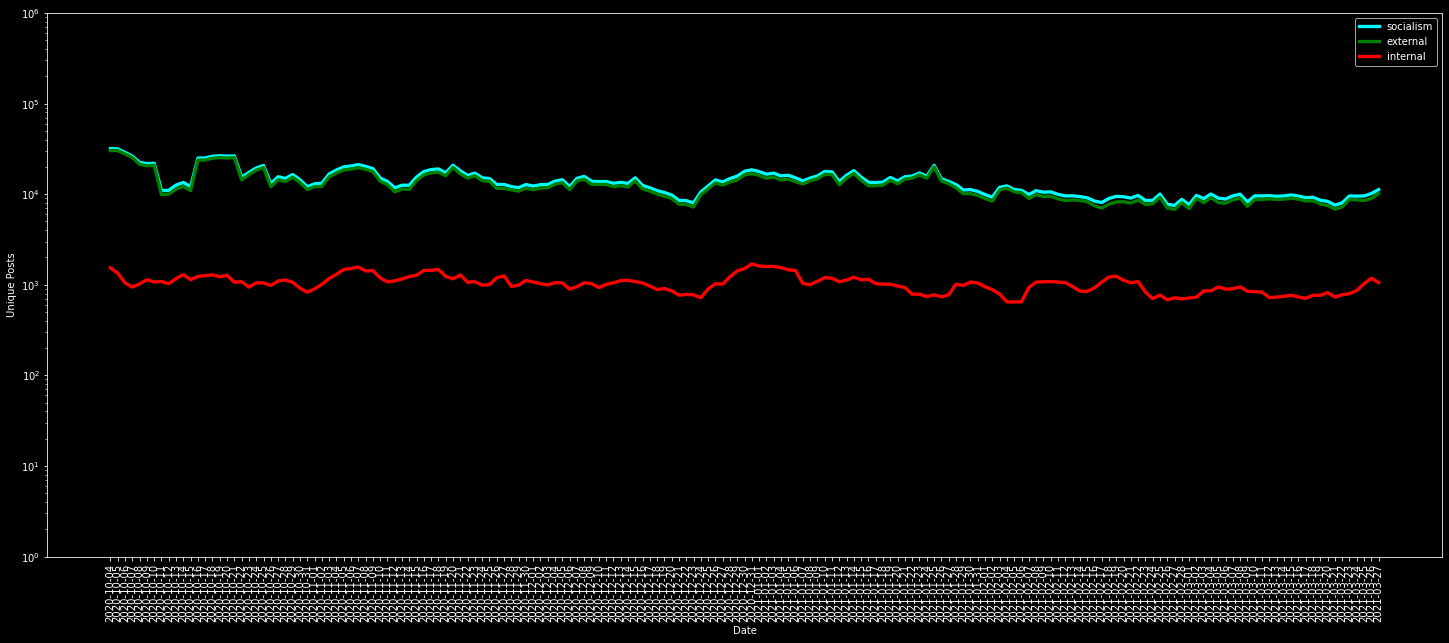

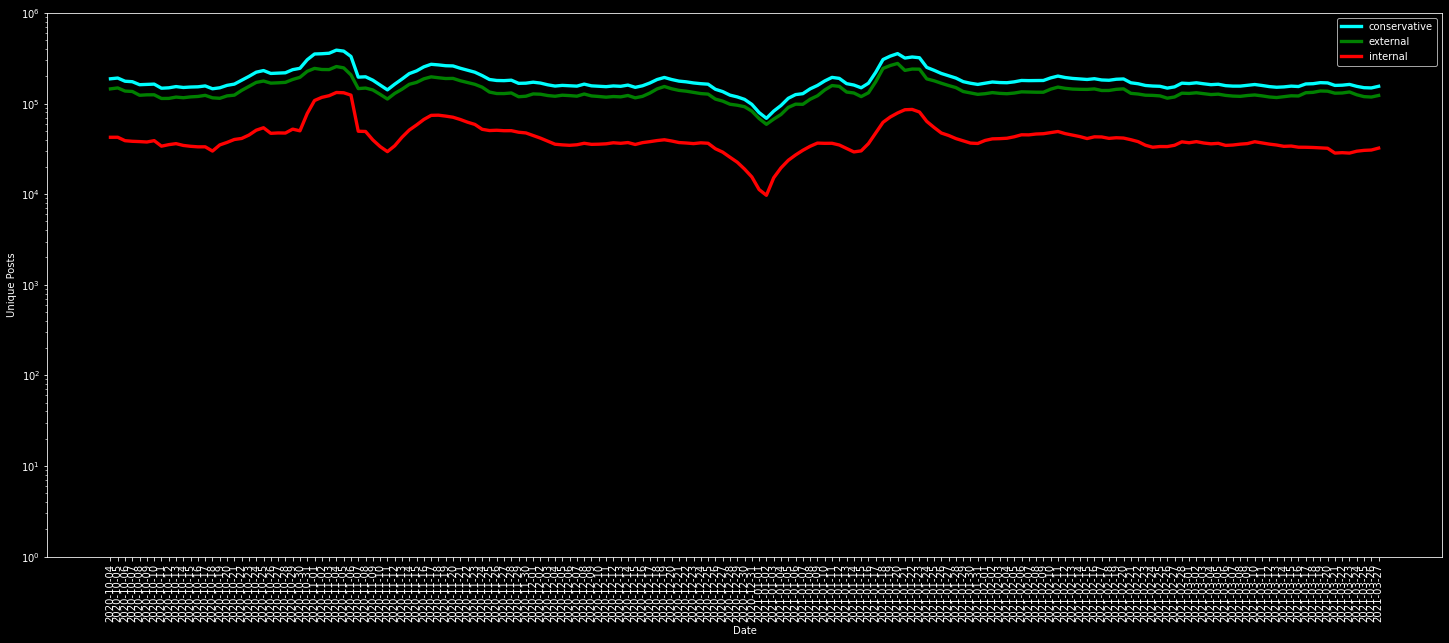

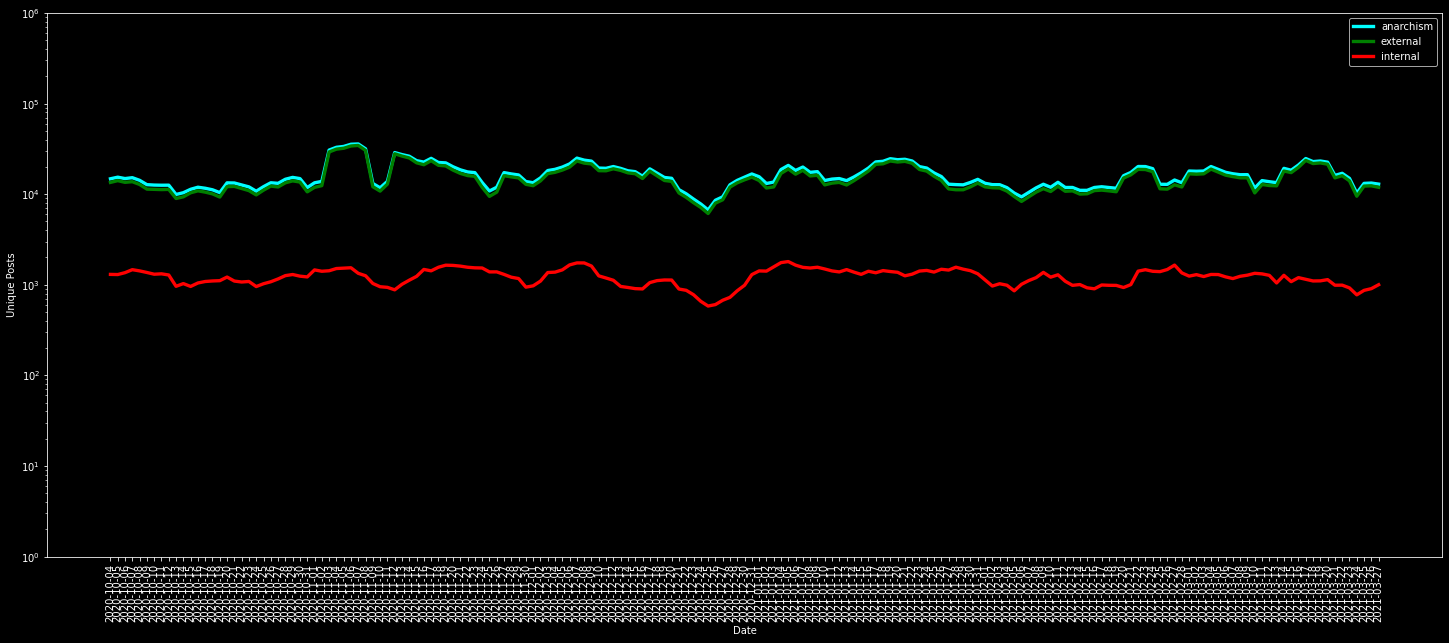

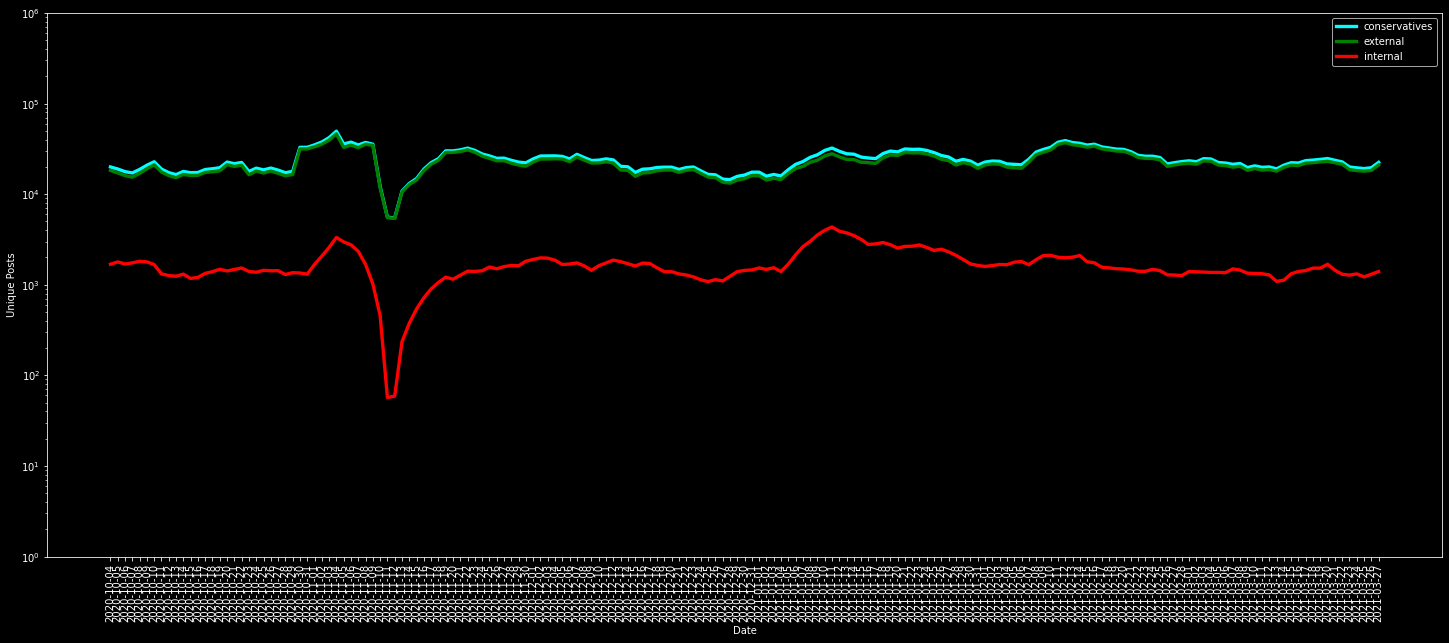

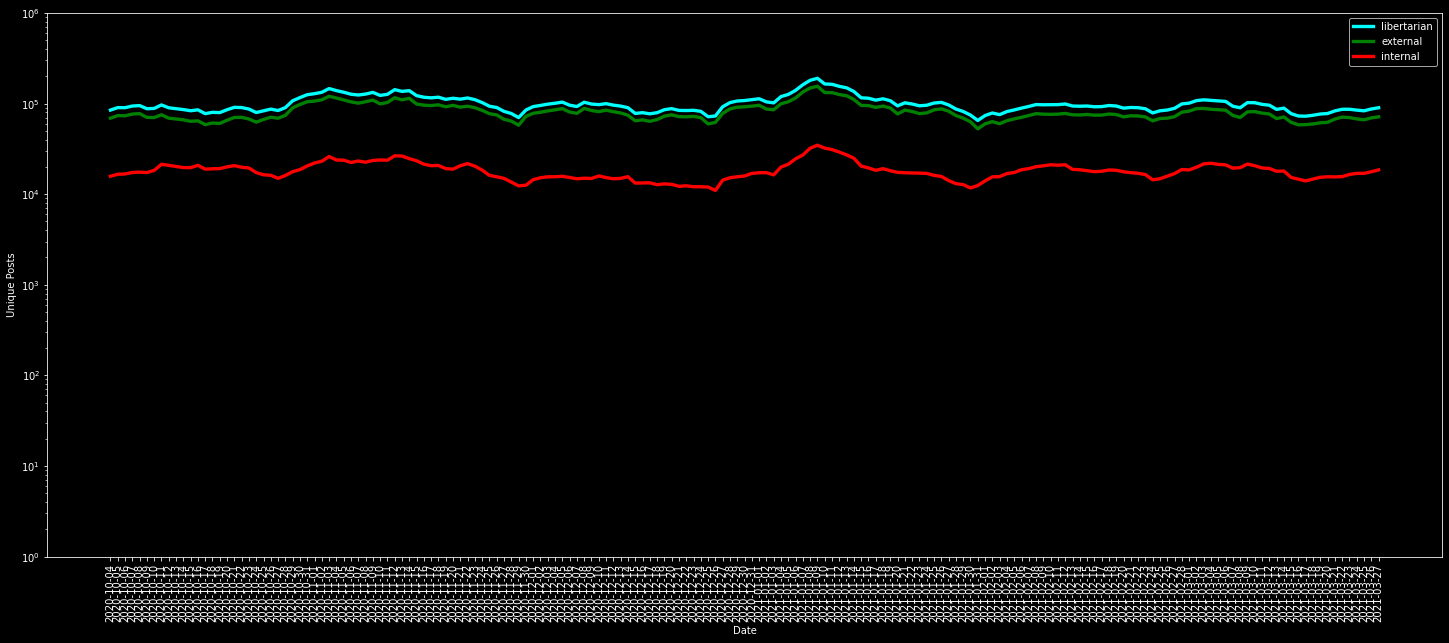

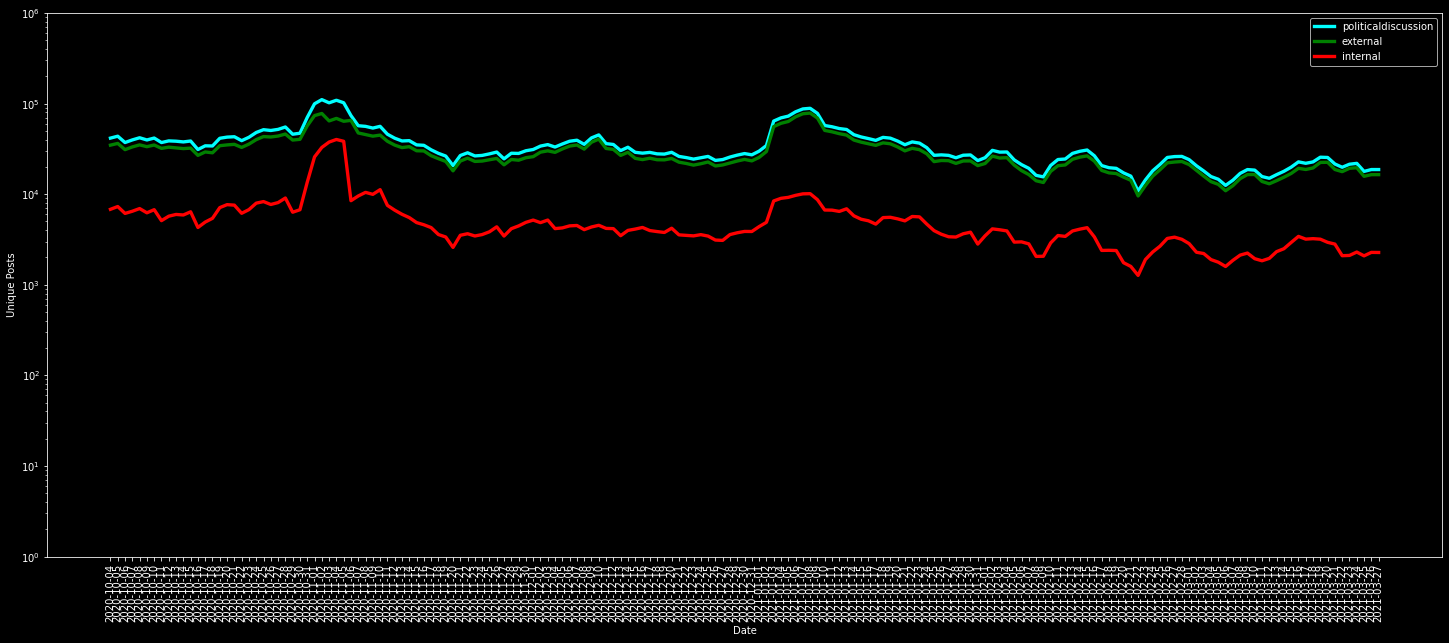

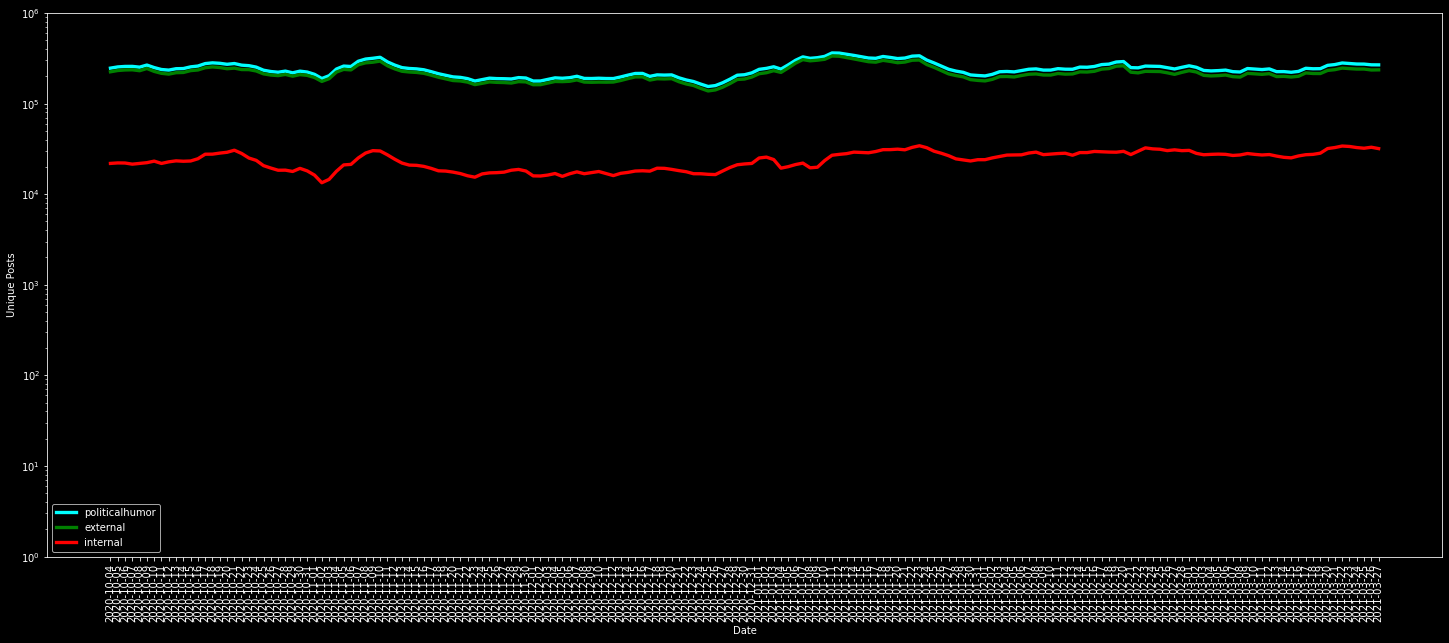

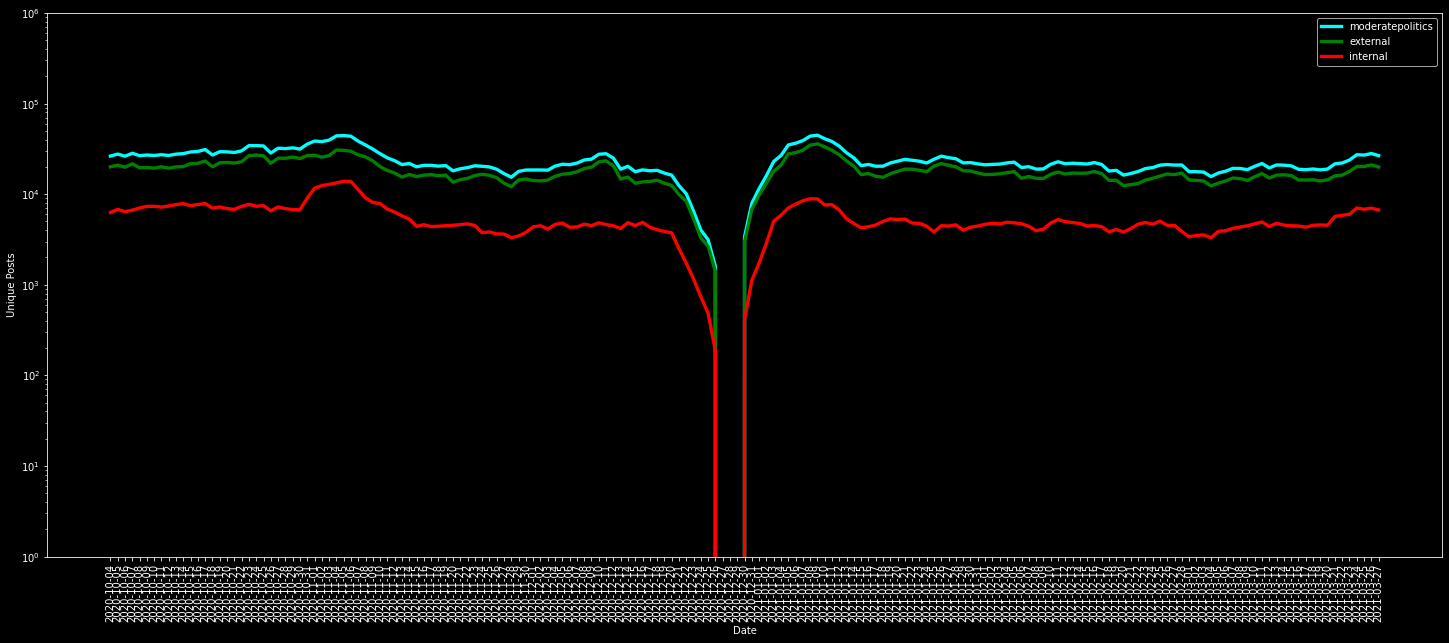

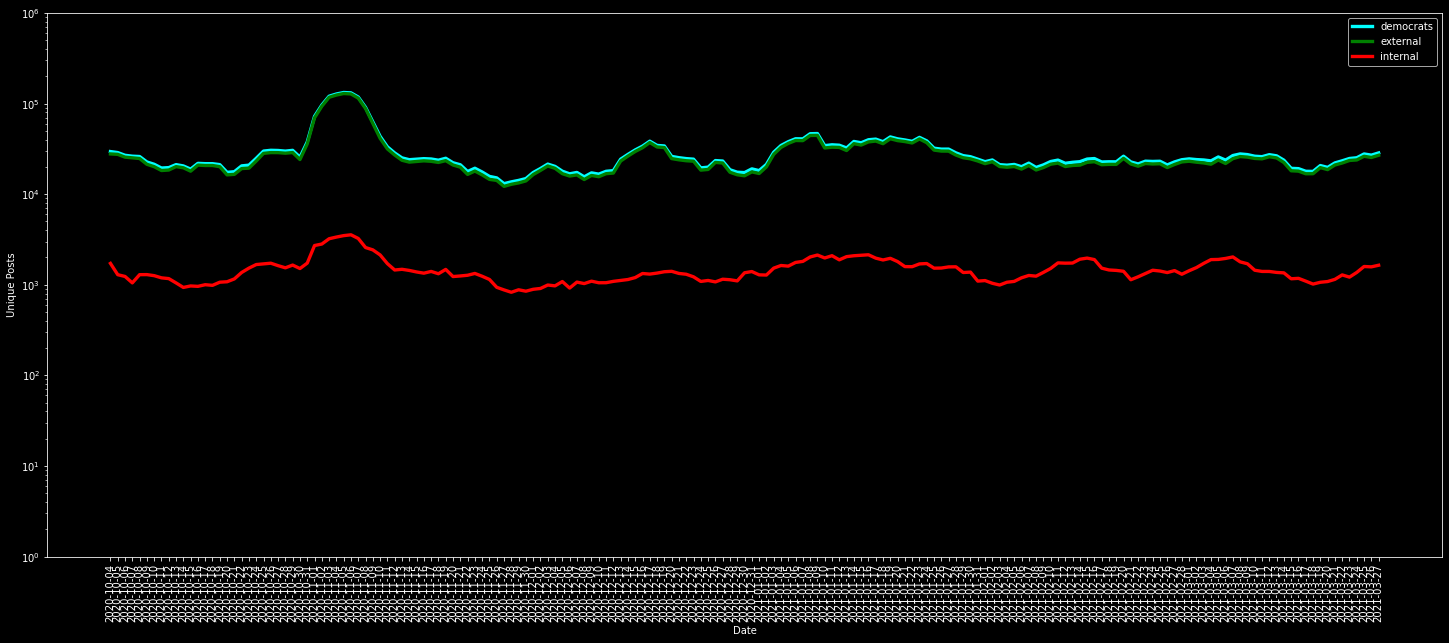

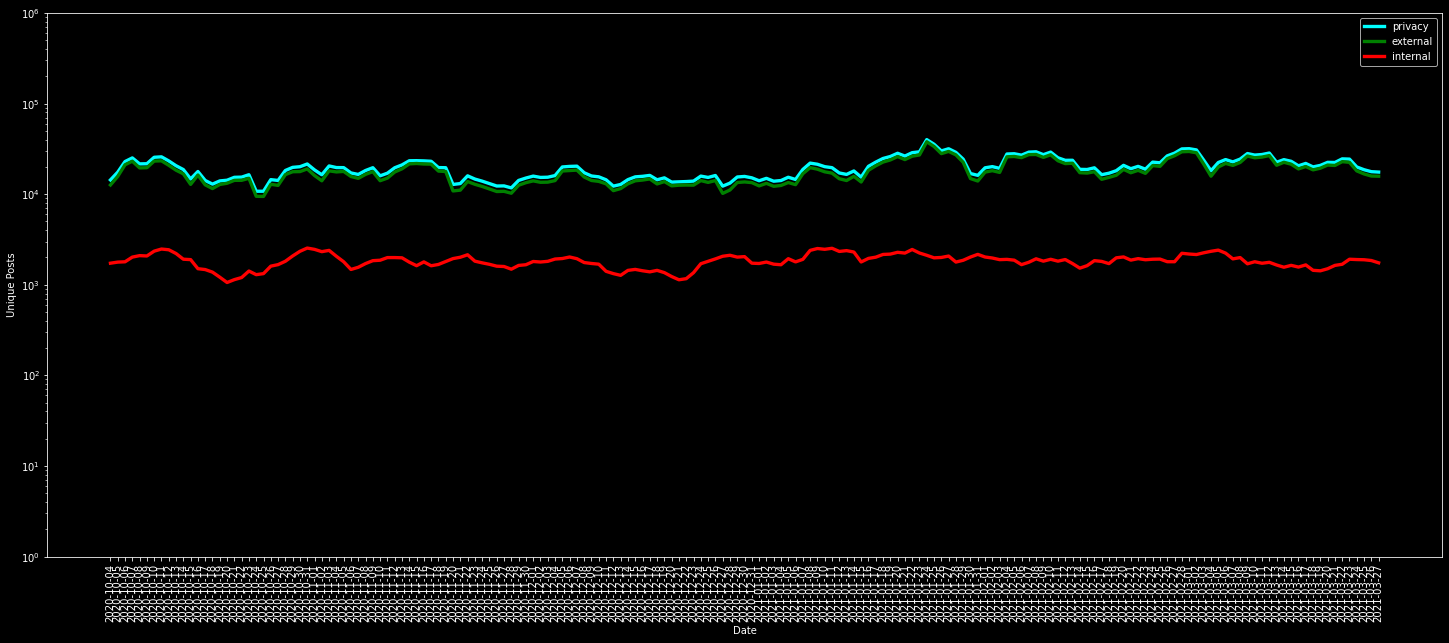

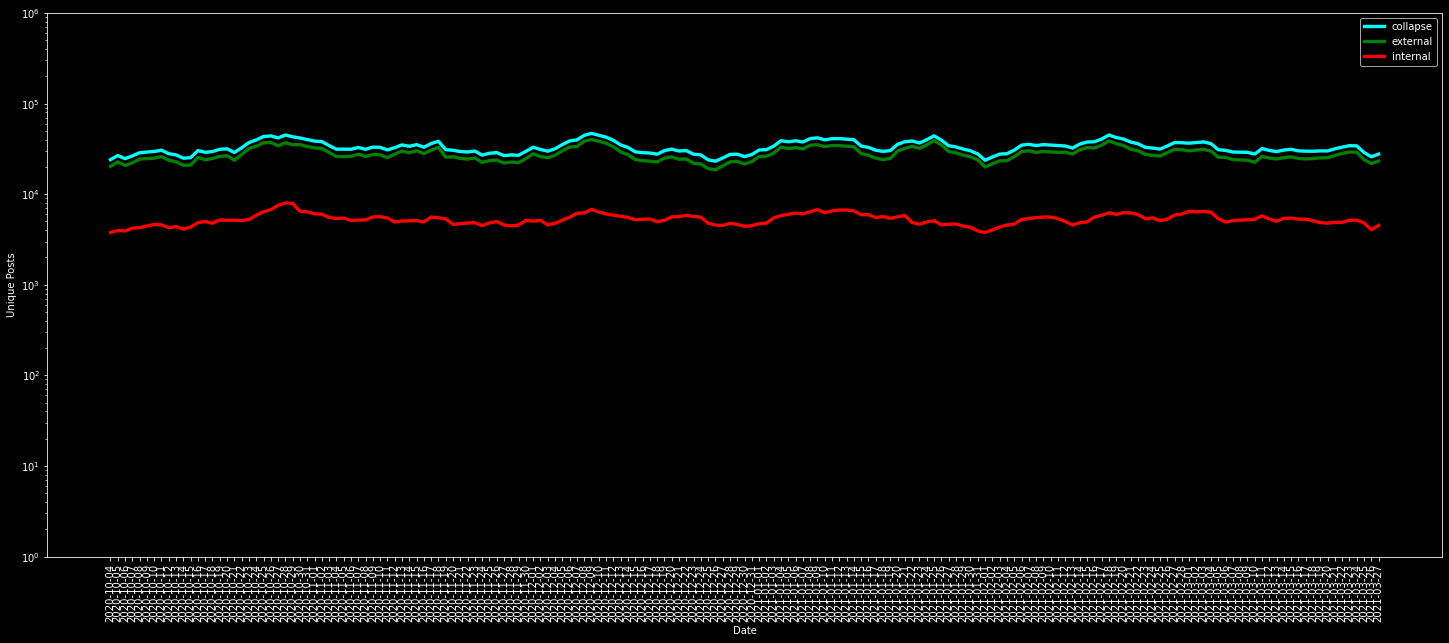

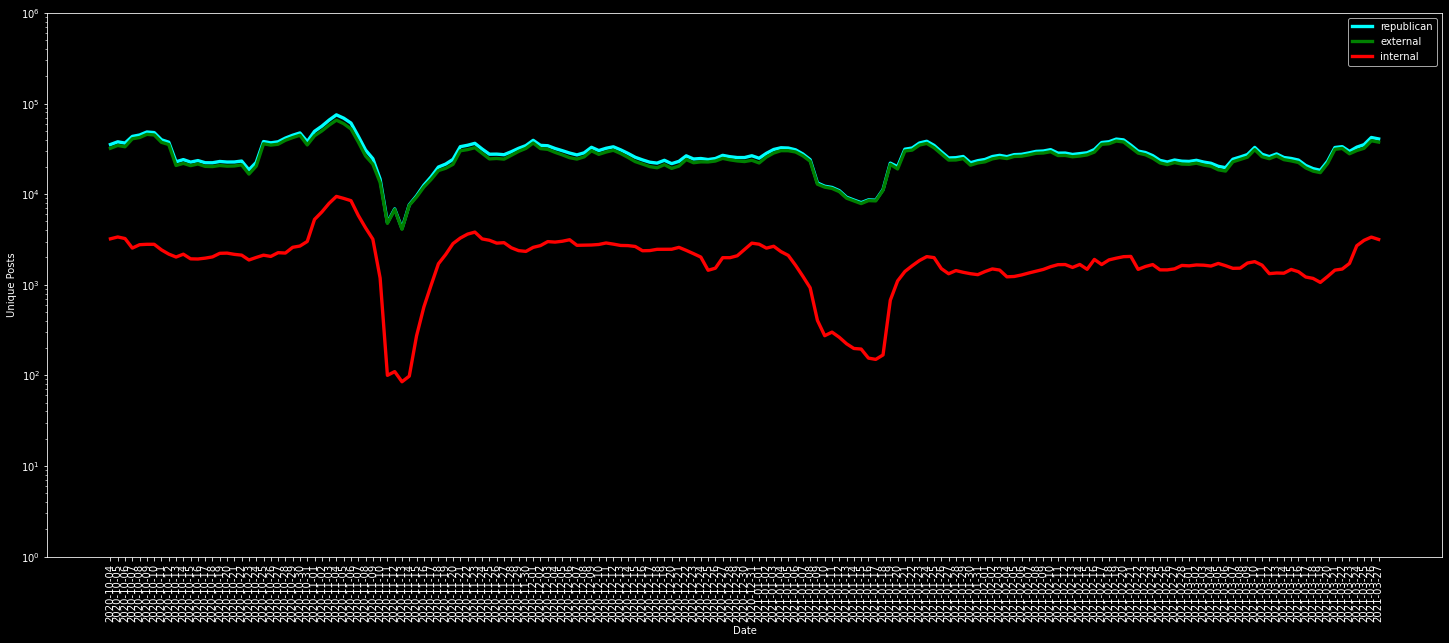

In [21]:
for sub in post_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(post_data.index, e_data[subbert][sub] + i_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.plot(e_data.index, e_data[subbert][sub], lw=3.333, c='green', label='external')
    plt.plot(i_data.index, i_data[subbert][sub], lw=3.333, c='red', label='internal')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Posts')
    plt.ylim(1,1000000)
    plt.yscale('log')
    plt.legend()

In [33]:
subbert = [
    'worldevents',
    # 'government',
    # 'politics2',
    'americanpolitics',
    'progressive',
    'liberal',
    # 'republicanism',
    # 'anarchist',
    'marxism',
    'objectivism',
    # 'communist',
    'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    'debate',
    # 'votingtheory',
    # 'racism',
    'foodforthought',
    # 'intelligence',
    # 'campaigns',
    # 'activism',
    # 'electionreform',
    ]

In [34]:
ei_data[subbert]

worldevents  americanpolitics  progressive   liberal   marxism  \
2020-10-04     0.769042               NaN     0.962403  0.915148  0.907083   
2020-10-05          NaN               NaN     0.973165  0.917813  0.918094   
2020-10-06          NaN               NaN     0.974473  0.916361  0.803714   
2020-10-07          NaN               NaN     0.974181  0.907580  0.677165   
2020-10-08          NaN          0.946614     0.975098  0.889538       NaN   
2020-10-09          NaN          0.922357     0.968783  0.887412       NaN   
2020-10-10          NaN          0.913803     0.950539  0.893383       NaN   
2020-10-11          NaN          0.918004     0.948932  0.881262       NaN   
2020-10-12          NaN          0.902312     0.930000  0.888627  0.669725   
2020-10-13     0.844828          0.879058     0.911474  0.882196  0.710247   
2020-10-14     0.861440          0.855830     0.905066  0.874727  0.865285   
2020-10-15     0.856089          0.822493     0.918790  0.893793  0.803526   
2020-10-16     0.848691          0.790084     0.913043  0.867473  0.836645   
2020-10-17     0.840066          0.765903     0.933976  0.865856       NaN   
2020-10-18     0.859249          0.818822     0.958395  0.847394       NaN   
2020-10-19     0.907388          0.791873     0.953973  0.853453  0.934944   
2020-10-20          NaN          0.794989     0.970069  0.843932  0.917481   
2020-10-21          NaN          0.807890     0.969453  0.847584  0.896328   
2020-10-22          NaN          0.824610     0.967621  0.854508  0.881773   
2020-10-23     0.964013          0.825381     0.960620  0.872157  0.922999   
2020-10-24          NaN          0.887588     0.946212  0.941302  0.906572   
2020-10-25          NaN          0.903819     0.931082  0.957819  0.874656   
2020-10-26          NaN          0.916327     0.935398  0.970461  0.699670   
2020-10-27     0.958234          0.959583     0.900327  0.966112  0.711075   
2020-10-28     0.964592          0.953497     0.861597  0.965884  0.684768   
2020-10-29     0.967427          0.948868     0.895012  0.966977  0.669271   
2020-10-30     0.954939          0.955056     0.863073  0.913517  0.656442   
2020-10-31     0.957158          0.963654     0.876997  0.904490  0.683333   
2020-11-01     0.957135          0.960448     0.882602  0.801407  0.702422   
2020-11-02     0.938387          0.956163     0.868486  0.784705  0.686792   
2020-11-03     0.901478          0.818182     0.858090  0.818762  0.686813   
2020-11-04     0.916762          0.845515     0.858186  0.984847  0.688985   
2020-11-05     0.924468          0.814685     0.875375  0.987975  0.666667   
2020-11-06     0.928095          0.782470     0.847773  0.987426  0.742049   
2020-11-07     0.942492          0.801144     0.851396  0.985149  0.787671   
2020-11-08     0.947134          0.884252     0.867130  0.982060  0.820946   
2020-11-09     0.962643          0.875344     0.874797  0.969042       NaN   
2020-11-10     0.951858          0.892807     0.880848  0.940477       NaN   
2020-11-11     0.956226          0.879908     0.880499  0.873317       NaN   
2020-11-12          NaN          0.882780     0.878574  0.871161       NaN   
2020-11-13          NaN          0.822817     0.894737  0.865859       NaN   
2020-11-14     0.947390          0.805749     0.925507  0.878526       NaN   
2020-11-15     0.956622          0.843137     0.916913  0.900835       NaN   
2020-11-16          NaN          0.864594     0.914325  0.907173       NaN   
2020-11-17     0.959936          0.876901     0.904266  0.921959       NaN   
2020-11-18     0.940890          0.899099     0.926723  0.913337       NaN   
2020-11-19     0.934483               NaN     0.895053  0.908127       NaN   
2020-11-20     0.845238               NaN     0.842536  0.909019       NaN   
2020-11-21     0.884857               NaN     0.859739  0.899642       NaN   
2020-11-22     0.921444          0.805405     0.880623  0.881793       NaN   
2020-11-23     0.904731          0

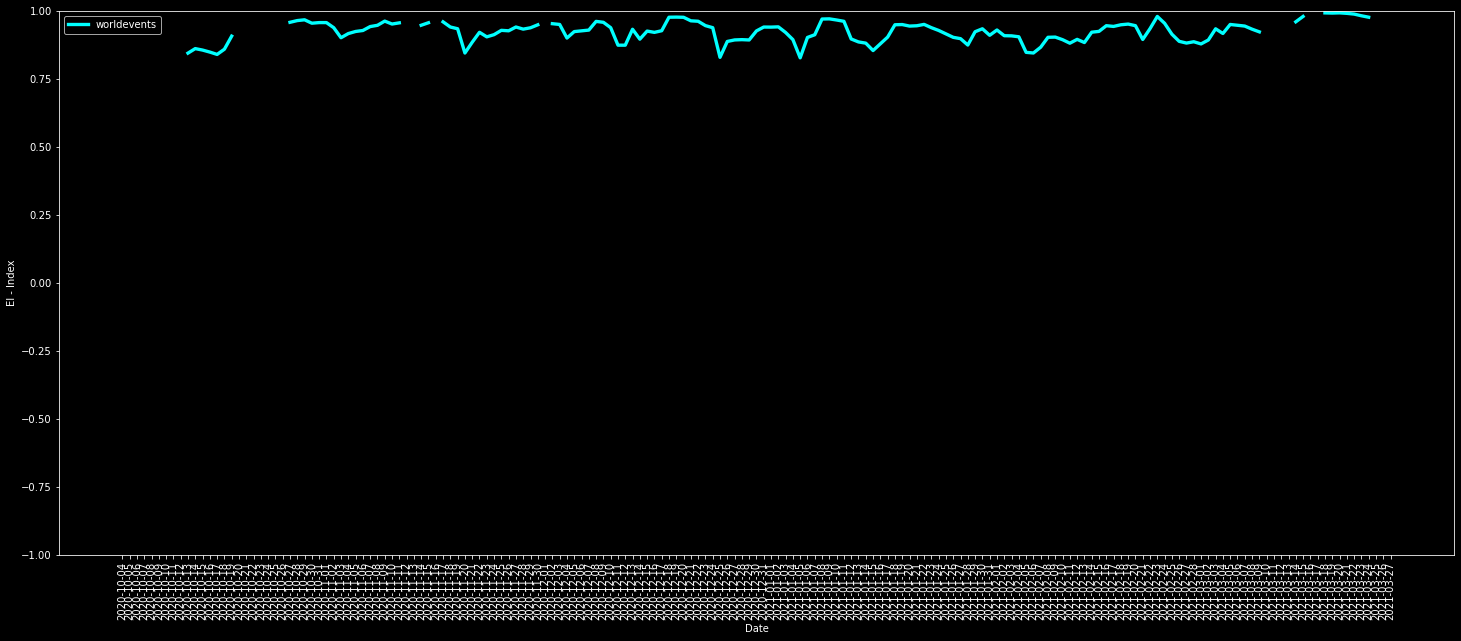

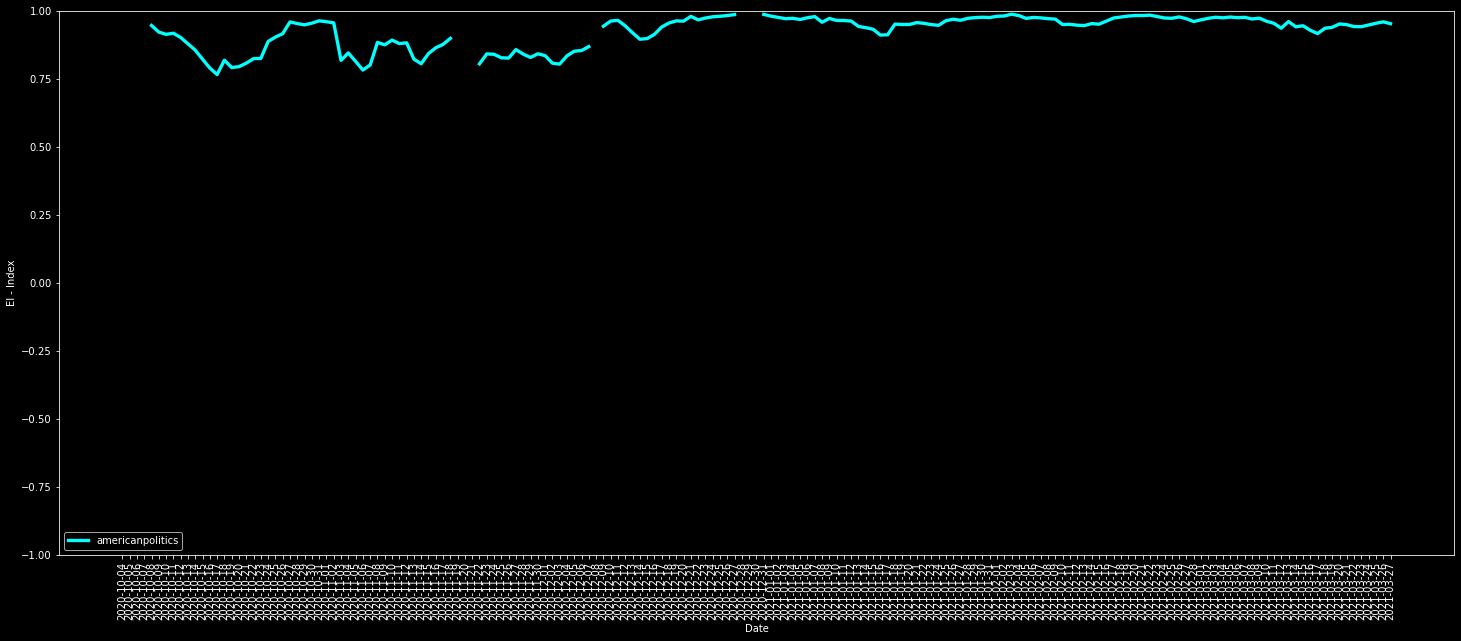

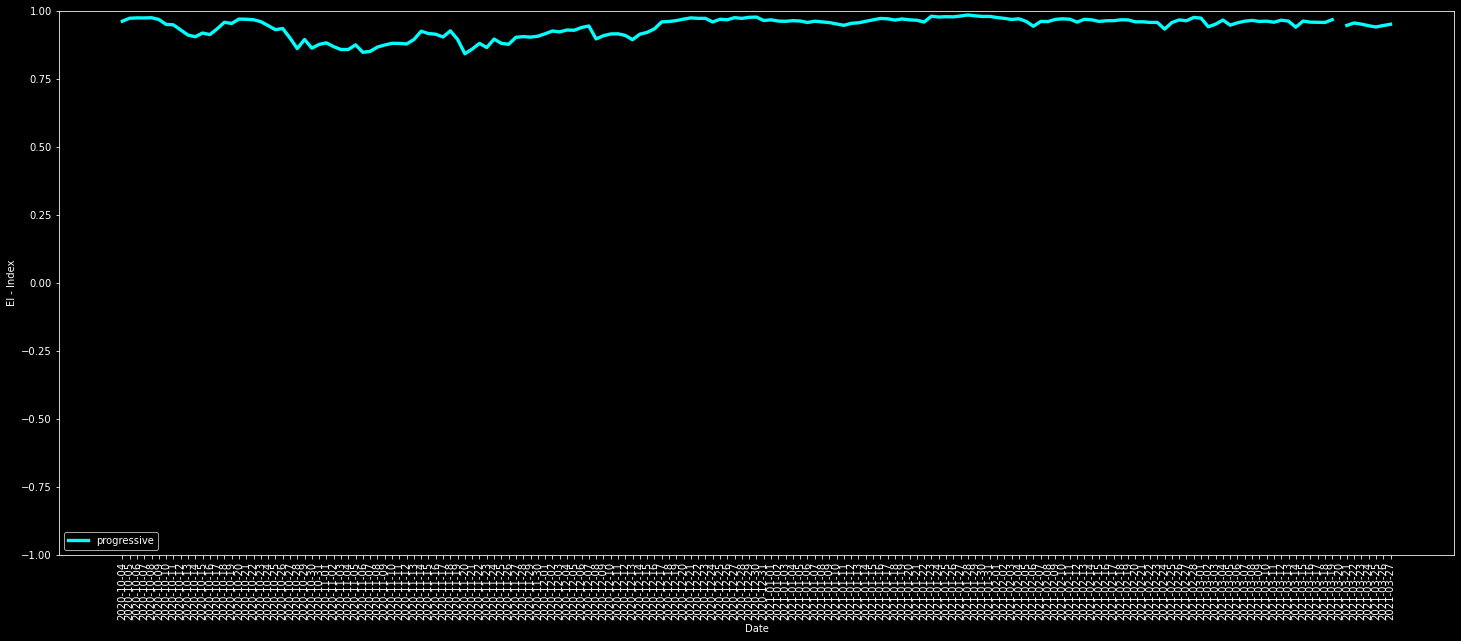

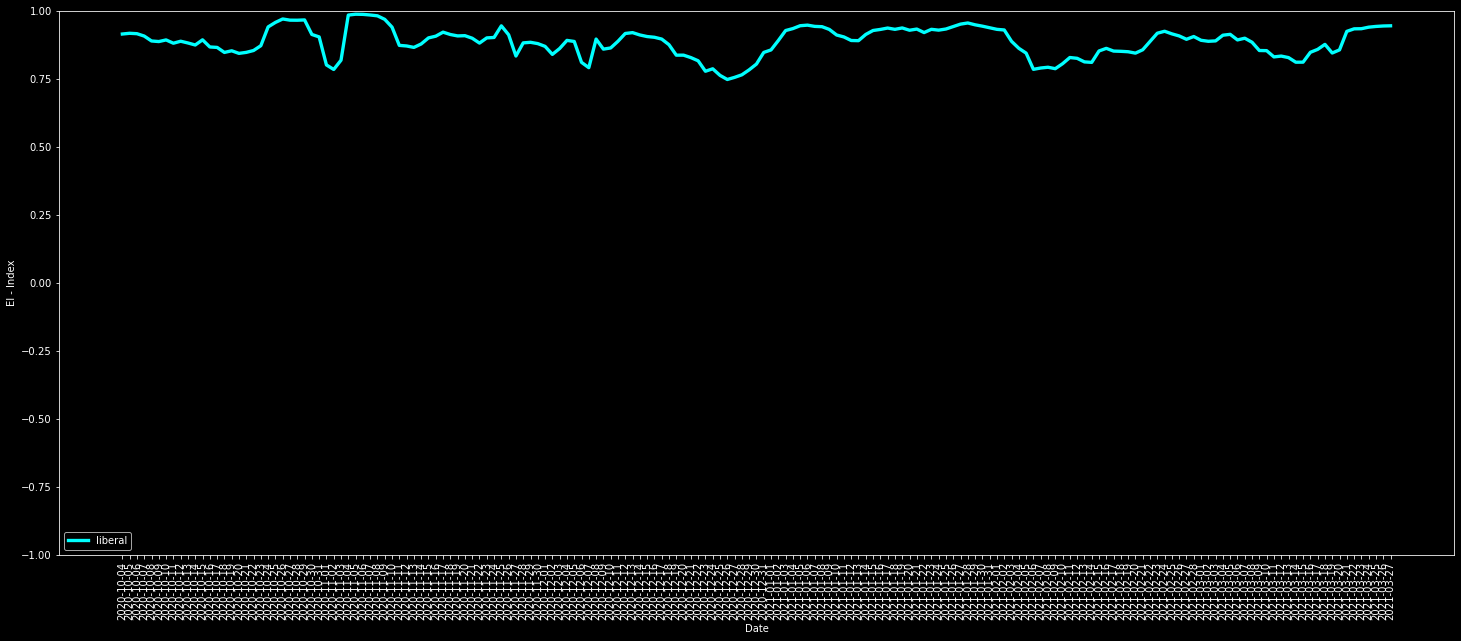

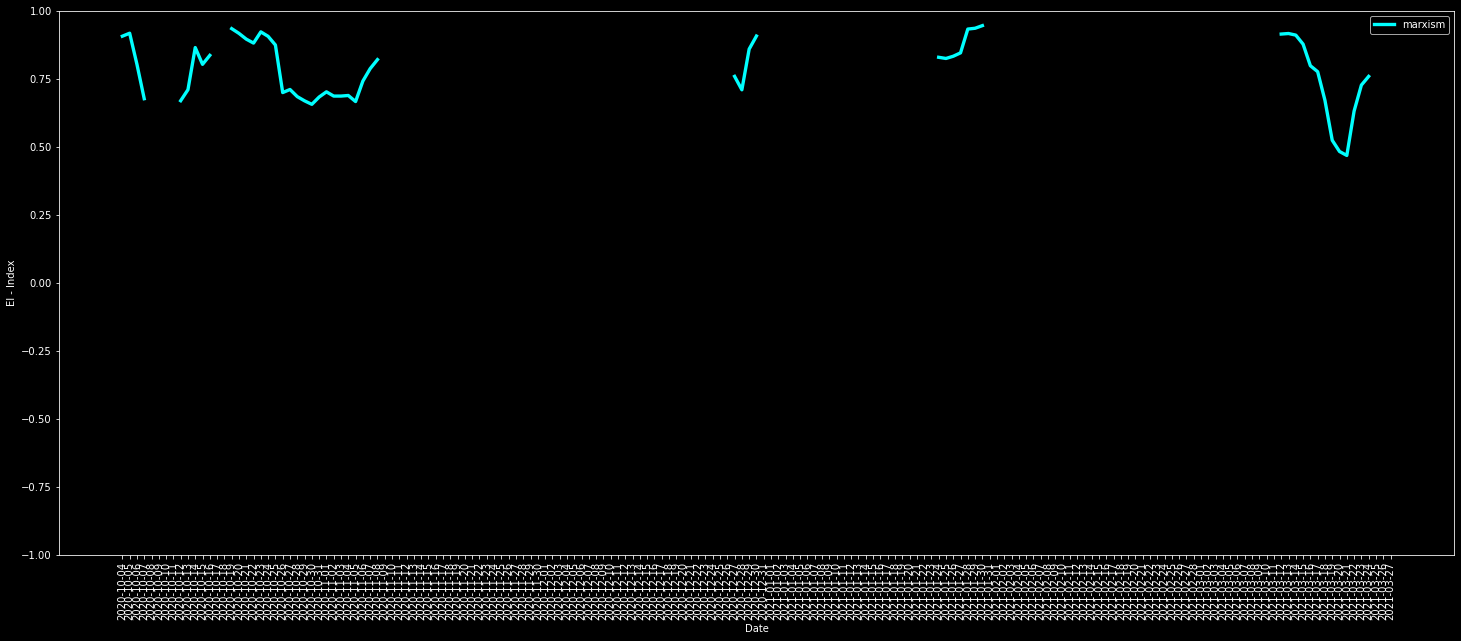

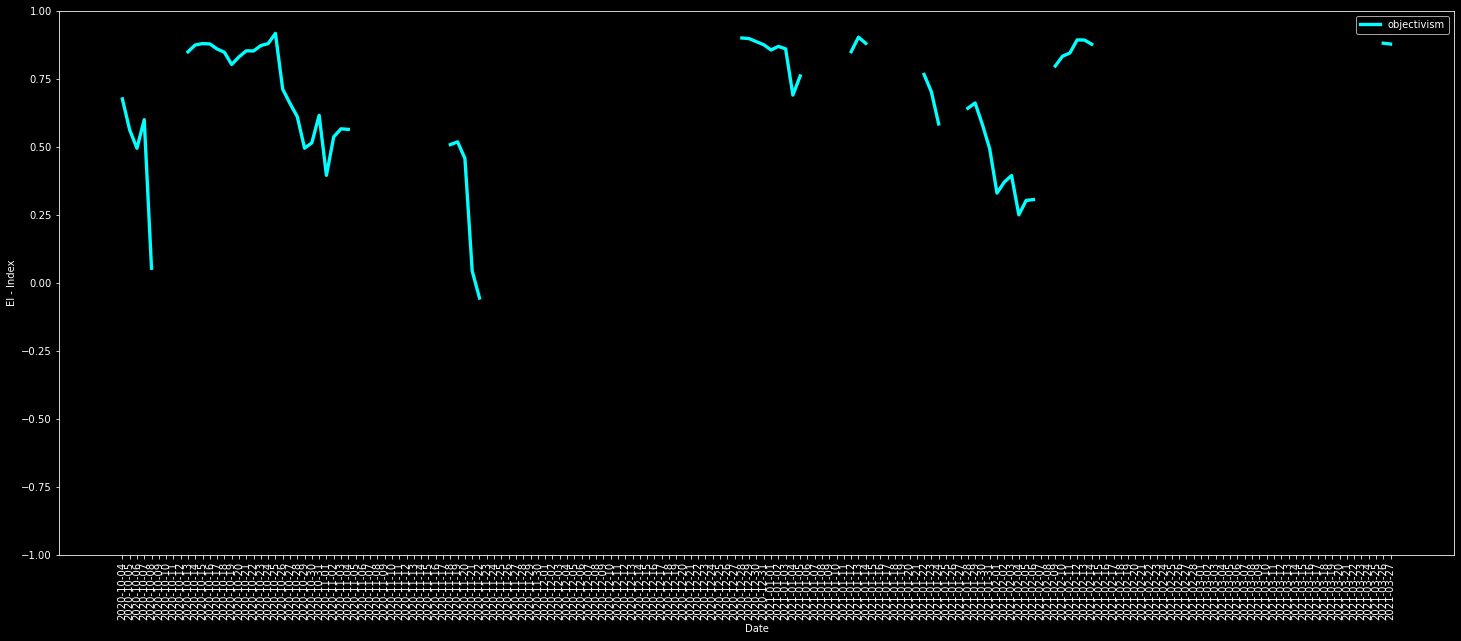

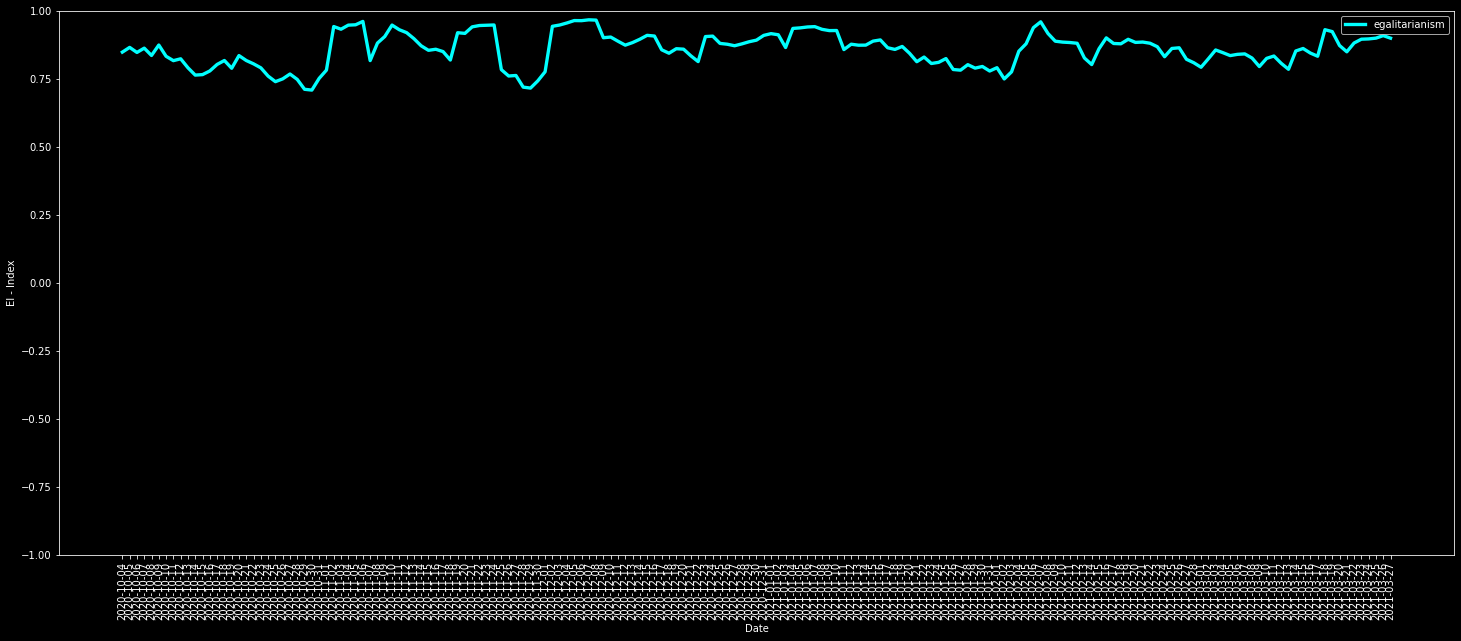

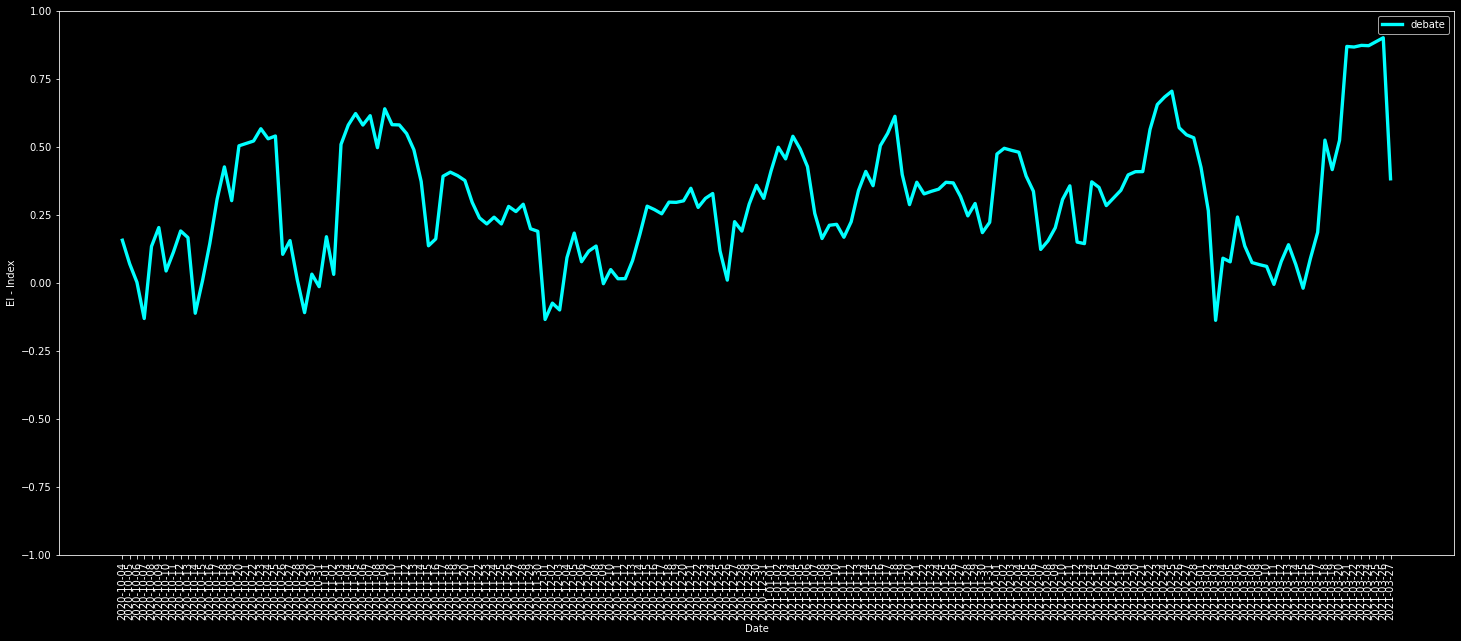

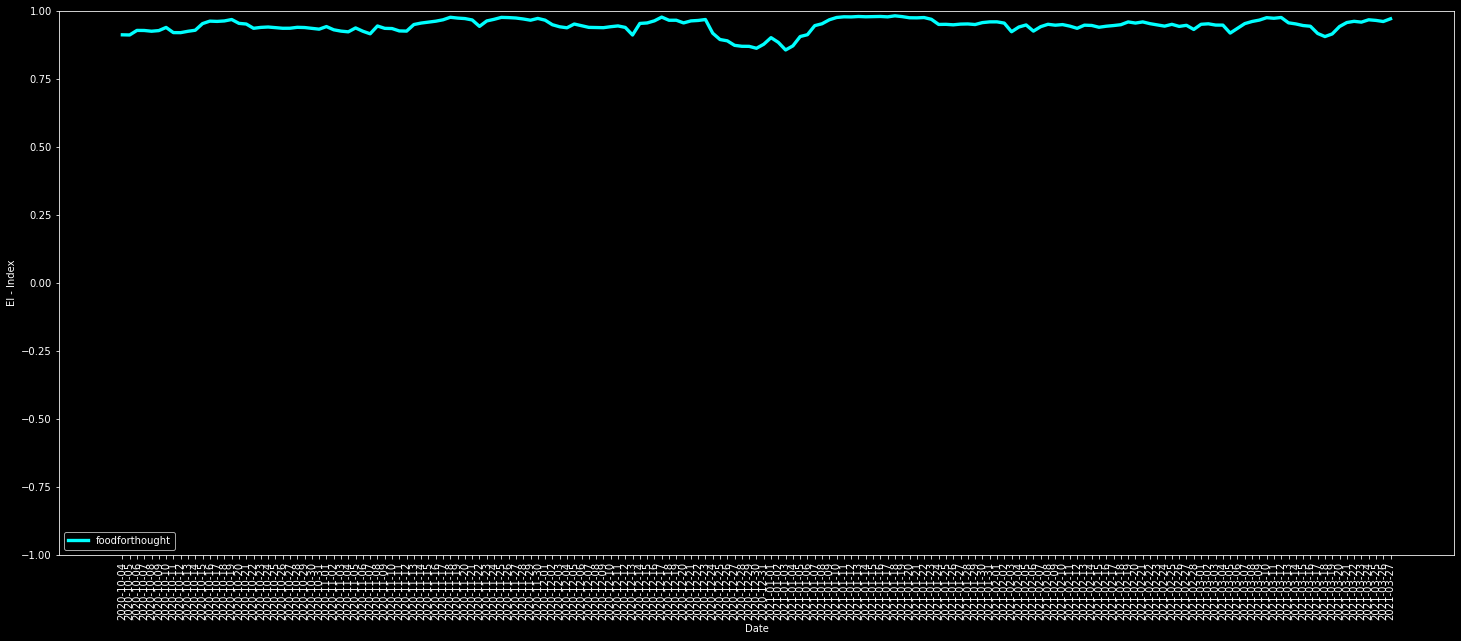

In [35]:
for sub in ei_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('EI - Index')
    plt.ylim(-1,1)
    plt.legend()

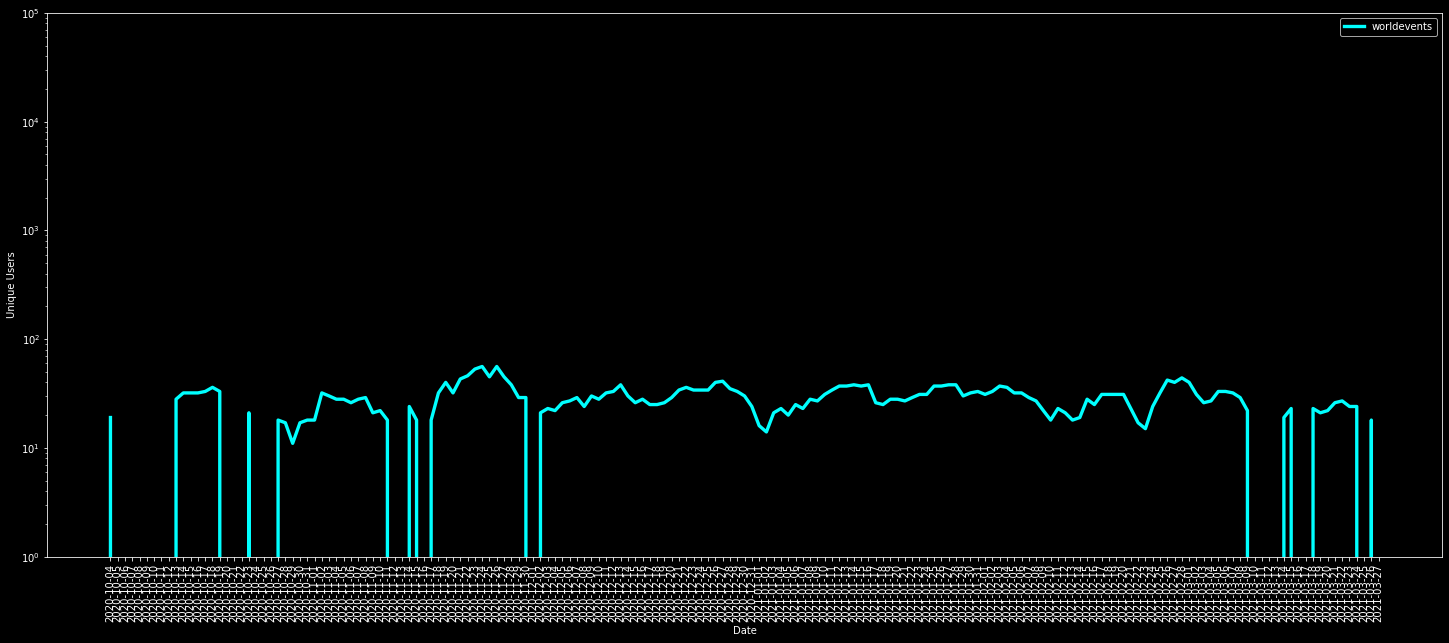

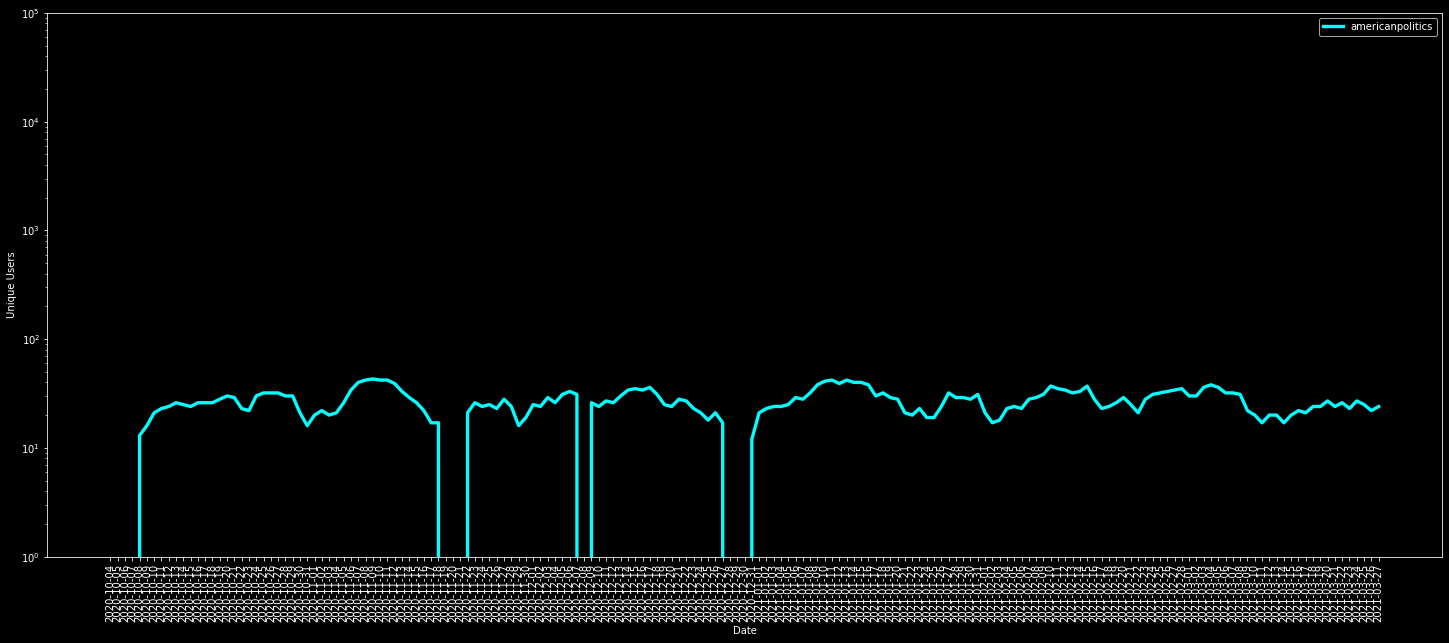

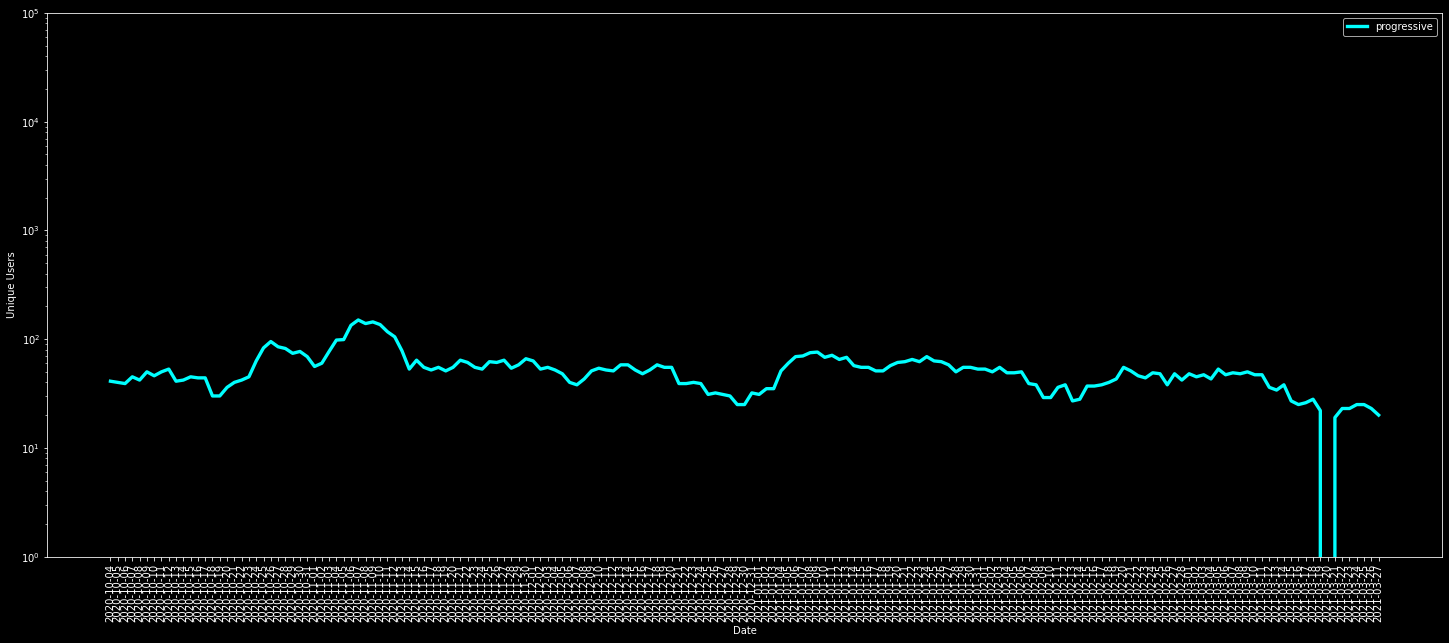

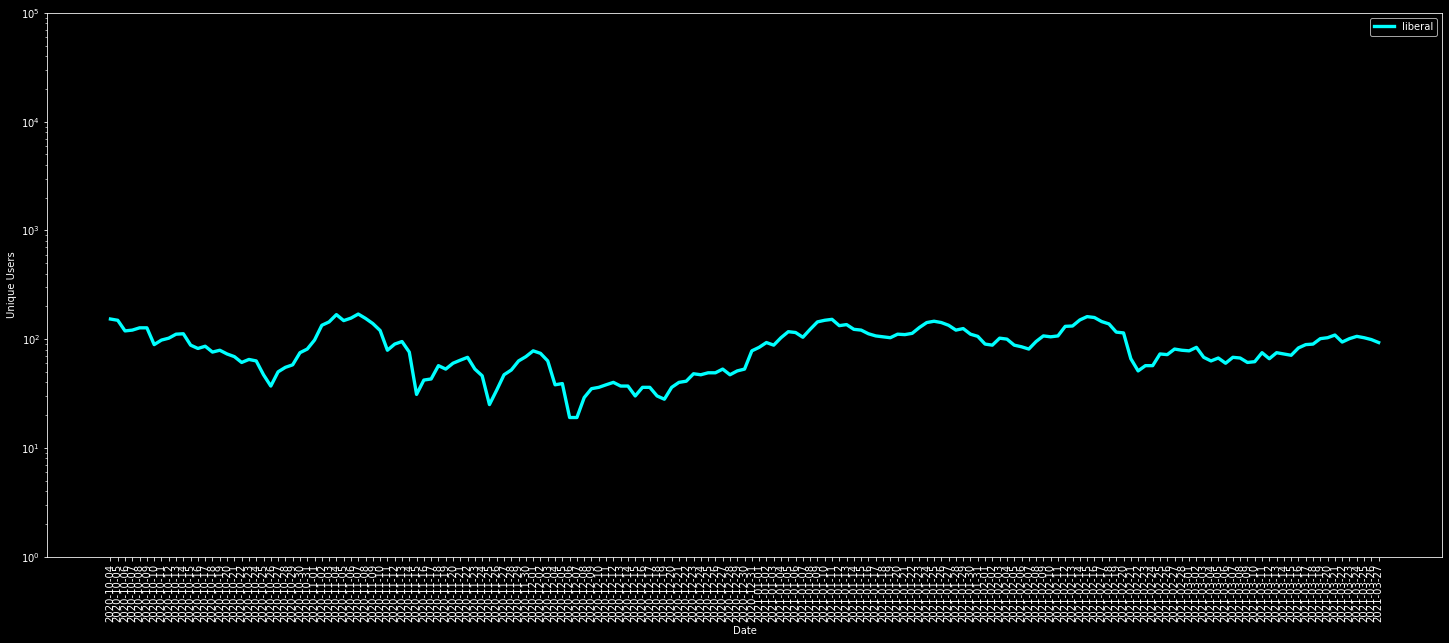

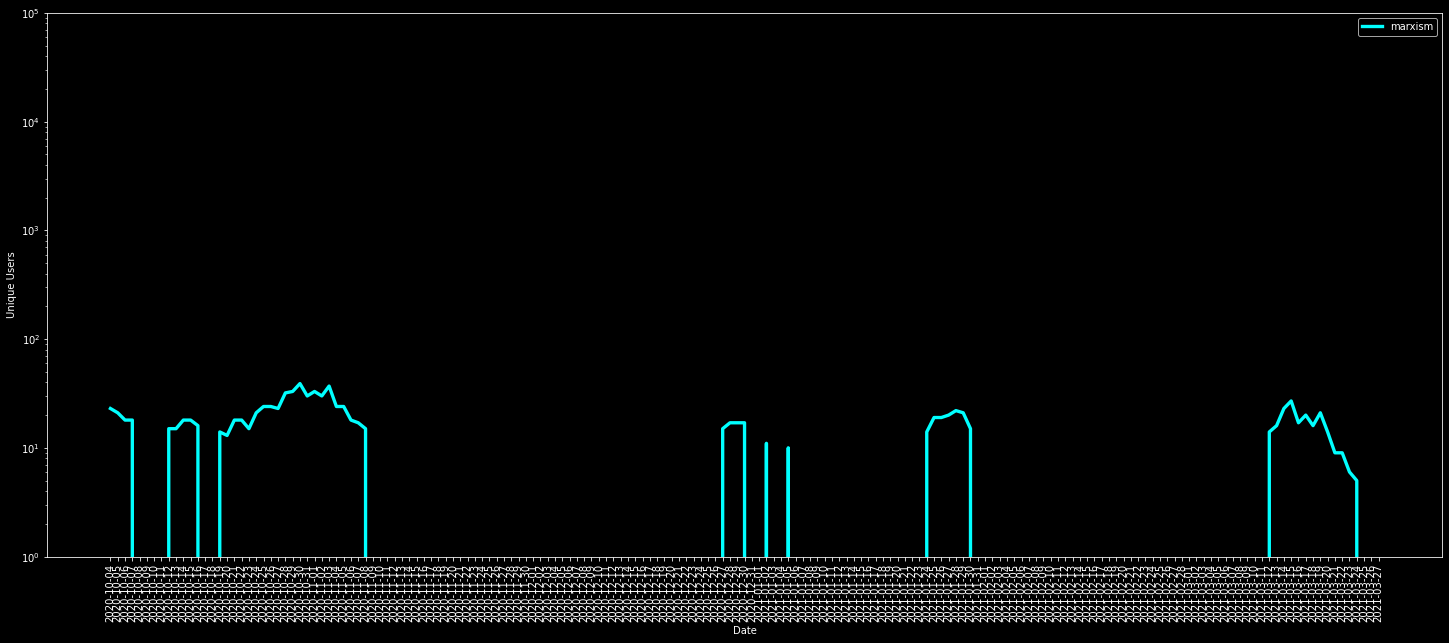

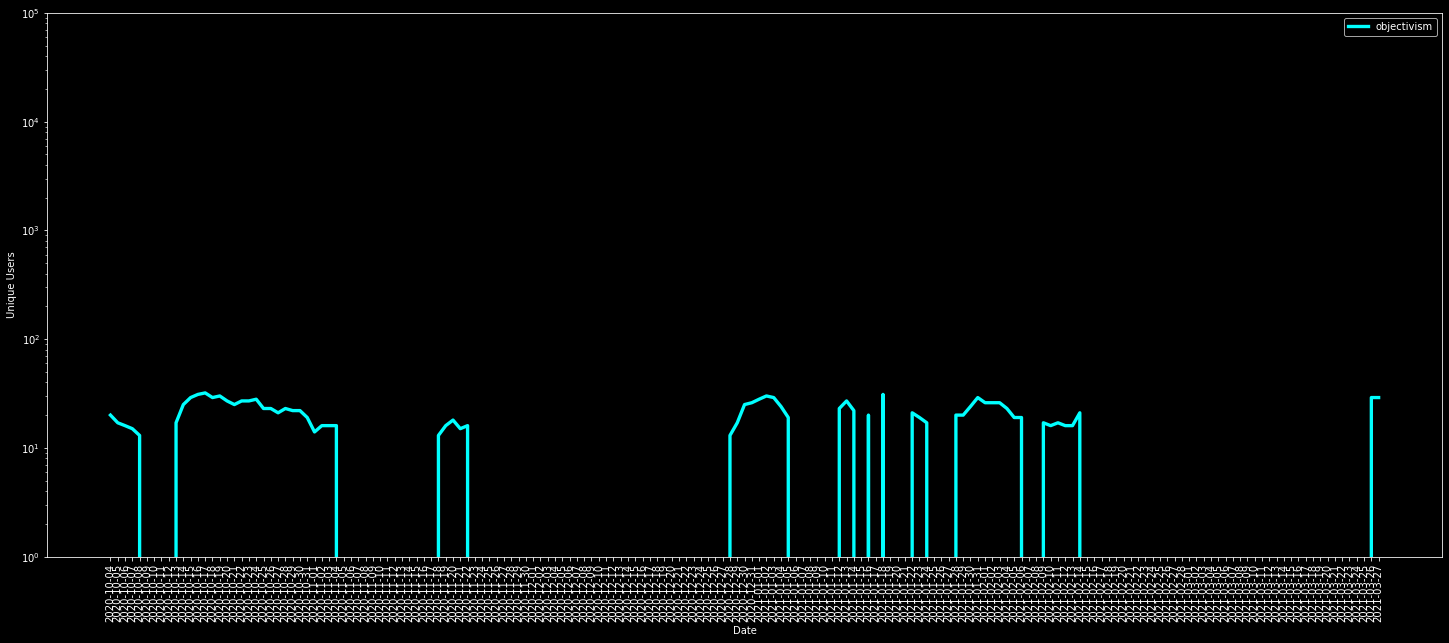

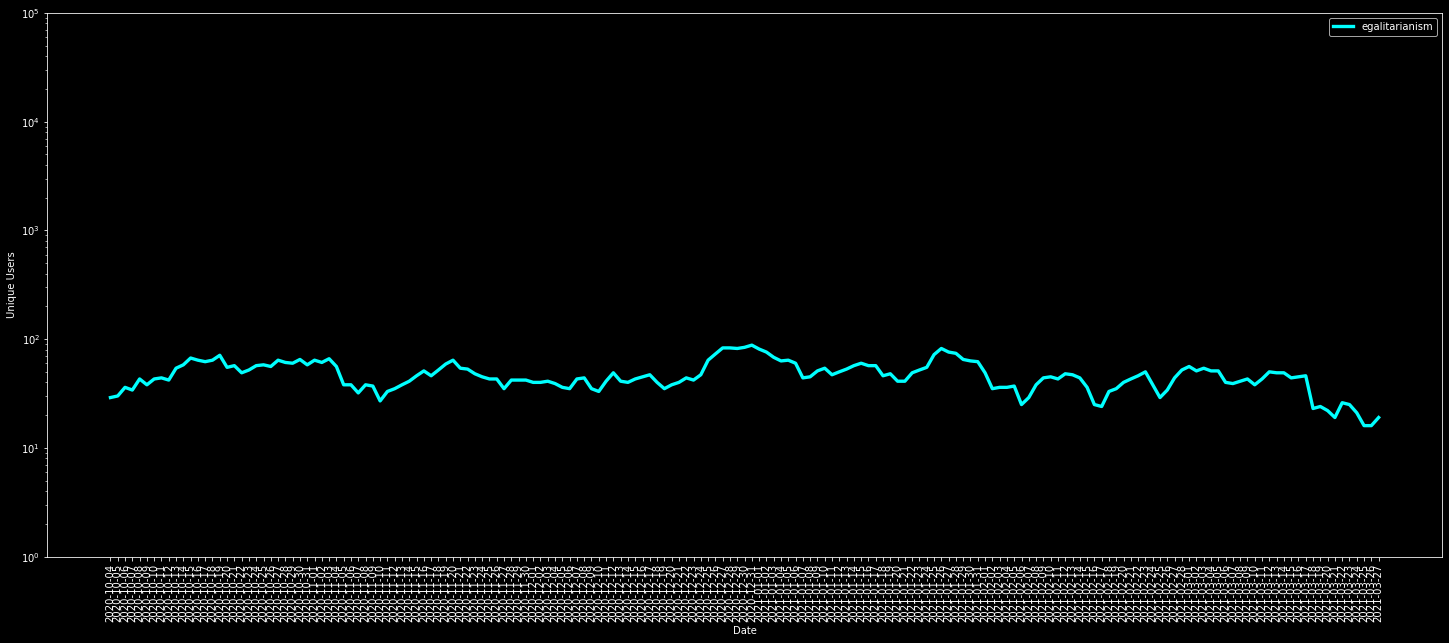

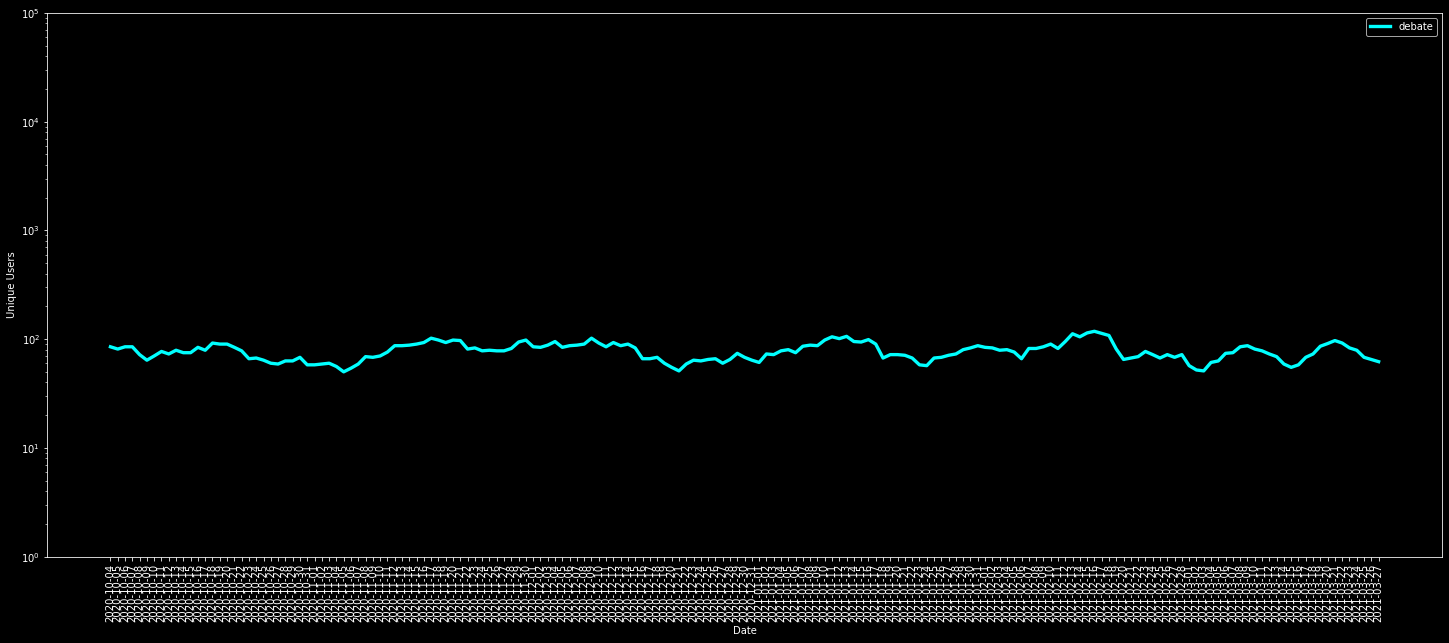

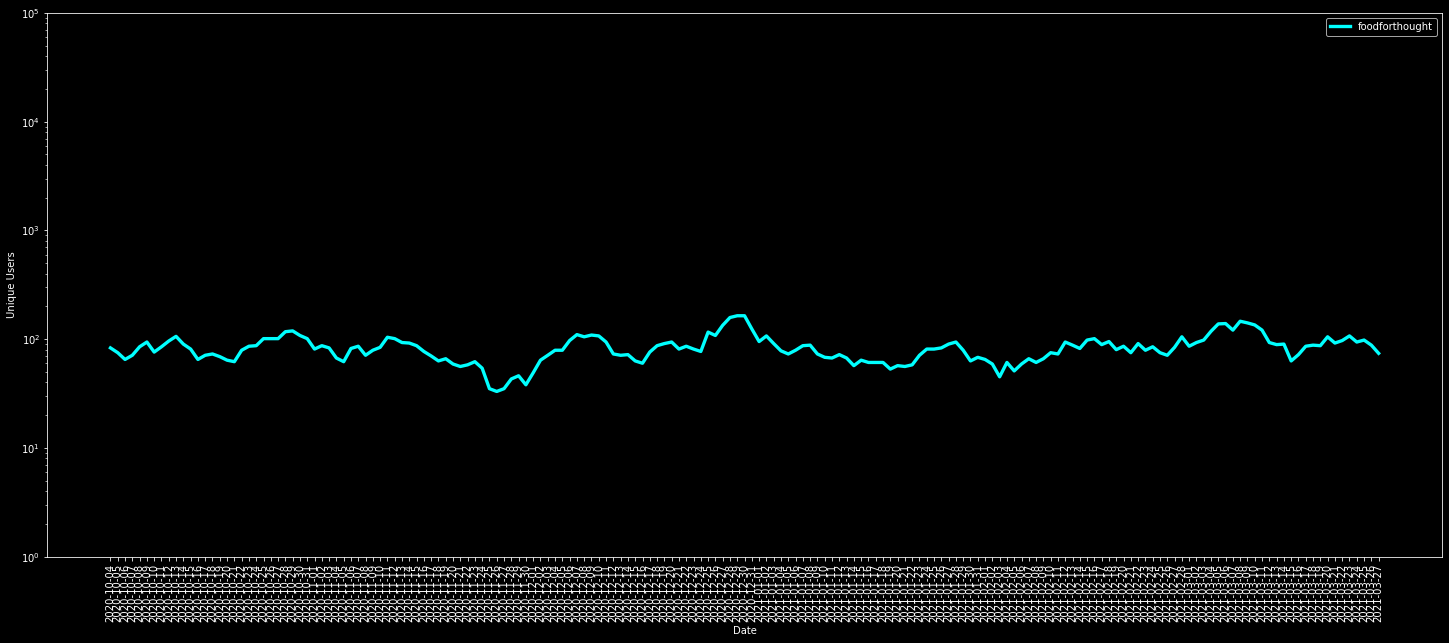

In [36]:
for sub in size_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(size_data.index, size_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.ylim(1,100000)  
    plt.yscale('log')
    plt.legend()

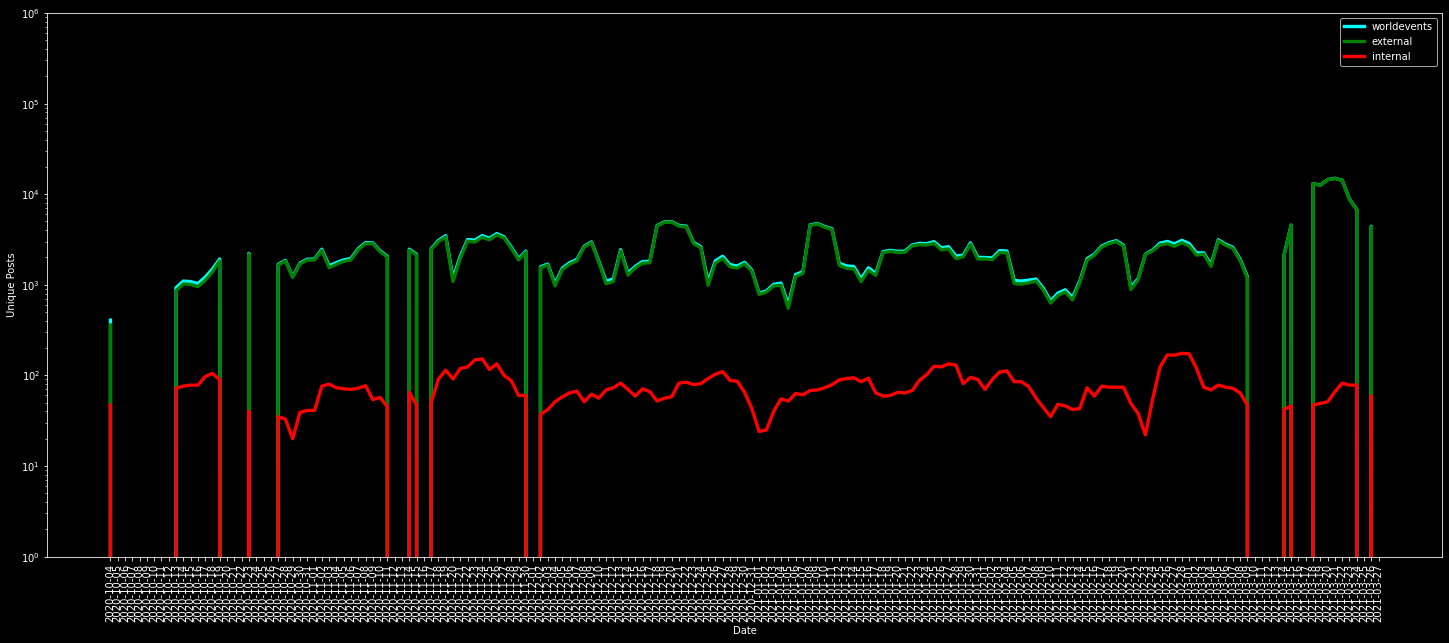

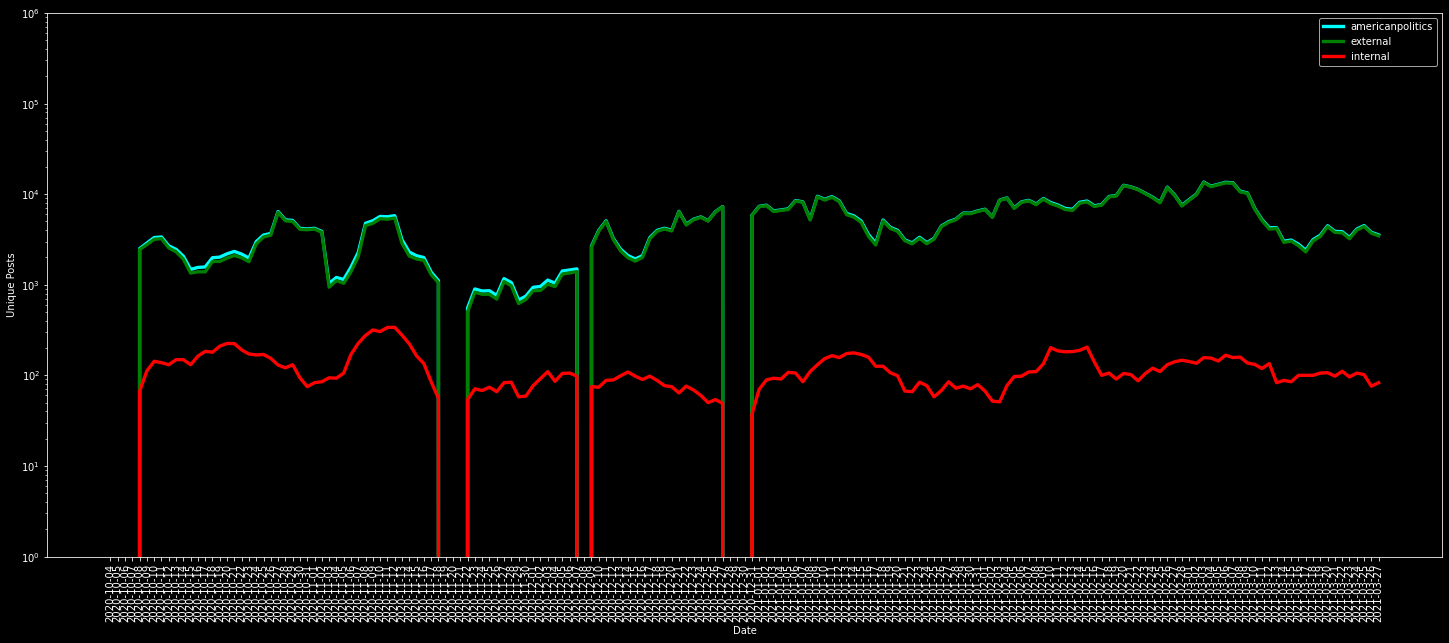

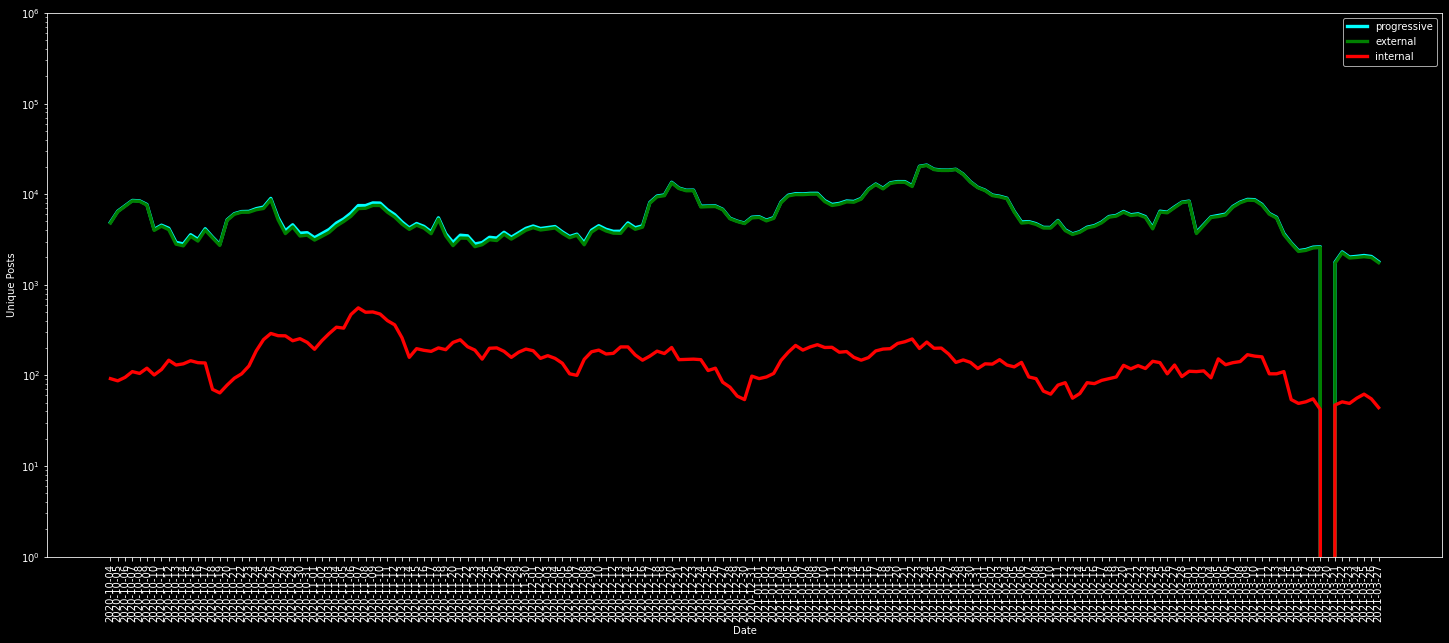

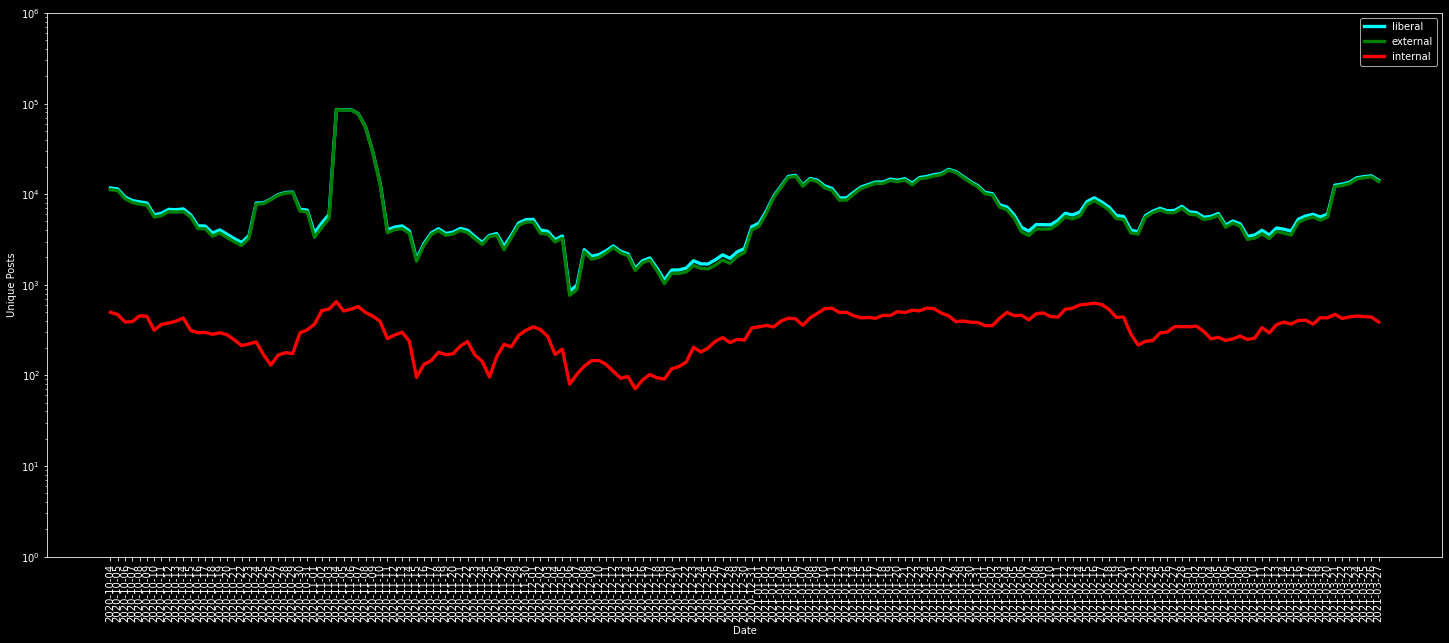

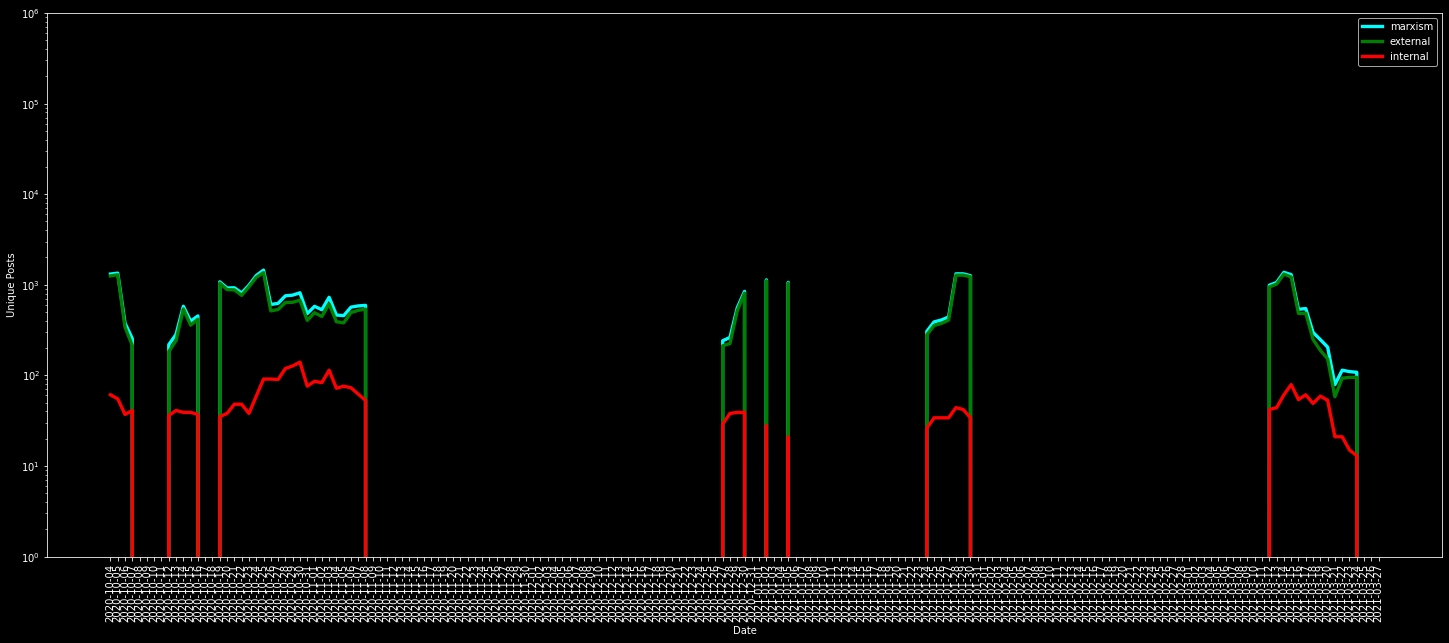

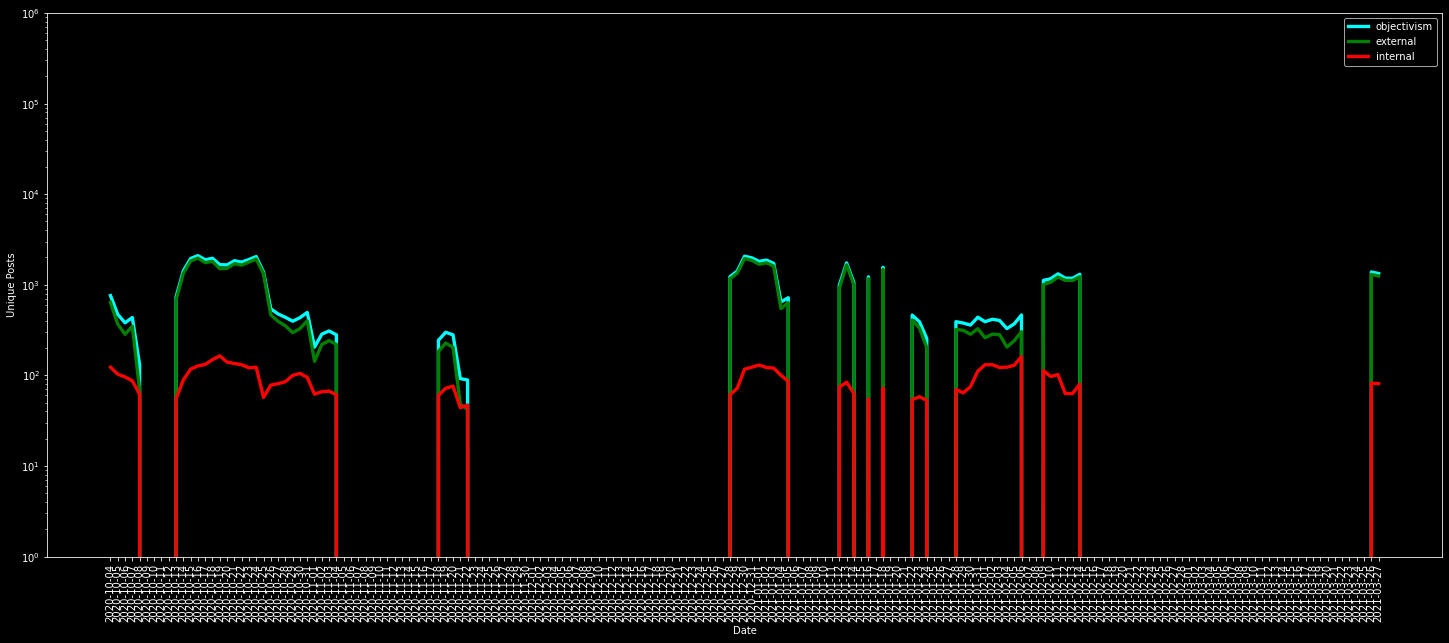

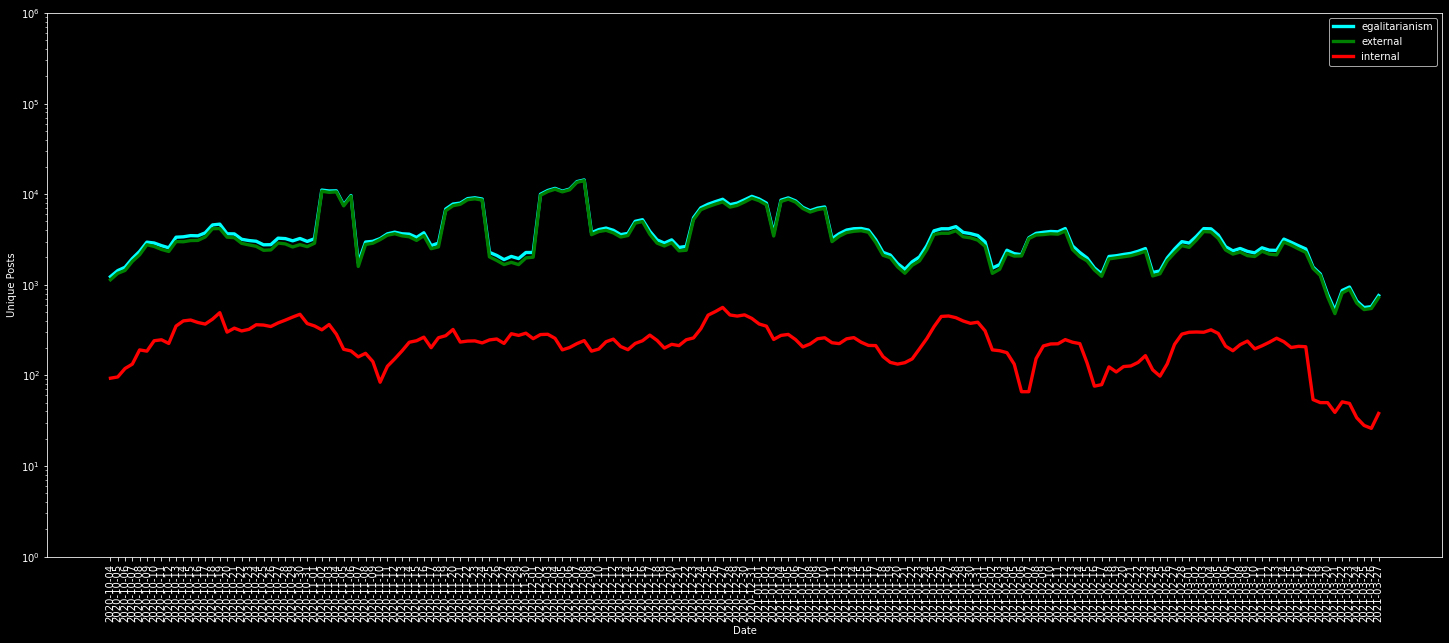

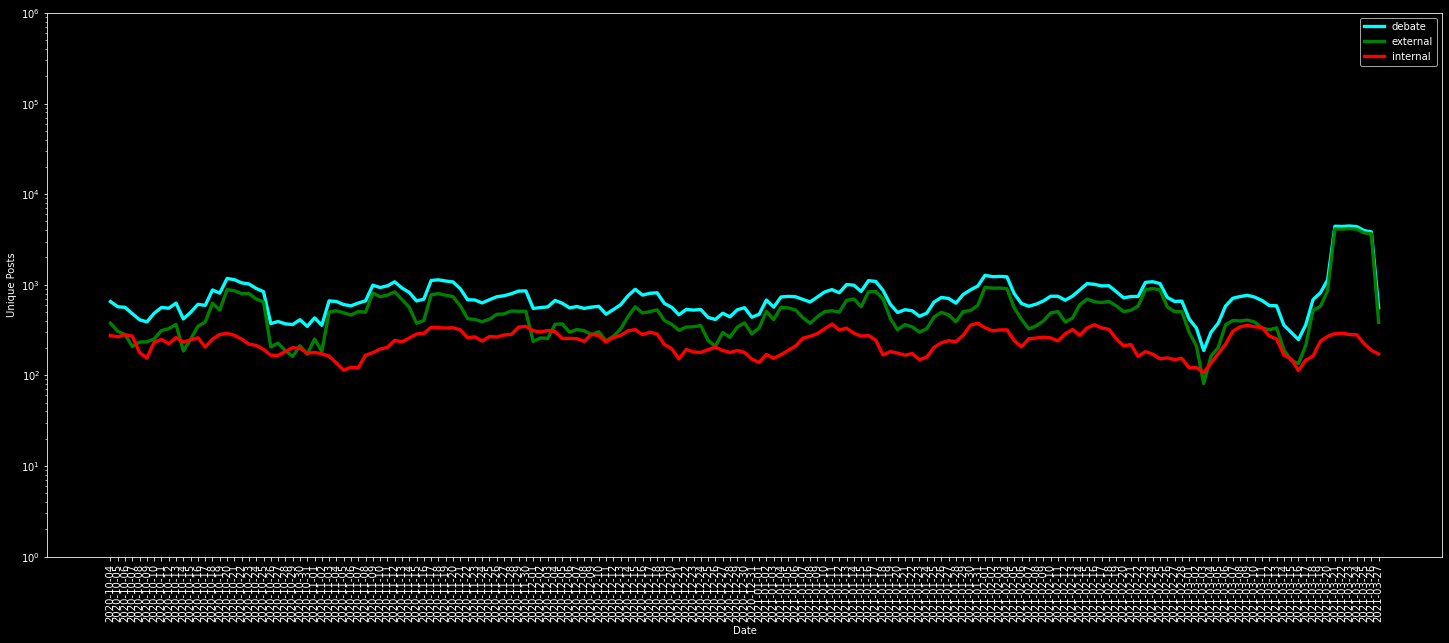

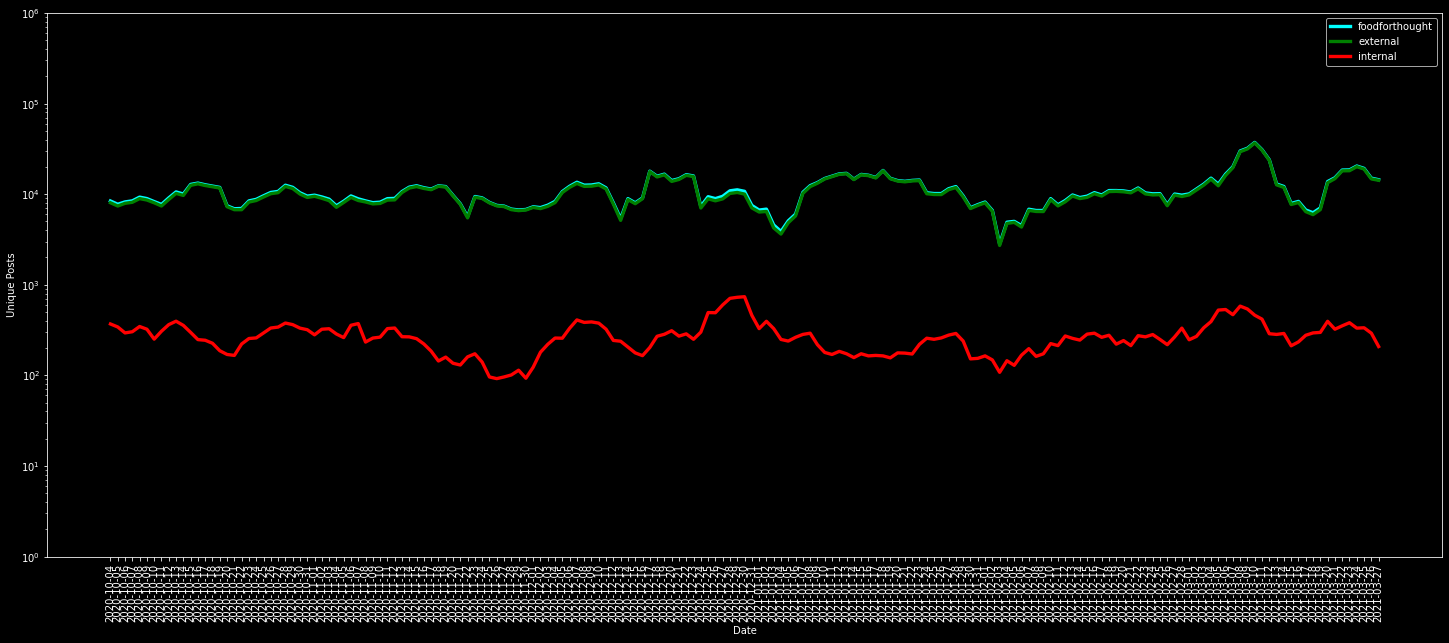

In [37]:
for sub in post_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(post_data.index, e_data[subbert][sub] + i_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.plot(e_data.index, e_data[subbert][sub], lw=3.333, c='green', label='external')
    plt.plot(i_data.index, i_data[subbert][sub], lw=3.333, c='red', label='internal')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Posts')
    plt.ylim(1,1000000)
    plt.yscale('log')
    plt.legend()